# Урок 7. Многомерный статистический анализ. Линейная регрессия

In [19]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.


In [8]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
zp = zp.reshape((10,1))
ks = ks.reshape((10,1))
X = np.hstack([np.ones((10,1)), zp])
b1 = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, ks))
print(b1)

zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
zp = zp.reshape((10,1))
ks = ks.reshape((10,1))
X = zp
b2 = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, ks))
print(b2)

[[444.17735732]
 [  2.62053888]]
[[5.88982042]]


In [9]:
def y1(x):
    return b1[0]+b1[1]*x

def y2(x):
    return b2[0]*x

y11 = []
for i in range(0,10):
    y11.append(y1(zp[i]))
    
y22 = []
for i in range(0,10):
    y22.append(y2(zp[i]))

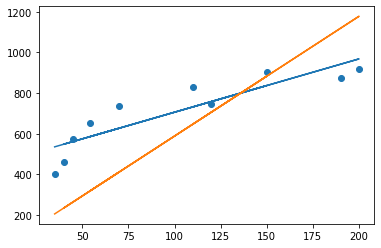

In [31]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
fig, ax = plt.subplots()
ax.scatter(zp, ks)
ax.plot(zp, y11)
ax.plot(zp, y22)
plt.show()

Очевидно, что линейная регрессия с использованием intercept значительно лучше описывает характер распределения.

### 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [36]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [37]:
def err(b1):
    return (np.sum(b1*x-y)**2)/n

In [52]:
a = 10**(-6)
b1 = 1
n = 10
for i in range(500):
    b1 -= a*(2/n)*np.sum((b1*X-y)*X)
    if i%100 == 0:
        print('b1 = ' + str(b1))
print('b1 = ' + str(b1))

b1 = 1.1347302
b1 = 5.598920289974488
b1 = 5.872024146706
b1 = 5.8887317050891275
b1 = 5.8897538162759355
b1 = 5.889816230087751


За 500 итераций достигнута точность до 4 знака после запятой.

### 3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента? 

Критерий Стьюдента испоьзуется если не известна дисперсия выборки, соответственно является менее надежным, чем критерий Лапласа, который использует информацию о дисперсии выборки.

### *4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [68]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
a = 10**(-5)
b0 = 300
b1 = 3
n = 10
for i in range(5000000):
    b0_old = b0
    b0 -= a*(2/n)*np.sum((b0 + b1*X-y))
    b1 -= a*(2/n)*np.sum((b0_old + b1*X-y)*X)
    if i%100 == 0:
        print('b1 = ' + str(b1))
        print('b0 = ' + str(b0))
print('b1 = ' + str(b1))
print('b0 = ' + str(b0))

b1 = 3.187838
b0 = 300.002114
b1 = 3.6811674637529426
b0 = 300.07886931499144
b1 = 3.6806295394871733
b0 = 300.1519524608962
b1 = 3.6800918880431226
b0 = 300.2249985408587
b1 = 3.6795545092824247
b0 = 300.298007573678
b1 = 3.6790174030667835
b0 = 300.3709795781433
b1 = 3.678480569257967
b0 = 300.44391457303504
b1 = 3.677944007717821
b0 = 300.51681257712295
b1 = 3.6774077183082556
b0 = 300.5896736091681
b1 = 3.676871700891256
b0 = 300.66249768792153
b1 = 3.6763359553288715
b0 = 300.7352848321253
b1 = 3.6758004814832246
b0 = 300.80803506051154
b1 = 3.675265279216508
b0 = 300.88074839180314
b1 = 3.6747303483909817
b0 = 300.95342484471354
b1 = 3.6741956888689784
b0 = 301.02606443794656
b1 = 3.6736613005129
b0 = 301.09866719019624
b1 = 3.673127183185221
b0 = 301.171233120147
b1 = 3.67259333674848
b0 = 301.2437622464748
b1 = 3.672059761065288
b0 = 301.3162545878452
b1 = 3.671526455998327
b0 = 301.38871016291466
b1 = 3.670993421410344
b0 = 301.46112899033045
b1 = 3.67046065716416
b0 = 301.533

b1 = 3.587625198400419
b0 = 312.78765280365747
b1 = 3.5871347164299907
b0 = 312.85429037271535
b1 = 3.5866444832197426
b0 = 312.92089414486605
b1 = 3.586154498643504
b0 = 312.98746413725115
b1 = 3.585664762575178
b0 = 313.05400036700235
b1 = 3.5851752748887247
b0 = 313.1205028512437
b1 = 3.584686035458174
b0 = 313.1869716070896
b1 = 3.584197044157617
b0 = 313.2534066516461
b1 = 3.583708300861206
b0 = 313.3198080020113
b1 = 3.5832198054431608
b0 = 313.3861756752738
b1 = 3.5827315577777603
b0 = 313.452509688514
b1 = 3.5822435577393543
b0 = 313.51881005880324
b1 = 3.581755805202352
b0 = 313.58507680320423
b1 = 3.5812683000412266
b0 = 313.6513099387714
b1 = 3.580781042130514
b0 = 313.71750948255027
b1 = 3.58029403134482
b0 = 313.78367545157727
b1 = 3.579807267558804
b0 = 313.8498078628813
b1 = 3.5793207506471916
b0 = 313.91590673348225
b1 = 3.5788344804847783
b0 = 313.98197208039073
b1 = 3.5783484569464212
b0 = 314.04800392060855
b1 = 3.5778626799070343
b0 = 314.11400227113023
b1 = 3.57737

b1 = 3.5018856805421197
b0 = 324.43634406399036
b1 = 3.501438683508834
b0 = 324.4970737084425
b1 = 3.5009919131812564
b0 = 324.5577725523388
b1 = 3.500545369444404
b0 = 324.6184406113011
b1 = 3.5000990521833577
b0 = 324.67907790094245
b1 = 3.499652961283253
b0 = 324.7396844368685
b1 = 3.4992070966292856
b0 = 324.8002602346769
b1 = 3.4987614581067077
b0 = 324.860805309957
b1 = 3.4983160456008346
b0 = 324.9213196782905
b1 = 3.497870858997035
b0 = 324.9818033552511
b1 = 3.4974258981807362
b0 = 325.04225635640483
b1 = 3.496981163037422
b0 = 325.1026786973101
b1 = 3.4965366534526394
b0 = 325.16307039351665
b1 = 3.496092369311991
b0 = 325.2234314605666
b1 = 3.4956483105011373
b0 = 325.2837619139943
b1 = 3.4952044769057986
b0 = 325.34406176932595
b1 = 3.4947608684117473
b0 = 325.40433104208074
b1 = 3.4943174849048195
b0 = 325.46456974776913
b1 = 3.4938743262709075
b0 = 325.52477790189374
b1 = 3.49343139239596
b0 = 325.58495551995014
b1 = 3.4929886831659855
b0 = 325.645102617425
b1 = 3.4925461

b1 = 3.4132229435437615
b0 = 336.4821879804079
b1 = 3.41282091403119
b0 = 336.53680827436887
b1 = 3.412419088417923
b0 = 336.591400866284
b1 = 3.412017466600549
b0 = 336.645965770203
b1 = 3.4116160484757057
b0 = 336.7005030001689
b1 = 3.4112148339400865
b0 = 336.75501257021705
b1 = 3.4108138228904354
b0 = 336.8094944943758
b1 = 3.4104130152235523
b0 = 336.86394878666624
b1 = 3.410012410836285
b0 = 336.9183754611027
b1 = 3.4096120096255342
b0 = 336.9727745316924
b1 = 3.409211811488256
b0 = 337.02714601243497
b1 = 3.408811816321455
b0 = 337.08148991732367
b1 = 3.408412024022187
b0 = 337.13580626034445
b1 = 3.4080124344875644
b0 = 337.1900950554759
b1 = 3.4076130476147544
b0 = 337.244356316689
b1 = 3.4072138633009676
b0 = 337.29859005794884
b1 = 3.4068148814434718
b0 = 337.3527962932128
b1 = 3.406416101939585
b0 = 337.4069750364313
b1 = 3.406017524686681
b0 = 337.4611263015474
b1 = 3.4056191495821806
b0 = 337.51525010249765
b1 = 3.4052209765235593
b0 = 337.569346453211
b1 = 3.404823005408

b1 = 3.335290284845519
b0 = 347.0702283957163
b1 = 3.3349277808265536
b0 = 347.1194787006286
b1 = 3.3345654606605537
b0 = 347.1687040270189
b1 = 3.3342033242542715
b0 = 347.2179043875561
b1 = 3.3338413715145085
b0 = 347.2670797949021
b1 = 3.3334796023481132
b0 = 347.3162302617126
b1 = 3.3331180166619836
b0 = 347.3653558006367
b1 = 3.332756614363062
b0 = 347.4144564243172
b1 = 3.33239539535834
b0 = 347.46353214539056
b1 = 3.3320343595548545
b0 = 347.5125829764866
b1 = 3.331673506859691
b0 = 347.56160893022906
b1 = 3.331312837179981
b0 = 347.610610019235
b1 = 3.3309523504229017
b0 = 347.6595862561156
b1 = 3.330592046495685
b0 = 347.70853765347437
b1 = 3.3302319253055983
b0 = 347.7574642239101
b1 = 3.329871986759968
b0 = 347.8063659800137
b1 = 3.3295122307661553
b0 = 347.85524293437095
b1 = 3.3291526572315777
b0 = 347.9040950995605
b1 = 3.3287932660636947
b0 = 347.9529224881548
b1 = 3.328434057170018
b0 = 348.00172511271967
b1 = 3.328075030458097
b0 = 348.05050298581534
b1 = 3.32771618583

b1 = 3.262734995227915
b0 = 356.92769189879203
b1 = 3.2624092894355705
b0 = 356.97194274497707
b1 = 3.262083748833051
b0 = 357.01617114824063
b1 = 3.261758373336574
b0 = 357.0603771199654
b1 = 3.261433162862404
b0 = 357.1045606715278
b1 = 3.2611081173268444
b0 = 357.1487218142991
b1 = 3.2607832366462444
b0 = 357.1928605596442
b1 = 3.2604585207369934
b0 = 357.23697691892244
b1 = 3.2601339695155214
b0 = 357.2810709034879
b1 = 3.2598095828983045
b0 = 357.3251425246881
b1 = 3.259485360801859
b0 = 357.3691917938654
b1 = 3.2591613031427444
b0 = 357.41321872235613
b1 = 3.2588374098375645
b0 = 357.45722332149046
b1 = 3.2585136808029613
b0 = 357.5012056025937
b1 = 3.2581901159556206
b0 = 357.54516557698497
b1 = 3.2578667152122707
b0 = 357.58910325597765
b1 = 3.2575434784896813
b0 = 357.63301865087954
b1 = 3.2572204057046656
b0 = 357.6769117729925
b1 = 3.25689749677408
b0 = 357.72078263361266
b1 = 3.2565747516148194
b0 = 357.7646312440306
b1 = 3.2562521701438225
b0 = 357.8084576155313
b1 = 3.255

b1 = 3.208179516510393
b0 = 364.3396758242249
b1 = 3.207881479891168
b0 = 364.38016749770696
b1 = 3.207583594428656
b0 = 364.42063863482576
b1 = 3.2072858600461913
b0 = 364.4610892459973
b1 = 3.2069882766671522
b0 = 364.5015193416314
b1 = 3.206690844214952
b0 = 364.5419289321333
b1 = 3.206393562613046
b0 = 364.5823180279024
b1 = 3.2060964317849265
b0 = 364.6226866393333
b1 = 3.2057994516541264
b0 = 364.6630347768149
b1 = 3.205502622144214
b0 = 364.70336245073105
b1 = 3.2052059431787994
b0 = 364.74366967146045
b1 = 3.2049094146815316
b0 = 364.78395644937626
b1 = 3.204613036576093
b0 = 364.82422279484706
b1 = 3.2043168087862095
b0 = 364.86446871823534
b1 = 3.2040207312356443
b0 = 364.90469422989906
b1 = 3.203724803848203
b0 = 364.94489934019
b1 = 3.2034290265477243
b0 = 364.98508405945546
b1 = 3.203133399258088
b0 = 365.0252483980372
b1 = 3.2028379219032135
b0 = 365.0653923662719
b1 = 3.2025425944070545
b0 = 365.105515974491
b1 = 3.2022474166936092
b0 = 365.14561923302034
b1 = 3.20195238

b1 = 3.1517514057432456
b0 = 372.0060781687856
b1 = 3.151481988049237
b0 = 372.04268163491145
b1 = 3.1512127069971383
b0 = 372.0792665366757
b1 = 3.150943562517648
b0 = 372.1158328834936
b1 = 3.1506745545415016
b0 = 372.15238068477555
b1 = 3.150405682999466
b0 = 372.1889099499277
b1 = 3.150136947822346
b0 = 372.22542068835094
b1 = 3.1498683489409807
b0 = 372.2619129094416
b1 = 3.1495998862862455
b0 = 372.2983866225911
b1 = 3.149331559789048
b0 = 372.33484183718645
b1 = 3.1490633693803316
b0 = 372.3712785626097
b1 = 3.1487953149910775
b0 = 372.4076968082378
b1 = 3.148527396552296
b0 = 372.44409658344375
b1 = 3.148259613995042
b0 = 372.4804778975947
b1 = 3.147991967250397
b0 = 372.516840760054
b1 = 3.1477244562494824
b0 = 372.5531851801795
b1 = 3.1474570809234494
b0 = 372.589511167325
b1 = 3.147189841203491
b0 = 372.62581873083894
b1 = 3.146922737020826
b0 = 372.6621078800659
b1 = 3.1466557683067173
b0 = 372.6983786243446
b1 = 3.1463889349924568
b0 = 372.73463097301
b1 = 3.14612223700937

b1 = 3.096618255588109
b0 = 379.4965453466879
b1 = 3.096376800047712
b0 = 379.52934983536994
b1 = 3.0961354669675205
b0 = 379.5621376864365
b1 = 3.0958942562854257
b0 = 379.5949089083258
b1 = 3.095653167939351
b0 = 379.62766350947163
b1 = 3.0954122018672487
b0 = 379.660401498304
b1 = 3.095171358007107
b0 = 379.6931228832478
b1 = 3.0949306362969424
b0 = 379.7258276727242
b1 = 3.094690036674804
b0 = 379.75851587514995
b1 = 3.094449559078772
b0 = 379.79118749893775
b1 = 3.0942092034469537
b0 = 379.8238425524961
b1 = 3.0939689697174986
b0 = 379.85648104422836
b1 = 3.0937288578285758
b0 = 379.8891029825347
b1 = 3.093488867718392
b0 = 379.92170837581074
b1 = 3.0932489993251844
b0 = 379.95429723244746
b1 = 3.0930092525872226
b0 = 379.98686956083174
b1 = 3.0927696274428045
b0 = 380.01942536934644
b1 = 3.0925301238302585
b0 = 380.0519646663704
b1 = 3.092290741687952
b0 = 380.0844874602771
b1 = 3.092051480954275
b0 = 380.116993759437
b1 = 3.0918123415676524
b0 = 380.1494835722157
b1 = 3.09157332

b1 = 3.051121180062756
b0 = 385.6778418979326
b1 = 3.050902799500138
b0 = 385.70751138774017
b1 = 3.050684529694677
b0 = 385.7371658299248
b1 = 3.050466370590194
b0 = 385.76680523211905
b1 = 3.050248322130548
b0 = 385.79642960195065
b1 = 3.0500303842596224
b0 = 385.8260389470433
b1 = 3.0498125569213297
b0 = 385.8556332750173
b1 = 3.0495948400596102
b0 = 385.8852125934889
b1 = 3.0493772336184337
b0 = 385.9147769100706
b1 = 3.049159737541795
b0 = 385.9443262323712
b1 = 3.048942351773722
b0 = 385.9738605679953
b1 = 3.04872507625827
b0 = 386.0033799245436
b1 = 3.0485079109395214
b0 = 386.03288430961294
b1 = 3.0482908557615804
b0 = 386.0623737307976
b1 = 3.048073910668597
b0 = 386.0918481956853
b1 = 3.0478570756047345
b0 = 386.1213077118623
b1 = 3.047640350514188
b0 = 386.1507522869101
b1 = 3.047423735341182
b0 = 386.18018192840657
b1 = 3.0472072300299686
b0 = 386.2095966439257
b1 = 3.0469908345248284
b0 = 386.2389964410375
b1 = 3.0467745487700735
b0 = 386.268381327308
b1 = 3.04655837271003

b1 = 3.01354446660771
b0 = 390.7830669394268
b1 = 3.0133451440134973
b0 = 390.81014718689244
b1 = 3.0131459225107187
b0 = 390.837213699934
b1 = 3.0129468020480985
b0 = 390.8642664855178
b1 = 3.0127477825743916
b0 = 390.8913055506061
b1 = 3.012548864038379
b0 = 390.91833090215744
b1 = 3.012350046388867
b0 = 390.94534254712727
b1 = 3.0121513295746936
b0 = 390.9723404924664
b1 = 3.0119527135447126
b0 = 390.9993247451237
b1 = 3.011754198247811
b0 = 391.02629531204343
b1 = 3.0115557836328977
b0 = 391.0532522001669
b1 = 3.0113574696489103
b0 = 391.08019541643137
b1 = 3.01115925624481
b0 = 391.10712496777126
b1 = 3.0109611433695864
b0 = 391.1340408611169
b1 = 3.0107631309722542
b0 = 391.16094310339514
b1 = 3.0105652190018533
b0 = 391.18783170152943
b1 = 3.01036740740745
b0 = 391.2147066624399
b1 = 3.0101696961381337
b0 = 391.2415679930431
b1 = 3.009972085143025
b0 = 391.2684157002517
b1 = 3.0097745743712685
b0 = 391.29524979097505
b1 = 3.00957716377203
b0 = 391.3220702721194
b1 = 3.0093798532

b1 = 2.9750859770793268
b0 = 396.00809131611237
b1 = 2.974906159668275
b0 = 396.03252156201177
b1 = 2.974726433456113
b0 = 396.05693941750195
b1 = 2.974546798396587
b0 = 396.081344888867
b1 = 2.9743672544434663
b0 = 396.1057379823881
b1 = 2.9741878015505416
b0 = 396.130118704343
b1 = 2.9740084396716346
b0 = 396.15448706100574
b1 = 2.9738291687605836
b0 = 396.1788430586479
b1 = 2.973649988771249
b0 = 396.20318670353794
b1 = 2.9734708996575208
b0 = 396.2275180019405
b1 = 2.9732919013733086
b0 = 396.2518369601176
b1 = 2.9731129938725416
b0 = 396.2761435843284
b1 = 2.9729341771091846
b0 = 396.3004378808272
b1 = 2.972755451037211
b0 = 396.3247198558674
b1 = 2.972576815610629
b0 = 396.34898951569744
b1 = 2.972398270783463
b0 = 396.37324686656365
b1 = 2.972219816509764
b0 = 396.39749191470867
b1 = 2.972041452743606
b0 = 396.4217246663721
b1 = 2.9718631794390844
b0 = 396.4459451277906
b1 = 2.97168499655032
b0 = 396.4701533051975
b1 = 2.9715069040314557
b0 = 396.49434920482287
b1 = 2.9713289018

b1 = 2.9441448198246736
b0 = 400.2118003769976
b1 = 2.943980694994034
b0 = 400.2340986068925
b1 = 2.9438166534034
b0 = 400.2563855276833
b1 = 2.9436526950105506
b0 = 400.27866114510624
b1 = 2.943488819773296
b0 = 400.3009254648934
b1 = 2.9433250276494594
b0 = 400.32317849277484
b1 = 2.9431613185968875
b0 = 400.34542023447773
b1 = 2.94299769257345
b0 = 400.36765069572584
b1 = 2.9428341495370356
b0 = 400.3898698822405
b1 = 2.942670689445553
b0 = 400.4120777997402
b1 = 2.942507312256938
b0 = 400.43427445393996
b1 = 2.942344017929143
b0 = 400.45645985055245
b1 = 2.942180806420144
b0 = 400.478633995287
b1 = 2.9420176776879363
b0 = 400.5007968938505
b1 = 2.9418546316905383
b0 = 400.52294855194657
b1 = 2.9416916683859893
b0 = 400.54508897527626
b1 = 2.9415287877323477
b0 = 400.5672181695374
b1 = 2.941365989687697
b0 = 400.5893361404253
b1 = 2.941203274210136
b0 = 400.6114428936323
b1 = 2.9410406412577963
b0 = 400.6335384348469
b1 = 2.9408780907888175
b0 = 400.65562276975635
b1 = 2.94071562276

b1 = 2.9145583990105193
b0 = 404.2314530432507
b1 = 2.914409279671878
b0 = 404.2517126059374
b1 = 2.914260235962831
b0 = 404.27196189348126
b1 = 2.9141112678450267
b0 = 404.29220091109283
b1 = 2.913962375280119
b0 = 404.31242966398173
b1 = 2.913813558229794
b0 = 404.33264815735333
b1 = 2.9136648166557526
b0 = 404.3528563964112
b1 = 2.9135161505197136
b0 = 404.3730543863561
b1 = 2.913367559783415
b0 = 404.39324213238643
b1 = 2.91321904440862
b0 = 404.4134196396971
b1 = 2.9130706043571077
b0 = 404.4335869134809
b1 = 2.9129222395906718
b0 = 404.4537439589285
b1 = 2.91277395007113
b0 = 404.47389078122745
b1 = 2.9126257357603196
b0 = 404.49402738556245
b1 = 2.9124775966200986
b0 = 404.5141537771158
b1 = 2.912329532612342
b0 = 404.53426996106697
b1 = 2.9121815436989418
b0 = 404.5543759425934
b1 = 2.912033629841815
b0 = 404.5744717268694
b1 = 2.9118857910028955
b0 = 404.59455731906615
b1 = 2.911738027144136
b0 = 404.6146327243532
b1 = 2.9115903382275063
b0 = 404.63469794789745
b1 = 2.91144272

b1 = 2.8867300265921267
b0 = 408.0122547864465
b1 = 2.8865950211073503
b0 = 408.0305968211336
b1 = 2.886460084093976
b0 = 408.0489295531999
b1 = 2.8863252155172763
b0 = 408.0672529873635
b1 = 2.8861904153425417
b0 = 408.08556712834
b1 = 2.886055683535083
b0 = 408.10387198084254
b1 = 2.885921020060225
b0 = 408.12216754958195
b1 = 2.88578642488331
b0 = 408.14045383926714
b1 = 2.8856518979696997
b0 = 408.15873085460373
b1 = 2.8855174392847713
b0 = 408.1769986002958
b1 = 2.885383048793922
b0 = 408.19525708104464
b1 = 2.8852487264625655
b0 = 408.2135063015491
b1 = 2.8851144722561317
b0 = 408.23174626650587
b1 = 2.884980286140073
b0 = 408.2499769806087
b1 = 2.884846168079852
b0 = 408.2681984485499
b1 = 2.884712118040955
b0 = 408.2864106750185
b1 = 2.8845781359888814
b0 = 408.3046136647019
b1 = 2.8844442218891526
b0 = 408.3228074222843
b1 = 2.8843103757073023
b0 = 408.34099195244835
b1 = 2.8841765974088838
b0 = 408.35916725987414
b1 = 2.884042886959468
b0 = 408.3773333492391
b1 = 2.8839092443

b1 = 2.8601944572483995
b0 = 411.61741448903643
b1 = 2.86007290994013
b0 = 411.6339280769702
b1 = 2.8599514242776105
b0 = 411.6504332896259
b1 = 2.8598300002295813
b0 = 411.66693013125047
b1 = 2.8597086377647867
b0 = 411.6834186060903
b1 = 2.8595873368519973
b0 = 411.6998987183883
b1 = 2.859466097459995
b0 = 411.7163704723858
b1 = 2.8593449195575764
b0 = 411.7328338723221
b1 = 2.8592238031135553
b0 = 411.74928892243423
b1 = 2.8591027480967637
b0 = 411.76573562695677
b1 = 2.8589817544760456
b0 = 411.7821739901226
b1 = 2.8588608222202634
b0 = 411.798604016162
b1 = 2.8587399512982943
b0 = 411.8150257093036
b1 = 2.858619141679031
b0 = 411.83143907377337
b1 = 2.858498393331382
b0 = 411.84784411379565
b1 = 2.858377706224274
b0 = 411.8642408335921
b1 = 2.858257080326644
b0 = 411.8806292373829
b1 = 2.8581365156074514
b0 = 411.89700932938536
b1 = 2.8580160120356664
b0 = 411.9133811138152
b1 = 2.8578955695802755
b0 = 411.92974459488585
b1 = 2.857775188210284
b0 = 411.9460997768084
b1 = 2.8576548

b1 = 2.8368521036740684
b0 = 414.7887394144493
b1 = 2.8367423950232014
b0 = 414.80364458576884
b1 = 2.8366327420138164
b0 = 414.8185421975587
b1 = 2.836523144617694
b0 = 414.8334322536525
b1 = 2.836413602806627
b0 = 414.8483147578826
b1 = 2.8363041165524265
b0 = 414.863189714079
b1 = 2.83619468582691
b0 = 414.8780571260702
b1 = 2.8360853106019177
b0 = 414.89291699768245
b1 = 2.835975990849303
b0 = 414.90776933273946
b1 = 2.8358667265409307
b0 = 414.92261413506395
b1 = 2.835757517648681
b0 = 414.93745140847625
b1 = 2.835648364144445
b0 = 414.9522811567952
b1 = 2.835539266000134
b0 = 414.96710338383707
b1 = 2.8354302231876733
b0 = 414.9819180934161
b1 = 2.8353212356789963
b0 = 414.99672528934536
b1 = 2.835212303446055
b0 = 415.0115249754356
b1 = 2.8351034264608126
b0 = 415.0263171554959
b1 = 2.834994604695254
b0 = 415.04110183333245
b1 = 2.834885838121372
b0 = 415.05587901275027
b1 = 2.834777126711174
b0 = 415.07064869755266
b1 = 2.834668470436681
b0 = 415.08541089154073
b1 = 2.834559869

b1 = 2.815288672251499
b0 = 417.7183774790114
b1 = 2.815189900033254
b0 = 417.731796811242
b1 = 2.8150911779098076
b0 = 417.74520933752297
b1 = 2.814992505855751
b0 = 417.7586150613064
b1 = 2.8148938838456883
b0 = 417.7720139860425
b1 = 2.8147953118542386
b0 = 417.78540611517957
b1 = 2.814696789856036
b0 = 417.798791452164
b1 = 2.8145983178257272
b0 = 417.81217000044023
b1 = 2.8144998957379657
b0 = 417.82554176345184
b1 = 2.8144015235674242
b0 = 417.8389067446398
b1 = 2.8143032012887845
b0 = 417.85226494744404
b1 = 2.8142049288767446
b0 = 417.865616375302
b1 = 2.8141067063060077
b0 = 417.8789610316506
b1 = 2.8140085335513016
b0 = 417.8922989199233
b1 = 2.8139104105873587
b0 = 417.90563004355295
b1 = 2.8138123373889274
b0 = 417.91895440597045
b1 = 2.813714313930768
b0 = 417.93227201060466
b1 = 2.8136163401876515
b0 = 417.9455828608834
b1 = 2.8135184161343636
b0 = 417.95888696023223
b1 = 2.813420541745706
b0 = 417.9721843120748
b1 = 2.8133227169964887
b0 = 417.98547491983317
b1 = 2.81322

b1 = 2.798654017554966
b0 = 419.9783850183867
b1 = 2.7985636820171687
b0 = 419.990658131368
b1 = 2.7984733922952936
b0 = 420.00292501973377
b1 = 2.7983831483661064
b0 = 420.01518568664073
b1 = 2.7982929502063794
b0 = 420.0274401352445
b1 = 2.7982027977929005
b0 = 420.0396883686988
b1 = 2.7981126911024705
b0 = 420.0519303901555
b1 = 2.7980226301119
b0 = 420.0641662027652
b1 = 2.797932614798008
b0 = 420.0763958096772
b1 = 2.7978426451376297
b0 = 420.0886192140388
b1 = 2.7977527211076096
b0 = 420.10083641899564
b1 = 2.79766284268481
b0 = 420.11304742769175
b1 = 2.797573009846094
b0 = 420.1252522432701
b1 = 2.7974832225683457
b0 = 420.1374508688715
b1 = 2.7973934808284557
b0 = 420.1496433076355
b1 = 2.7973037846033293
b0 = 420.1618295626998
b1 = 2.797214133869886
b0 = 420.17400963720024
b1 = 2.79712452860505
b0 = 420.18618353427183
b1 = 2.79703496878576
b0 = 420.19835125704776
b1 = 2.7969454543889696
b0 = 420.2105128086591
b1 = 2.796855985391638
b0 = 420.22266819223626
b1 = 2.7967665617707

b1 = 2.7814688752102747
b0 = 422.3131825824344
b1 = 2.781387255546481
b0 = 422.32427154453796
b1 = 2.7813056772781373
b0 = 422.3353548825975
b1 = 2.7812241403842486
b0 = 422.3464325994656
b1 = 2.781142644843831
b0 = 422.35750469799297
b1 = 2.7810611906359117
b0 = 422.36857118102904
b1 = 2.7809797777395264
b0 = 422.3796320514222
b1 = 2.7808984061337254
b0 = 422.39068731201877
b1 = 2.780817075797564
b0 = 422.4017369656638
b1 = 2.7807357867101157
b0 = 422.412781015201
b1 = 2.7806545388504564
b0 = 422.4238194634729
b1 = 2.7805733321976764
b0 = 422.4348523133203
b1 = 2.78049216673088
b0 = 422.44587956758215
b1 = 2.7804110424291735
b0 = 422.4569012290971
b1 = 2.780329959271683
b0 = 422.46791730070106
b1 = 2.780248917237541
b0 = 422.47892778522925
b1 = 2.780167916305889
b0 = 422.48993268551544
b1 = 2.780086956455882
b0 = 422.5009320043916
b1 = 2.780006037666685
b0 = 422.51192574468854
b1 = 2.7799251599174726
b0 = 422.5229139092355
b1 = 2.7798443231874295
b0 = 422.5338965008605
b1 = 2.77976352

b1 = 2.7666072014590073
b0 = 424.33231044161386
b1 = 2.766533119264106
b0 = 424.34237535261235
b1 = 2.766459074641841
b0 = 424.35243515893967
b1 = 2.766385067573152
b0 = 424.3624898631855
b1 = 2.766311098038997
b0 = 424.3725394679367
b1 = 2.76623716602034
b0 = 424.38258397577977
b1 = 2.766163271498149
b0 = 424.39262338930035
b1 = 2.766089414453413
b0 = 424.4026577110813
b1 = 2.766015594867119
b0 = 424.41268694370564
b1 = 2.7659418127202726
b0 = 424.4227110897541
b1 = 2.765868067993884
b0 = 424.43273015180665
b1 = 2.7657943606689734
b0 = 424.44274413244193
b1 = 2.765720690726573
b0 = 424.4527530342369
b1 = 2.7656470581477226
b0 = 424.4627568597674
b1 = 2.7655734629134736
b0 = 424.472755611608
b1 = 2.7654999050048867
b0 = 424.48274929233185
b1 = 2.7654263844030296
b0 = 424.49273790451093
b1 = 2.7653529010889795
b0 = 424.50272145071614
b1 = 2.7652794550438276
b0 = 424.5126999335166
b1 = 2.7652060462486707
b0 = 424.5226733554804
b1 = 2.765132674684616
b0 = 424.53264171917436
b1 = 2.7650593

b1 = 2.752046213635636
b0 = 426.3105866885161
b1 = 2.751979516409255
b0 = 426.31964826732406
b1 = 2.7519128530100385
b0 = 426.3287052503261
b1 = 2.751846223420824
b0 = 426.3377576398537
b1 = 2.7517796276244733
b0 = 426.3468054382353
b1 = 2.751713065603844
b0 = 426.35584864780003
b1 = 2.751646537341805
b0 = 426.3648872708754
b1 = 2.751580042821234
b0 = 426.3739213097875
b1 = 2.751513582025021
b0 = 426.38295076686086
b1 = 2.75144715493606
b0 = 426.39197564441974
b1 = 2.7513807615372543
b0 = 426.4009959447869
b1 = 2.7513144018115194
b0 = 426.41001167028327
b1 = 2.7512480757417763
b0 = 426.4190228232294
b1 = 2.7511817833109538
b0 = 426.42802940594464
b1 = 2.751115524501993
b0 = 426.43703142074645
b1 = 2.7510492992978413
b0 = 426.44602886995176
b1 = 2.750983107681456
b0 = 426.45502175587586
b1 = 2.7509169496358026
b0 = 426.4640100808333
b1 = 2.750850825143851
b0 = 426.47299384713773
b1 = 2.750784734188588
b0 = 426.4819730571005
b1 = 2.750718676753002
b0 = 426.490947713033
b1 = 2.75065265282

b1 = 2.7392976856184887
b0 = 428.04261960175086
b1 = 2.739237454126385
b0 = 428.0508027368231
b1 = 2.739177253182184
b0 = 428.05898172161443
b1 = 2.7391170827703952
b0 = 428.0671565582294
b1 = 2.7390569428755343
b0 = 428.07532724877166
b1 = 2.7389968334821218
b0 = 428.0834937953443
b1 = 2.738936754574688
b0 = 428.0916562000491
b1 = 2.738876706137775
b0 = 428.0998144649862
b1 = 2.738816688155924
b0 = 428.10796859225576
b1 = 2.7387567006136924
b0 = 428.116118583956
b1 = 2.73869674349564
b0 = 428.12426444218437
b1 = 2.738636816786334
b0 = 428.1324061690379
b1 = 2.7385769204703574
b0 = 428.14054376661096
b1 = 2.7385170545322928
b0 = 428.1486772369984
b1 = 2.7384572189567313
b0 = 428.15680658229337
b1 = 2.738397413728277
b0 = 428.16493180458787
b1 = 2.7383376388315397
b0 = 428.1730529059726
b1 = 2.738277894251131
b0 = 428.1811698885385
b1 = 2.7382181799716796
b0 = 428.1892827543737
b1 = 2.7381584959778156
b0 = 428.19739150556654
b1 = 2.7380988422541783
b0 = 428.20549614420383
b1 = 2.7380392

b1 = 2.7284398875344444
b0 = 429.517775292002
b1 = 2.7283851628457256
b0 = 429.5252102650358
b1 = 2.7283304659119976
b0 = 429.53264146723745
b1 = 2.728275796719186
b0 = 429.5400689005193
b1 = 2.7282211552532214
b0 = 429.5474925667929
b1 = 2.728166541500041
b0 = 429.55491246796873
b1 = 2.728111955445587
b0 = 429.5623286059567
b1 = 2.728057397075813
b0 = 429.569740982665
b1 = 2.72800286637668
b0 = 429.5771496000013
b1 = 2.727948363334149
b0 = 429.5845544598729
b1 = 2.7278938879342
b0 = 429.5919555641844
b1 = 2.727839440162809
b0 = 429.59935291484123
b1 = 2.7277850200059652
b0 = 429.60674651374694
b1 = 2.727730627449662
b0 = 429.61413636280446
b1 = 2.727676262479903
b0 = 429.62152246391537
b1 = 2.727621925082696
b0 = 429.62890481898063
b1 = 2.7275676152440558
b0 = 429.6362834299003
b1 = 2.727513332950005
b0 = 429.6436582985733
b1 = 2.7274590781865764
b0 = 429.6510294268975
b1 = 2.7274048509398043
b0 = 429.65839681677005
b1 = 2.727350651195735
b0 = 429.6657604700867
b1 = 2.7272964789404215

b1 = 2.718425700303848
b0 = 430.8783168274137
b1 = 2.7183760545602054
b0 = 430.8850617678394
b1 = 2.718326433995644
b0 = 430.89180328739974
b1 = 2.7182768385973892
b0 = 430.89854138783033
b1 = 2.7182272683526802
b0 = 430.90527607086506
b1 = 2.7181777232487567
b0 = 430.91200733823723
b1 = 2.71812820327287
b0 = 430.91873519167893
b1 = 2.7180787084122757
b0 = 430.92545963292196
b1 = 2.718029238654236
b0 = 430.93218066369656
b1 = 2.717979793986019
b0 = 430.9388982857327
b1 = 2.7179303743949
b0 = 430.94561250075907
b1 = 2.7178809798681614
b0 = 430.9523233105035
b1 = 2.717831610393089
b0 = 430.9590307166934
b1 = 2.717782265956979
b0 = 430.96573472105473
b1 = 2.717732946547131
b0 = 430.9724353253129
b1 = 2.717683652150854
b0 = 430.9791325311923
b1 = 2.7176343827554588
b0 = 430.9858263404168
b1 = 2.7175851383482703
b0 = 430.9925167547085
b1 = 2.7175359189166106
b0 = 430.9992037757897
b1 = 2.717486724447815
b0 = 431.0058874053811
b1 = 2.717437554929223
b0 = 431.0125676452029
b1 = 2.717388410348

b1 = 2.709160904365026
b0 = 432.1370450099033
b1 = 2.709115957493961
b0 = 432.14315155490425
b1 = 2.7090710334188244
b0 = 432.14925500281834
b1 = 2.7090261321280527
b0 = 432.15535535521656
b1 = 2.7089812536100926
b0 = 432.16145261366864
b1 = 2.708936397853393
b0 = 432.16754677974393
b1 = 2.7088915648464083
b0 = 432.173637855011
b1 = 2.708846754577603
b0 = 432.17972584103705
b1 = 2.7088019670354444
b0 = 432.185810739389
b1 = 2.708757202208408
b0 = 432.1918925516326
b1 = 2.708712460084972
b0 = 432.19797127933316
b1 = 2.7086677406536213
b0 = 432.2040469240551
b1 = 2.7086230439028443
b0 = 432.21011948736253
b1 = 2.708578369821141
b0 = 432.21618897081777
b1 = 2.708533718397015
b0 = 432.22225537598285
b1 = 2.70848908961897
b0 = 432.22831870441934
b1 = 2.708444483475524
b0 = 432.2343789576876
b1 = 2.7083998999551966
b0 = 432.24043613734716
b1 = 2.7083553390465176
b0 = 432.24649024495653
b1 = 2.708310800738015
b0 = 432.2525412820741
b1 = 2.708266285018228
b0 = 432.258589250257
b1 = 2.708221791

b1 = 2.7004480386354013
b0 = 433.32078717935286
b1 = 2.7004075107117225
b0 = 433.32629335995836
b1 = 2.700367003342793
b0 = 433.3317967479668
b1 = 2.700326516518188
b0 = 433.3372973447945
b1 = 2.7002860502274864
b0 = 433.34279515185716
b1 = 2.7002456044602745
b0 = 433.3482901705697
b1 = 2.700205179206145
b0 = 433.3537824023461
b1 = 2.7001647744546915
b0 = 433.3592718486001
b1 = 2.7001243901955188
b0 = 433.36475851074425
b1 = 2.700084026418228
b0 = 433.370242390191
b1 = 2.700043683112435
b0 = 433.37572348835135
b1 = 2.700003360267757
b0 = 433.38120180663594
b1 = 2.699963057873816
b0 = 433.3866773464547
b1 = 2.699922775920239
b0 = 433.39215010921674
b1 = 2.699882514396664
b0 = 433.39762009633023
b1 = 2.699842273292724
b0 = 433.4030873092034
b1 = 2.6998020525980655
b0 = 433.40855174924286
b1 = 2.699761852302336
b0 = 433.41401341785524
b1 = 2.699721672395192
b0 = 433.4194723164458
b1 = 2.6996815128662877
b0 = 433.4249284464201
b1 = 2.699641373705292
b0 = 433.4303818091817
b1 = 2.6996012549

b1 = 2.6933265526111647
b0 = 434.2883222679944
b1 = 2.6932896365269263
b0 = 434.2933377390231
b1 = 2.6932527391656027
b0 = 434.2983506663303
b1 = 2.693215860517698
b0 = 434.30336105120614
b1 = 2.6931790005737186
b0 = 434.30836889494043
b1 = 2.693142159324182
b0 = 434.31337419882146
b1 = 2.693105336759602
b0 = 434.31837696413817
b1 = 2.693068532870505
b0 = 434.3233771921774
b1 = 2.69303174764742
b0 = 434.32837488422615
b1 = 2.6929949810808784
b0 = 434.3333700415707
b1 = 2.69295823316142
b0 = 434.3383626654962
b1 = 2.6929215038795844
b0 = 434.34335275728824
b1 = 2.6928847932259257
b0 = 434.34834031823004
b1 = 2.692848101190991
b0 = 434.3533253496059
b1 = 2.692811427765335
b0 = 434.3583078526989
b1 = 2.6927747729395235
b0 = 434.363287828791
b1 = 2.6927381367041203
b0 = 434.368265279164
b1 = 2.6927015190496992
b0 = 434.37324020509885
b1 = 2.6926649199668367
b0 = 434.3782126078755
b1 = 2.692628339446114
b0 = 434.38318248877397
b1 = 2.6925917774781163
b0 = 434.3881498490731
b1 = 2.6925552340

b1 = 2.687041847231698
b0 = 435.1421711635358
b1 = 2.687008118592705
b0 = 435.1467535837788
b1 = 2.6869744070600325
b0 = 435.15133367993315
b1 = 2.6869407126250064
b0 = 435.15591145317717
b1 = 2.686907035278953
b0 = 435.16048690468944
b1 = 2.686873375013204
b0 = 435.1650600356475
b1 = 2.686839731819102
b0 = 435.1696308472276
b1 = 2.686806105687986
b0 = 435.17419934060666
b1 = 2.6867724966112014
b0 = 435.17876551696014
b1 = 2.686738904580101
b0 = 435.1833293774631
b1 = 2.686705329586037
b0 = 435.1878909232903
b1 = 2.6866717716203685
b0 = 435.192450155616
b1 = 2.6866382306744616
b0 = 435.1970070756128
b1 = 2.6866047067396823
b0 = 435.20156168445396
b1 = 2.686571199807401
b0 = 435.2061139833119
b1 = 2.6865377098689995
b0 = 435.21066397335744
b1 = 2.6865042369158534
b0 = 435.2152116557624
b1 = 2.6864707809393518
b0 = 435.21975703169653
b1 = 2.6864373419308856
b0 = 435.2243001023296
b1 = 2.686403919881849
b0 = 435.22884086883073
b1 = 2.686370514783639
b0 = 435.2333793323688
b1 = 2.686337126

b1 = 2.680869771815195
b0 = 435.9807179941952
b1 = 2.680839173498346
b0 = 435.9848751244771
b1 = 2.6808085907001993
b0 = 435.98903014636653
b1 = 2.680778023412877
b0 = 435.9931830609336
b1 = 2.6807474716285236
b0 = 435.9973338692455
b1 = 2.680716935339266
b0 = 436.0014825723719
b1 = 2.6806864145372526
b0 = 436.00562917137955
b1 = 2.680655909214626
b0 = 436.00977366733605
b1 = 2.680625419363534
b0 = 436.01391606130807
b1 = 2.6805949449761326
b0 = 436.0180563543616
b1 = 2.680564486044577
b0 = 436.0221945475619
b1 = 2.6805340425610296
b0 = 436.0263306419743
b1 = 2.680503614517653
b0 = 436.03046463866343
b1 = 2.6804732019066204
b0 = 436.03459653869254
b1 = 2.6804428047200997
b0 = 436.0387263431259
b1 = 2.6804124229502757
b0 = 436.04285405302517
b1 = 2.6803820565893215
b0 = 436.0469796694538
b1 = 2.680351705629427
b0 = 436.05110319347284
b1 = 2.680321370062781
b0 = 436.0552246261434
b1 = 2.6802910498815744
b0 = 436.05934396852666
b1 = 2.680260745078004
b0 = 436.0634612216827
b1 = 2.68023045

b1 = 2.675326080006364
b0 = 436.73389174576937
b1 = 2.675298293311227
b0 = 436.7376668851786
b1 = 2.675270520708806
b0 = 436.74144010993166
b1 = 2.675242762191954
b0 = 436.74521142099957
b1 = 2.6752150177535268
b0 = 436.7489808193529
b1 = 2.675187287386384
b0 = 436.7527483059618
b1 = 2.675159571083387
b0 = 436.756513881796
b1 = 2.675131868837407
b0 = 436.7602775478243
b1 = 2.675104180641312
b0 = 436.7640393050154
b1 = 2.675076506487974
b0 = 436.7677991543378
b1 = 2.6750488463702764
b0 = 436.77155709675844
b1 = 2.675021200281098
b0 = 436.7753131332447
b1 = 2.674993568213327
b0 = 436.779067264763
b1 = 2.674965950159845
b0 = 436.78281949228017
b1 = 2.67493834611355
b0 = 436.78656981676136
b1 = 2.674910756067337
b0 = 436.7903182391718
b1 = 2.674883180014102
b0 = 436.79406476047643
b1 = 2.6748556179467537
b0 = 436.79780938163896
b1 = 2.674828069858198
b0 = 436.8015521036231
b1 = 2.674800535741341
b0 = 436.80529292739266
b1 = 2.6747730155890985
b0 = 436.80903185391
b1 = 2.674745509394389
b0 

b1 = 2.6703928494173303
b0 = 437.40412737903546
b1 = 2.670367564733253
b0 = 437.4075625917097
b1 = 2.6703422928729355
b0 = 437.4109960621299
b1 = 2.6703170338298716
b0 = 437.4144277911801
b1 = 2.6702917875975634
b0 = 437.41785777974303
b1 = 2.6702665541695096
b0 = 437.421286028702
b1 = 2.670241333539222
b0 = 437.4247125389385
b1 = 2.6702161257002066
b0 = 437.4281373113347
b1 = 2.6701909306459775
b0 = 437.43156034677196
b1 = 2.6701657483700503
b0 = 437.43498164613123
b1 = 2.6701405788659396
b0 = 437.4384012102935
b1 = 2.6701154221271723
b0 = 437.44181904013834
b1 = 2.6700902781472724
b0 = 437.4452351365455
b1 = 2.6700651469197685
b0 = 437.4486495003943
b1 = 2.670040028438196
b0 = 437.45206213256296
b1 = 2.670014922696086
b0 = 437.45547303393033
b1 = 2.6699898296869824
b0 = 437.4588822053736
b1 = 2.6699647494044223
b0 = 437.4622896477708
b1 = 2.6699396818419574
b0 = 437.4656953619979
b1 = 2.6699146269931293
b0 = 437.4690993489326
b1 = 2.669889584851496
b0 = 437.47250160944986
b1 = 2.6698

b1 = 2.6659729180994725
b0 = 438.0046254527323
b1 = 2.665949875093915
b0 = 438.00775610781585
b1 = 2.6659268437751917
b0 = 438.0108851751097
b1 = 2.6659038241373807
b0 = 438.0140126554186
b1 = 2.6658808161745533
b0 = 438.0171385495477
b1 = 2.6658578198807876
b0 = 438.02026285830163
b1 = 2.665834835250167
b0 = 438.0233855824844
b1 = 2.665811862276775
b0 = 438.0265067228997
b1 = 2.6657889009547
b0 = 438.0296262803507
b1 = 2.665765951278034
b0 = 438.03274425564
b1 = 2.6657430132408666
b0 = 438.0358606495709
b1 = 2.665720086837298
b0 = 438.03897546294456
b1 = 2.6656971720614293
b0 = 438.04208869656264
b1 = 2.6656742689073614
b0 = 438.0452003512265
b1 = 2.6656513773691994
b0 = 438.0483104277371
b1 = 2.6656284974410527
b0 = 438.0514189268948
b1 = 2.6656056291170325
b0 = 438.05452584949956
b1 = 2.6655827723912533
b0 = 438.057631196351
b1 = 2.6655599272578314
b0 = 438.06073496824854
b1 = 2.6655370937108915
b0 = 438.06383716599026
b1 = 2.665514271744555
b0 = 438.066937790375
b1 = 2.665491461352

b1 = 2.6618818788697824
b0 = 438.56043978562053
b1 = 2.661860910736912
b0 = 438.5632885455881
b1 = 2.661839953238552
b0 = 438.56613586073615
b1 = 2.661819006369312
b0 = 438.568981731797
b1 = 2.661798070123798
b0 = 438.57182615950364
b1 = 2.6617771444966256
b0 = 438.57466914458735
b1 = 2.6617562294824064
b0 = 438.5775106877804
b1 = 2.6617353250757585
b0 = 438.5803507898139
b1 = 2.661714431271303
b0 = 438.58318945141866
b1 = 2.661693548063661
b0 = 438.58602667332553
b1 = 2.661672675447462
b0 = 438.5888624562639
b1 = 2.6616518134173317
b0 = 438.59169680096426
b1 = 2.6616309619679
b0 = 438.5945297081561
b1 = 2.661610121093801
b0 = 438.59736117856835
b1 = 2.6615892907896708
b0 = 438.6001912129297
b1 = 2.661568471050149
b0 = 438.60301981196864
b1 = 2.66154766186988
b0 = 438.6058469764126
b1 = 2.6615268632435067
b0 = 438.6086727069895
b1 = 2.661506075165675
b0 = 438.61149700442684
b1 = 2.6614852976310344
b0 = 438.6143198694512
b1 = 2.6614645306342406
b0 = 438.6171413027891
b1 = 2.661443774169

b1 = 2.657703949892264
b0 = 439.12805908162755
b1 = 2.657685100700388
b0 = 439.13061995929695
b1 = 2.657666261068349
b0 = 439.1331795381535
b1 = 2.657647430991299
b0 = 439.13573781885583
b1 = 2.6576286104643936
b0 = 439.13829480206203
b1 = 2.657609799482788
b0 = 439.14085048843054
b1 = 2.657590998041641
b0 = 439.14340487861887
b1 = 2.657572206136111
b0 = 439.145957973285
b1 = 2.6575534237613674
b0 = 439.148509773085
b1 = 2.6575346509125732
b0 = 439.151060278676
b1 = 2.6575158875849008
b0 = 439.1536094907143
b1 = 2.6574971337735143
b0 = 439.15615740985646
b1 = 2.6574783894735945
b0 = 439.15870403675746
b1 = 2.657459654680313
b0 = 439.16124937207326
b1 = 2.6574409293888497
b0 = 439.16379341645865
b1 = 2.6574222135943875
b0 = 439.16633617056823
b1 = 2.657403507292108
b0 = 439.1688776350565
b1 = 2.6573848104771955
b0 = 439.1714178105777
b1 = 2.6573661231448407
b0 = 439.17395669778534
b1 = 2.657347445290232
b0 = 439.17649429733314
b1 = 2.6573287769085634
b0 = 439.17903060987385
b1 = 2.65731

b1 = 2.654033073752417
b0 = 439.62678946729017
b1 = 2.654016086337024
b0 = 439.629097401393
b1 = 2.6539991075372202
b0 = 439.63140416496975
b1 = 2.6539821373486405
b0 = 439.6337097586135
b1 = 2.6539651757669165
b0 = 439.63601418291785
b1 = 2.653948222787684
b0 = 439.63831743847555
b1 = 2.653931278406576
b0 = 439.64061952587997
b1 = 2.653914342619236
b0 = 439.64292044572306
b1 = 2.653897415421302
b0 = 439.6452201985973
b1 = 2.6538804968084175
b0 = 439.64751878509475
b1 = 2.6538635867762292
b0 = 439.64981620580676
b1 = 2.65384668532039
b0 = 439.65211246132395
b1 = 2.6538297924365413
b0 = 439.6544075522384
b1 = 2.653812908120343
b0 = 439.65670147913994
b1 = 2.653796032367446
b0 = 439.6589942426193
b1 = 2.65377916517351
b0 = 439.66128584326617
b1 = 2.653762306534193
b0 = 439.6635762816705
b1 = 2.653745456445155
b0 = 439.66586555842196
b1 = 2.65372861490206
b0 = 439.6681536741096
b1 = 2.6537117819005744
b0 = 439.6704406293222
b1 = 2.653694957436367
b0 = 439.67272642464815
b1 = 2.65367814150

b1 = 2.650770753409271
b0 = 440.0700128888683
b1 = 2.6507554205610915
b0 = 440.07209603114677
b1 = 2.650740095489348
b0 = 440.07417811690766
b1 = 2.650724778190098
b0 = 440.0762591466867
b1 = 2.6507094686593984
b0 = 440.07833912101967
b1 = 2.6506941668933055
b0 = 440.0804180404421
b1 = 2.6506788728878883
b0 = 440.0824959054884
b1 = 2.6506635866392085
b0 = 440.08457271669334
b1 = 2.650648308143332
b0 = 440.08664847459164
b1 = 2.6506330373963225
b0 = 440.088723179718
b1 = 2.6506177743942554
b0 = 440.0907968326056
b1 = 2.6506025191331983
b0 = 440.0928694337886
b1 = 2.650587271609231
b0 = 440.0949409837998
b1 = 2.650572031818426
b0 = 440.09701148317276
b1 = 2.650556799756861
b0 = 440.0990809324402
b1 = 2.650541575420617
b0 = 440.1011493321348
b1 = 2.6505263588057746
b0 = 440.1032166827889
b1 = 2.6505111499084193
b0 = 440.1052829849344
b1 = 2.6504959487246365
b0 = 440.1073482391031
b1 = 2.6504807552505123
b0 = 440.1094124458267
b1 = 2.6504655694821384
b0 = 440.11147560563626
b1 = 2.65045039

b1 = 2.6477156625664
b0 = 440.4850818196231
b1 = 2.647701879183815
b0 = 440.4869544493306
b1 = 2.6476881027918187
b0 = 440.488826129287
b1 = 2.647674333386863
b0 = 440.4906968599743
b1 = 2.647660570965406
b0 = 440.49256664187357
b1 = 2.6476468155239035
b0 = 440.4944354754665
b1 = 2.647633067058818
b0 = 440.4963033612336
b1 = 2.6476193255666063
b0 = 440.49817029965624
b1 = 2.6476055910437375
b0 = 440.5000362912142
b1 = 2.6475918634866753
b0 = 440.50190133638785
b1 = 2.647578142891887
b0 = 440.5037654356573
b1 = 2.647564429255841
b0 = 440.5056285895022
b1 = 2.6475507225750037
b0 = 440.5074907984026
b1 = 2.6475370228458552
b0 = 440.50935206283685
b1 = 2.6475233300648653
b0 = 440.51121238328454
b1 = 2.647509644228513
b0 = 440.51307176022397
b1 = 2.647495965333275
b0 = 440.514930194134
b1 = 2.647482293375629
b0 = 440.516787685493
b1 = 2.6474686283520557
b0 = 440.518644234779
b1 = 2.6474549702590395
b0 = 440.52049984246986
b1 = 2.647441319093071
b0 = 440.5223545090425
b1 = 2.6474276748506287

b1 = 2.644956914351419
b0 = 440.85988922493675
b1 = 2.644944530136868
b0 = 440.861571761711
b1 = 2.6449321522032823
b0 = 440.8632534451445
b1 = 2.644919780547474
b0 = 440.86493427567035
b1 = 2.6449074151662635
b0 = 440.8666142537205
b1 = 2.644895056056462
b0 = 440.86829337972836
b1 = 2.6448827032148934
b0 = 440.86997165412515
b1 = 2.6448703566383744
b0 = 440.87164907734353
b1 = 2.644858016323733
b0 = 440.87332564981455
b1 = 2.6448456822677895
b0 = 440.87500137197003
b1 = 2.6448333544673712
b0 = 440.876676244241
b1 = 2.6448210329193036
b0 = 440.8783502670589
b1 = 2.6448087176204127
b0 = 440.88002344085487
b1 = 2.6447964085675366
b0 = 440.8816957660585
b1 = 2.6447841057575037
b0 = 440.8833672431007
b1 = 2.6447718091871484
b0 = 440.8850378724115
b1 = 2.644759518853303
b0 = 440.8867076544213
b1 = 2.6447472347528103
b0 = 440.88837658955913
b1 = 2.644734956882506
b0 = 440.89004467825475
b1 = 2.6447226852392305
b0 = 440.8917119209375
b1 = 2.6447104198198246
b0 = 440.8933783180366
b1 = 2.64469

b1 = 2.6425339301838138
b0 = 441.1890792554165
b1 = 2.642522774846181
b0 = 441.1905948352476
b1 = 2.6425116251662573
b0 = 441.1921096464144
b1 = 2.6425004811411683
b0 = 441.19362368930734
b1 = 2.6424893427680525
b0 = 441.19513696431534
b1 = 2.642478210044041
b0 = 441.196649471828
b1 = 2.6424670829662658
b0 = 441.19816121223516
b1 = 2.6424559615318666
b0 = 441.1996721859253
b1 = 2.6424448457379817
b0 = 441.2011823932871
b1 = 2.64243373558175
b0 = 441.2026918347095
b1 = 2.6424226310603114
b0 = 441.2042005105812
b1 = 2.6424115321708075
b0 = 441.2057084212902
b1 = 2.642400438910383
b0 = 441.2072155672246
b1 = 2.642389351276183
b0 = 441.20872194877217
b1 = 2.6423782692653526
b0 = 441.2102275663209
b1 = 2.6423671928750414
b0 = 441.211732420258
b1 = 2.6423561221023975
b0 = 441.2132365109709
b1 = 2.6423450569445737
b0 = 441.2147398388465
b1 = 2.6423339973987185
b0 = 441.2162424042722
b1 = 2.642322943461991
b0 = 441.21774420763387
b1 = 2.6423118951315425
b0 = 441.21924524931865
b1 = 2.642300852

b1 = 2.6402611246720697
b0 = 441.4978658028852
b1 = 2.6402511220444977
b0 = 441.4992247739092
b1 = 2.640241124490008
b0 = 441.50058305569706
b1 = 2.640231132006027
b0 = 441.5019406485986
b1 = 2.640221144589985
b0 = 441.5032975529627
b1 = 2.64021116223931
b0 = 441.504653769139
b1 = 2.6402011849514317
b0 = 441.5060092974766
b1 = 2.640191212723784
b0 = 441.50736413832414
b1 = 2.6401812455538014
b0 = 441.5087182920302
b1 = 2.6401712834389195
b0 = 441.51007175894324
b1 = 2.640161326376571
b0 = 441.5114245394119
b1 = 2.640151374364196
b0 = 441.5127766337842
b1 = 2.6401414273992327
b0 = 441.514128042408
b1 = 2.6401314854791207
b0 = 441.51547876563126
b1 = 2.6401215486013005
b0 = 441.5168288038016
b1 = 2.6401116167632144
b0 = 441.51817815726673
b1 = 2.640101689962309
b0 = 441.5195268263733
b1 = 2.640091768196028
b0 = 441.5208748114687
b1 = 2.6400818514618214
b0 = 441.5222221128995
b1 = 2.640071939757134
b0 = 441.5235687310127
b1 = 2.6400620330794156
b0 = 441.52491466615487
b1 = 2.6400521314261

b1 = 2.6384761631520375
b0 = 441.7403731807876
b1 = 2.6384670658122666
b0 = 441.7416091581401
b1 = 2.638457973086437
b0 = 441.7428445086359
b1 = 2.6384488849722105
b0 = 441.7440792325929
b1 = 2.638439801467249
b0 = 441.74531333032877
b1 = 2.638430722569214
b0 = 441.74654680216105
b1 = 2.638421648275767
b0 = 441.7477796484076
b1 = 2.6384125785845733
b0 = 441.74901186938547
b1 = 2.638403513493302
b0 = 441.75024346541153
b1 = 2.6383944529996164
b0 = 441.75147443680305
b1 = 2.638385397101187
b0 = 441.75270478387665
b1 = 2.638376345795683
b0 = 441.75393450694895
b1 = 2.6383672990807714
b0 = 441.755163606337
b1 = 2.638358256954129
b0 = 441.75639208235623
b1 = 2.638349219413427
b0 = 441.75761993532325
b1 = 2.638340186456341
b0 = 441.75884716555373
b1 = 2.6383311580805446
b0 = 441.76007377336373
b1 = 2.6383221342837158
b0 = 441.7612997590689
b1 = 2.63831311506353
b0 = 441.7625251229848
b1 = 2.638304100417667
b0 = 441.76374986542675
b1 = 2.6382950903438065
b0 = 441.7649739867102
b1 = 2.63828608

b1 = 2.6369523654855014
b0 = 441.94739847092313
b1 = 2.63694404097776
b0 = 441.94852945023104
b1 = 2.636935720692003
b0 = 441.9496598559344
b1 = 2.6369274046260855
b0 = 441.9507896883243
b1 = 2.6369190927778683
b0 = 441.9519189476916
b1 = 2.636910785145211
b0 = 441.9530476343269
b1 = 2.6369024817259787
b0 = 441.9541757485204
b1 = 2.6368941825180325
b0 = 441.95530329056265
b1 = 2.636885887519235
b0 = 441.9564302607441
b1 = 2.636877596727454
b0 = 441.95755665935445
b1 = 2.636869310140553
b0 = 441.95868248668376
b1 = 2.6368610277564035
b0 = 441.9598077430213
b1 = 2.6368527495728733
b0 = 441.9609324286571
b1 = 2.636844475587829
b0 = 441.96205654388046
b1 = 2.6368362057991446
b0 = 441.96318008898055
b1 = 2.636827940204687
b0 = 441.96430306424713
b1 = 2.6368196788023344
b0 = 441.96542546996835
b1 = 2.636811421589958
b0 = 441.9665473064336
b1 = 2.636803168565432
b0 = 441.9676685739316
b1 = 2.636794919726635
b0 = 441.96878927275054
b1 = 2.636786675071442
b0 = 441.9699094031791
b1 = 2.636778434

b1 = 2.635398861401263
b0 = 442.1584597166706
b1 = 2.635391324791905
b0 = 442.1594836509981
b1 = 2.635383792004927
b0 = 442.16050706601175
b1 = 2.63537626303839
b0 = 442.1615299619749
b1 = 2.635368737890355
b0 = 442.1625523391509
b1 = 2.635361216558889
b0 = 442.16357419780263
b1 = 2.6353536990420516
b0 = 442.1645955381935
b1 = 2.635346185337912
b0 = 442.16561636058594
b1 = 2.635338675444534
b0 = 442.16663666524295
b1 = 2.6353311693599877
b0 = 442.1676564524267
b1 = 2.6353236670823375
b0 = 442.16867572240017
b1 = 2.6353161686096556
b0 = 442.16969447542533
b1 = 2.635308673940012
b0 = 442.17071271176445
b1 = 2.6353011830714754
b0 = 442.1717304316797
b1 = 2.635293696002121
b0 = 442.17274763543287
b1 = 2.6352862127300196
b0 = 442.1737643232858
b1 = 2.6352787332532466
b0 = 442.17478049550016
b1 = 2.6352712575698773
b0 = 442.17579615233734
b1 = 2.635263785677989
b0 = 442.1768112940585
b1 = 2.6352563175756574
b0 = 442.1778259209253
b1 = 2.6352488532609613
b0 = 442.1788400331986
b1 = 2.63524139

b1 = 2.6340676784679515
b0 = 442.33931609875094
b1 = 2.6340608170012545
b0 = 442.34024830724877
b1 = 2.634053959014521
b0 = 442.3411800429539
b1 = 2.6340471045059823
b0 = 442.3421113061065
b1 = 2.6340402534738825
b0 = 442.3430420969454
b1 = 2.6340334059164547
b0 = 442.34397241571037
b1 = 2.634026561831933
b0 = 442.34490226264137
b1 = 2.6340197212185634
b0 = 442.3458316379769
b1 = 2.6340128840745827
b0 = 442.34676054195637
b1 = 2.6340060503982285
b0 = 442.34768897481916
b1 = 2.6339992201877434
b0 = 442.3486169368042
b1 = 2.633992393441371
b0 = 442.34954442814995
b1 = 2.633985570157354
b0 = 442.35047144909527
b1 = 2.633978750333936
b0 = 442.35139799987877
b1 = 2.6339719339693612
b0 = 442.35232408073887
b1 = 2.633965121061874
b0 = 442.35324969191436
b1 = 2.633958311609726
b0 = 442.35417483364256
b1 = 2.6339515056111593
b0 = 442.3550995061622
b1 = 2.633944703064428
b0 = 442.35602370971077
b1 = 2.6339379039677753
b0 = 442.35694744452684
b1 = 2.633931108319456
b0 = 442.3578707108474
b1 = 2.6

b1 = 2.632793419564586
b0 = 442.512438702211
b1 = 2.632787204370106
b0 = 442.51328310725813
b1 = 2.632780992327816
b0 = 442.51412708404433
b1 = 2.6327747834361204
b0 = 442.5149706327864
b1 = 2.6327685776934175
b0 = 442.5158137537019
b1 = 2.6327623750981117
b0 = 442.5166564470075
b1 = 2.6327561756486064
b0 = 442.51749871292026
b1 = 2.6327499793433082
b0 = 442.51834055165665
b1 = 2.6327437861806215
b0 = 442.5191819634335
b1 = 2.63273759615895
b0 = 442.5200229484675
b1 = 2.6327314092767042
b0 = 442.5208635069747
b1 = 2.632725225532289
b0 = 442.521703639172
b1 = 2.6327190449241153
b0 = 442.52254334527504
b1 = 2.6327128674505866
b0 = 442.5233826255008
b1 = 2.632706693110123
b0 = 442.524221480064
b1 = 2.632700521901129
b0 = 442.5250599091812
b1 = 2.6326943538220147
b0 = 442.52589791306866
b1 = 2.6326881888711986
b0 = 442.52673549194105
b1 = 2.6326820270470916
b0 = 442.5275726460144
b1 = 2.632675868348108
b0 = 442.5284093755042
b1 = 2.632669712772662
b0 = 442.5292456806257
b1 = 2.632663560319

b1 = 2.6316110609440493
b0 = 442.6730756042331
b1 = 2.6316054454122604
b0 = 442.6738385382652
b1 = 2.631599832728531
b0 = 442.67460108535596
b1 = 2.631594222891415
b0 = 442.6753632457018
b1 = 2.6315886158994677
b0 = 442.67612501949907
b1 = 2.631583011751246
b0 = 442.67688640694377
b1 = 2.6315774104453076
b0 = 442.67764740823196
b1 = 2.6315718119802107
b0 = 442.67840802355926
b1 = 2.6315662163545155
b0 = 442.67916825312153
b1 = 2.631560623566784
b0 = 442.67992809711404
b1 = 2.6315550336155726
b0 = 442.680687555733
b1 = 2.6315494464994447
b0 = 442.6814466291736
b1 = 2.631543862216959
b0 = 442.68220531763143
b1 = 2.6315382807666845
b0 = 442.6829636213012
b1 = 2.631532702147183
b0 = 442.6837215403782
b1 = 2.631527126357018
b0 = 442.6844790750574
b1 = 2.631521553394754
b0 = 442.6852362255342
b1 = 2.6315159832589563
b0 = 442.68599299200326
b1 = 2.631510415948191
b0 = 442.68674937465926
b1 = 2.6315048514610266
b0 = 442.6875053736971
b1 = 2.6314992897960323
b0 = 442.6882609893109
b1 = 2.631493

b1 = 2.6305275667658257
b0 = 442.8202806443332
b1 = 2.630522500755163
b0 = 442.82096891965364
b1 = 2.6305174373138565
b0 = 442.8216568458978
b1 = 2.630512376440598
b0 = 442.82234442324324
b1 = 2.6305073181340903
b0 = 442.8230316518665
b1 = 2.630502262393027
b0 = 442.8237185319448
b1 = 2.6304972092161085
b0 = 442.82440506365475
b1 = 2.630492158602035
b0 = 442.825091247173
b1 = 2.630487110549508
b0 = 442.825777082676
b1 = 2.6304820650572256
b0 = 442.8264625703405
b1 = 2.6304770221238893
b0 = 442.8271477103429
b1 = 2.6304719817482054
b0 = 442.8278325028592
b1 = 2.630466943928874
b0 = 442.8285169480659
b1 = 2.630461908664597
b0 = 442.82920104613925
b1 = 2.6304568759540783
b0 = 442.8298847972554
b1 = 2.6304518457960278
b0 = 442.8305682015897
b1 = 2.6304468181891463
b0 = 442.83125125931855
b1 = 2.6304417931321407
b0 = 442.8319339706176
b1 = 2.6304367706237195
b0 = 442.8326163356625
b1 = 2.630431750662587
b0 = 442.8332983546292
b1 = 2.6304267332474525
b0 = 442.8339800276929
b1 = 2.63042171837

b1 = 2.6296051248665995
b0 = 442.9456048957179
b1 = 2.629600526695377
b0 = 442.9462296097153
b1 = 2.629595930856231
b0 = 442.9468540068734
b1 = 2.629591337347982
b0 = 442.9474780873527
b1 = 2.6295867461694438
b0 = 442.94810185131416
b1 = 2.6295821573194367
b0 = 442.94872529891813
b1 = 2.629577570796778
b0 = 442.9493484303253
b1 = 2.629572986600289
b0 = 442.9499712456957
b1 = 2.6295684047287895
b0 = 442.9505937451898
b1 = 2.629563825181102
b0 = 442.95121592896754
b1 = 2.6295592479560463
b0 = 442.95183779718934
b1 = 2.629554673052444
b0 = 442.9524593500151
b1 = 2.6295501004691197
b0 = 442.95308058760475
b1 = 2.6295455302048945
b0 = 442.95370151011826
b1 = 2.629540962258592
b0 = 442.95432211771555
b1 = 2.629536396629039
b0 = 442.95494241055604
b1 = 2.6295318333150584
b0 = 442.9555623887996
b1 = 2.629527272315476
b0 = 442.9561820526057
b1 = 2.629522713629118
b0 = 442.9568014021339
b1 = 2.6295181572548127
b0 = 442.9574204375434
b1 = 2.6295136031913855
b0 = 442.95803915899387
b1 = 2.62950905

b1 = 2.628684799498283
b0 = 443.0706415922421
b1 = 2.628680668093046
b0 = 443.0712028907574
b1 = 2.6286765387831568
b0 = 443.0717639045958
b1 = 2.628672411567551
b0 = 443.0723246339019
b1 = 2.6286682864451656
b0 = 443.0728850788202
b1 = 2.628664163414937
b0 = 443.07344523949513
b1 = 2.628660042475807
b0 = 443.0740051160704
b1 = 2.628655923626715
b0 = 443.0745647086903
b1 = 2.6286518068666
b0 = 443.07512401749875
b1 = 2.6286476921943978
b0 = 443.0756830426404
b1 = 2.6286435796090597
b0 = 443.07624178425783
b1 = 2.6286394691095216
b0 = 443.0768002424955
b1 = 2.6286353606947244
b0 = 443.07735841749746
b1 = 2.6286312543636154
b0 = 443.07791630940653
b1 = 2.6286271501151317
b0 = 443.0784739183672
b1 = 2.6286230479482215
b0 = 443.07903124452235
b1 = 2.6286189478618263
b0 = 443.0795882880158
b1 = 2.628614849854895
b0 = 443.08014504899046
b1 = 2.6286107539263694
b0 = 443.08070152758995
b1 = 2.6286066600751963
b0 = 443.08125772395744
b1 = 2.628602568300322
b0 = 443.0818136382361
b1 = 2.62859847

b1 = 2.627891390552322
b0 = 443.1784352454553
b1 = 2.6278876615442432
b0 = 443.17894187372775
b1 = 2.6278839344274223
b0 = 443.1794482450513
b1 = 2.627880209200904
b0 = 443.1799543595557
b1 = 2.6278764858637267
b0 = 443.18046021737155
b1 = 2.6278727644149344
b0 = 443.1809658186288
b1 = 2.627869044853568
b0 = 443.1814711634577
b1 = 2.6278653271786703
b0 = 443.18197625198826
b1 = 2.6278616113892843
b0 = 443.18248108435057
b1 = 2.6278578974844526
b0 = 443.1829856606747
b1 = 2.6278541854632227
b0 = 443.18348998109
b1 = 2.627850475324634
b0 = 443.18399404572716
b1 = 2.6278467670677363
b0 = 443.18449785471506
b1 = 2.6278430606915726
b0 = 443.18500140818384
b1 = 2.627839356195189
b0 = 443.1855047062629
b1 = 2.627835653577633
b0 = 443.1860077490819
b1 = 2.627831952837955
b0 = 443.1865105367699
b1 = 2.627828253975197
b0 = 443.1870130694568
b1 = 2.627824556988411
b0 = 443.1875153472716
b1 = 2.62782086187664
b0 = 443.1880173703441
b1 = 2.6278171686389404
b0 = 443.1885191388026
b1 = 2.627813477274

b1 = 2.627259961747744
b0 = 443.2642220492668
b1 = 2.6272565529845497
b0 = 443.2646851686198
b1 = 2.627253145950195
b0 = 443.2651480530901
b1 = 2.6272497406438027
b0 = 443.26561070279706
b1 = 2.6272463370644954
b0 = 443.26607311785983
b1 = 2.6272429352113984
b0 = 443.2665352983972
b1 = 2.627239535083637
b0 = 443.2669972445281
b1 = 2.627236136680334
b0 = 443.2674589563716
b1 = 2.627232740000616
b0 = 443.2679204340464
b1 = 2.627229345043611
b0 = 443.2683816776712
b1 = 2.6272259518084424
b0 = 443.26884268736467
b1 = 2.6272225602942365
b0 = 443.2693034632458
b1 = 2.627219170500124
b0 = 443.2697640054327
b1 = 2.6272157824252282
b0 = 443.2702243140443
b1 = 2.62721239606868
b0 = 443.27068438919883
b1 = 2.627209011429607
b0 = 443.2711442310147
b1 = 2.627205628507138
b0 = 443.27160383961046
b1 = 2.6272022473004006
b0 = 443.2720632151045
b1 = 2.6271988678085263
b0 = 443.2725223576148
b1 = 2.627195490030646
b0 = 443.27298126725947
b1 = 2.6271921139658914
b0 = 443.2734399441564
b1 = 2.627188739613

b1 = 2.626660980668752
b0 = 443.34560045952907
b1 = 2.626657875693766
b0 = 443.3460223057896
b1 = 2.6266547722935463
b0 = 443.3464439381001
b1 = 2.626651670467293
b0 = 443.3468653565693
b1 = 2.626648570214208
b0 = 443.3472865613057
b1 = 2.6266454715334935
b0 = 443.34770755241755
b1 = 2.626642374424353
b0 = 443.3481283300132
b1 = 2.6266392788859876
b0 = 443.34854889420114
b1 = 2.6266361849176025
b0 = 443.3489692450894
b1 = 2.6266330925184
b0 = 443.3493893827863
b1 = 2.6266300016875848
b0 = 443.3498093073998
b1 = 2.6266269124243626
b0 = 443.350229019038
b1 = 2.626623824727937
b0 = 443.350648517809
b1 = 2.626620738597513
b0 = 443.3510678038208
b1 = 2.626617654032299
b0 = 443.351486877181
b1 = 2.626614571031498
b0 = 443.35190573799787
b1 = 2.6266114895943176
b0 = 443.352324386379
b1 = 2.6266084097199665
b0 = 443.352742822432
b1 = 2.6266053314076494
b0 = 443.3531610462649
b1 = 2.6266022546565773
b0 = 443.3535790579848
b1 = 2.6265991794659542
b0 = 443.3539968576998
b1 = 2.6265961058349903
b0

b1 = 2.6261097255625083
b0 = 443.42049475213435
b1 = 2.6261069001703126
b0 = 443.42087861388444
b1 = 2.626104076211085
b0 = 443.4212622809494
b1 = 2.6261012536840984
b0 = 443.42164575342827
b1 = 2.6260984325886225
b0 = 443.42202903142004
b1 = 2.6260956129239394
b0 = 443.42241211502215
b1 = 2.62609279468932
b0 = 443.42279500433386
b1 = 2.626089977884038
b0 = 443.42317769945384
b1 = 2.62608716250737
b0 = 443.42356020048027
b1 = 2.626084348558591
b0 = 443.42394250751175
b1 = 2.6260815360369785
b0 = 443.4243246206463
b1 = 2.6260787249418036
b0 = 443.42470653998305
b1 = 2.626075915272348
b0 = 443.42508826561965
b1 = 2.6260731070278847
b0 = 443.42546979765467
b1 = 2.626070300207693
b0 = 443.4258511361863
b1 = 2.6260674948110494
b0 = 443.4262322813126
b1 = 2.6260646908372345
b0 = 443.42661323313143
b1 = 2.626061888285524
b0 = 443.42699399174114
b1 = 2.626059087155198
b0 = 443.42737455723955
b1 = 2.6260562874455347
b0 = 443.4277549297247
b1 = 2.6260534891558147
b0 = 443.42813510929443
b1 = 2.6

b1 = 2.625597831275937
b0 = 443.49004142852294
b1 = 2.6255952655037076
b0 = 443.4903900179399
b1 = 2.625592701032778
b0 = 443.49073843056044
b1 = 2.6255901378624813
b0 = 443.49108666647527
b1 = 2.625587575992159
b0 = 443.4914347257736
b1 = 2.6255850154211546
b0 = 443.49178260854495
b1 = 2.6255824561488064
b0 = 443.492130314879
b1 = 2.625579898174458
b0 = 443.4924778448649
b1 = 2.6255773414974533
b0 = 443.49282519859196
b1 = 2.6255747861171277
b0 = 443.4931723761503
b1 = 2.6255722320328276
b0 = 443.49351937762884
b1 = 2.6255696792438945
b0 = 443.49386620311697
b1 = 2.625567127749672
b0 = 443.4942128527039
b1 = 2.6255645775495045
b0 = 443.49455932647874
b1 = 2.625562028642736
b0 = 443.4949056245306
b1 = 2.6255594810287066
b0 = 443.495251746949
b1 = 2.6255569347067635
b0 = 443.4955976938228
b1 = 2.6255543896762523
b0 = 443.4959434652408
b1 = 2.6255518459365175
b0 = 443.4962890612922
b1 = 2.6255493034869026
b0 = 443.4966344820661
b1 = 2.6255467623267545
b0 = 443.49697972765114
b1 = 2.62554

b1 = 2.6251353051819244
b0 = 443.55288087296555
b1 = 2.6251329739913536
b0 = 443.5531975917891
b1 = 2.6251306439831037
b0 = 443.55351414998097
b1 = 2.6251283151565756
b0 = 443.5538305476222
b1 = 2.62512598751117
b0 = 443.55414678479474
b1 = 2.6251236610462882
b0 = 443.5544628615795
b1 = 2.6251213357613317
b0 = 443.55477877805805
b1 = 2.6251190116556993
b0 = 443.55509453431193
b1 = 2.6251166887287964
b0 = 443.55541013042193
b1 = 2.6251143669800245
b0 = 443.5557255664695
b1 = 2.6251120464087854
b0 = 443.55604084253577
b1 = 2.6251097270144803
b0 = 443.55635595870206
b1 = 2.6251074087965156
b0 = 443.55667091504915
b1 = 2.6251050917542926
b0 = 443.55698571165834
b1 = 2.6251027758872154
b0 = 443.5573003486105
b1 = 2.6251004611946884
b0 = 443.55761482598666
b1 = 2.6250981476761126
b0 = 443.5579291438682
b1 = 2.625095835330898
b0 = 443.5582433023352
b1 = 2.6250935241584474
b0 = 443.5585573014688
b1 = 2.6250912141581644
b0 = 443.5588711413502
b1 = 2.6250889053294584
b0 = 443.55918482205936
b1 =

b1 = 2.6246897207112587
b0 = 443.6134186046772
b1 = 2.624687615509976
b0 = 443.6137046202788
b1 = 2.6246855113764
b0 = 443.6139904908203
b1 = 2.62468340830999
b0 = 443.6142762163751
b1 = 2.6246813063102
b0 = 443.6145617970174
b1 = 2.624679205376491
b0 = 443.6148472328205
b1 = 2.6246771055083227
b0 = 443.6151325238577
b1 = 2.6246750067051527
b0 = 443.6154176702027
b1 = 2.6246729089664464
b0 = 443.6157026719282
b1 = 2.62467081229166
b0 = 443.61598752910805
b1 = 2.624668716680255
b0 = 443.6162722418156
b1 = 2.6246666221316945
b0 = 443.6165568101233
b1 = 2.6246645286454338
b0 = 443.6168412341056
b1 = 2.624662436220935
b0 = 443.61712551383533
b1 = 2.6246603448576638
b0 = 443.61740964938537
b1 = 2.6246582545550803
b0 = 443.6176936408288
b1 = 2.624656165312644
b0 = 443.61797748823915
b1 = 2.62465407712982
b0 = 443.6182611916891
b1 = 2.6246519900060714
b0 = 443.61854475125153
b1 = 2.6246499039408597
b0 = 443.61882816699966
b1 = 2.6246478189336453
b0 = 443.6191114390068
b1 = 2.6246457349838965


b1 = 2.624327479015382
b0 = 443.6626332700063
b1 = 2.624325557534019
b0 = 443.66289432516174
b1 = 2.6243236370271843
b0 = 443.6631552479164
b1 = 2.624321717494383
b0 = 443.6634160383375
b1 = 2.6243197989351215
b0 = 443.66367669649213
b1 = 2.624317881348902
b0 = 443.66393722244794
b1 = 2.624315964735235
b0 = 443.6641976162712
b1 = 2.624314049093628
b0 = 443.6644578780293
b1 = 2.624312134423586
b0 = 443.66471800778913
b1 = 2.6243102207246123
b0 = 443.6649780056182
b1 = 2.6243083079962233
b0 = 443.66523787158224
b1 = 2.6243063962379223
b0 = 443.6654976057488
b1 = 2.6243044854492186
b0 = 443.6657572081845
b1 = 2.624302575629618
b0 = 443.6660166789565
b1 = 2.6243006667786304
b0 = 443.66627601813144
b1 = 2.6242987588957627
b0 = 443.66653522577616
b1 = 2.6242968519805263
b0 = 443.66679430195717
b1 = 2.6242949460324296
b0 = 443.6670532467412
b1 = 2.624293041050985
b0 = 443.66731206019455
b1 = 2.624291137035696
b0 = 443.6675707423846
b1 = 2.624289233986076
b0 = 443.66782929337757
b1 = 2.6242873

b1 = 2.623970636252607
b0 = 443.7111144287053
b1 = 2.6239688957529577
b0 = 443.711350895431
b1 = 2.6239671561360502
b0 = 443.7115872422262
b1 = 2.623965417401433
b0 = 443.7118234691521
b1 = 2.6239636795486567
b0 = 443.71205957627
b1 = 2.623961942577276
b0 = 443.7122955636401
b1 = 2.623960206486846
b0 = 443.7125314313232
b1 = 2.6239584712769157
b0 = 443.7127671793802
b1 = 2.623956736947042
b0 = 443.7130028078716
b1 = 2.6239550034967767
b0 = 443.7132383168581
b1 = 2.6239532709256723
b0 = 443.7134737064005
b1 = 2.62395153923329
b0 = 443.7137089765586
b1 = 2.6239498084191735
b0 = 443.7139441273943
b1 = 2.6239480784828833
b0 = 443.7141791589673
b1 = 2.623946349423972
b0 = 443.71441407133824
b1 = 2.623944621241997
b0 = 443.7146488645675
b1 = 2.623942893936513
b0 = 443.7148835387154
b1 = 2.623941167507074
b0 = 443.7151180938426
b1 = 2.6239394419532385
b0 = 443.71535253000906
b1 = 2.623937717274561
b0 = 443.71558684727535
b1 = 2.6239359934705977
b0 = 443.7158210457017
b1 = 2.6239342705409037
b

b1 = 2.6236411025629236
b0 = 443.7558853383964
b1 = 2.6236395291945156
b0 = 443.75609909843706
b1 = 2.623637956624081
b0 = 443.75631275006396
b1 = 2.6236363848512148
b0 = 443.75652629333206
b1 = 2.623634813875513
b0 = 443.75673972829634
b1 = 2.62363324369657
b0 = 443.75695305501176
b1 = 2.6236316743139834
b0 = 443.7571662735331
b1 = 2.6236301057273486
b0 = 443.7573793839154
b1 = 2.6236285379362605
b0 = 443.75759238621356
b1 = 2.623626970940318
b0 = 443.75780528048205
b1 = 2.623625404739115
b0 = 443.7580180667761
b1 = 2.623623839332251
b0 = 443.7582307451503
b1 = 2.6236222747193216
b0 = 443.7584433156594
b1 = 2.6236207108999237
b0 = 443.7586557783581
b1 = 2.6236191478736584
b0 = 443.7588681333007
b1 = 2.6236175856401203
b0 = 443.75908038054234
b1 = 2.6236160241989066
b0 = 443.75929252013765
b1 = 2.623614463549617
b0 = 443.75950455214104
b1 = 2.6236129036918507
b0 = 443.7597164766069
b1 = 2.6236113446252065
b0 = 443.75992829358984
b1 = 2.623609786349281
b0 = 443.76014000314467
b1 = 2.623

b1 = 2.6233732475859526
b0 = 443.7922764915918
b1 = 2.6233718100668852
b0 = 443.7924717949503
b1 = 2.6233703732768903
b0 = 443.792666999256
b1 = 2.623368937215599
b0 = 443.79286210455905
b1 = 2.6233675018826434
b0 = 443.7930571109094
b1 = 2.6233660672776526
b0 = 443.79325201835735
b1 = 2.6233646334002576
b0 = 443.7934468269532
b1 = 2.623363200250089
b0 = 443.793641536747
b1 = 2.6233617678267778
b0 = 443.79383614778897
b1 = 2.623360336129956
b0 = 443.79403066012907
b1 = 2.6233589051592534
b0 = 443.7942250738175
b1 = 2.623357474914305
b0 = 443.79441938890403
b1 = 2.623356045394741
b0 = 443.79461360543877
b1 = 2.623354616600193
b0 = 443.7948077234719
b1 = 2.6233531885302943
b0 = 443.7950017430531
b1 = 2.6233517611846757
b0 = 443.79519566423266
b1 = 2.6233503345629767
b0 = 443.7953894870594
b1 = 2.6233489086648203
b0 = 443.79558321158464
b1 = 2.6233474834898436
b0 = 443.79577683785766
b1 = 2.6233460590376794
b0 = 443.79597036592844
b1 = 2.6233446353079604
b0 = 443.7961637958467
b1 = 2.6233

b1 = 2.6231311488081257
b0 = 443.825168371414
b1 = 2.6231298340754967
b0 = 443.8253469928346
b1 = 2.6231285200096677
b0 = 443.8255255236629
b1 = 2.6231272066103006
b0 = 443.8257039639447
b1 = 2.6231258938770563
b0 = 443.82588231372614
b1 = 2.623124581809597
b0 = 443.826060573053
b1 = 2.623123270407582
b0 = 443.82623874197174
b1 = 2.623121959670681
b0 = 443.82641682052724
b1 = 2.6231206495985515
b0 = 443.8265948087659
b1 = 2.6231193401908586
b0 = 443.82677270673327
b1 = 2.6231180314472637
b0 = 443.8269505144753
b1 = 2.6231167233674313
b0 = 443.82712823203764
b1 = 2.6231154159510255
b0 = 443.8273058594659
b1 = 2.6231141091977084
b0 = 443.8274833968061
b1 = 2.623112803107144
b0 = 443.8276608441037
b1 = 2.623111497678996
b0 = 443.82783820140446
b1 = 2.623110192912927
b0 = 443.8280154687543
b1 = 2.623108888808604
b0 = 443.8281926461983
b1 = 2.62310758536569
b0 = 443.8283697337825
b1 = 2.6231062825838483
b0 = 443.8285467315523
b1 = 2.6231049804627466
b0 = 443.8287236395532
b1 = 2.62310367900

b1 = 2.6229037229485037
b0 = 443.85606676797056
b1 = 2.6229025235605787
b0 = 443.8562297184978
b1 = 2.622901324780953
b0 = 443.85639258638065
b1 = 2.6229001266093173
b0 = 443.85655537166105
b1 = 2.6228989290453653
b0 = 443.85671807438075
b1 = 2.6228977320887874
b0 = 443.8568806945818
b1 = 2.622896535739276
b0 = 443.85704323230584
b1 = 2.62289533999652
b0 = 443.85720568759535
b1 = 2.6228941448602163
b0 = 443.85736806049124
b1 = 2.6228929503300575
b0 = 443.85753035103556
b1 = 2.622891756405735
b0 = 443.8576925592701
b1 = 2.622890563086941
b0 = 443.8578546852367
b1 = 2.6228893703733673
b0 = 443.8580167289772
b1 = 2.622888178264709
b0 = 443.85817869053307
b1 = 2.622886986760659
b0 = 443.858340569946
b1 = 2.622885795860908
b0 = 443.8585023672579
b1 = 2.622884605565151
b0 = 443.85866408251053
b1 = 2.622883415873084
b0 = 443.85882571574484
b1 = 2.6228822267843985
b0 = 443.85898726700293
b1 = 2.6228810382987886
b0 = 443.8591487363263
b1 = 2.6228798504159507
b0 = 443.8593101237563
b1 = 2.622878

b1 = 2.6226973444326394
b0 = 443.8841056428572
b1 = 2.622696249714731
b0 = 443.8842543727691
b1 = 2.622695155552035
b0 = 443.8844030272488
b1 = 2.6226940619442725
b0 = 443.88455160633475
b1 = 2.622692968891159
b0 = 443.8847001100652
b1 = 2.6226918763924156
b0 = 443.8848485384782
b1 = 2.62269078444776
b0 = 443.884996891612
b1 = 2.6226896930569117
b0 = 443.88514516950477
b1 = 2.62268860221959
b0 = 443.88529337219467
b1 = 2.6226875119355135
b0 = 443.8854414997199
b1 = 2.6226864222044015
b0 = 443.88558955211863
b1 = 2.6226853330259736
b0 = 443.88573752942875
b1 = 2.6226842443999496
b0 = 443.8858854316886
b1 = 2.622683156326049
b0 = 443.88603325893627
b1 = 2.622682068803993
b0 = 443.88618101120954
b1 = 2.622680981833501
b0 = 443.8863286885465
b1 = 2.622679895414294
b0 = 443.8864762909851
b1 = 2.6226788095460907
b0 = 443.8866238185636
b1 = 2.6226777242286117
b0 = 443.8867712713199
b1 = 2.6226766394615804
b0 = 443.8869186492916
b1 = 2.6226755552447147
b0 = 443.88706595251705
b1 = 2.6226744715

b1 = 2.622511977062541
b0 = 443.90928991398386
b1 = 2.6225109763583205
b0 = 443.90942587106406
b1 = 2.622509976161633
b0 = 443.9095617591902
b1 = 2.6225089764722207
b0 = 443.90969757839713
b1 = 2.6225079772898265
b0 = 443.90983332871986
b1 = 2.6225069786141932
b0 = 443.90996901019344
b1 = 2.622505980445062
b0 = 443.91010462285277
b1 = 2.622504982782178
b0 = 443.91024016673276
b1 = 2.622503985625283
b0 = 443.9103756418683
b1 = 2.622502988974122
b0 = 443.91051104829427
b1 = 2.622501992828436
b0 = 443.9106463860456
b1 = 2.6225009971879705
b0 = 443.9107816551569
b1 = 2.62250000205247
b0 = 443.91091685566306
b1 = 2.6224990074216765
b0 = 443.91105198759897
b1 = 2.6224980132953344
b0 = 443.91118705099944
b1 = 2.622497019673189
b0 = 443.91132204589894
b1 = 2.622496026554983
b0 = 443.91145697233253
b1 = 2.62249503394046
b0 = 443.9115918303351
b1 = 2.6224940418293685
b0 = 443.91172661994074
b1 = 2.6224930502214514
b0 = 443.9118613411844
b1 = 2.622492059116453
b0 = 443.91199599410095
b1 = 2.62249

b1 = 2.6223216063084713
b0 = 443.9351539518808
b1 = 2.622320702155534
b0 = 443.93527679136827
b1 = 2.622319798461159
b0 = 443.9353995685546
b1 = 2.6223188952251157
b0 = 443.9355222834714
b1 = 2.6223179924471722
b0 = 443.9356449361502
b1 = 2.622317090127095
b0 = 443.93576752662267
b1 = 2.6223161882646497
b0 = 443.9358900549205
b1 = 2.622315286859608
b0 = 443.9360125210749
b1 = 2.6223143859117366
b0 = 443.93613492511747
b1 = 2.6223134854208023
b0 = 443.9362572670799
b1 = 2.622312585386575
b0 = 443.9363795469935
b1 = 2.6223116858088233
b0 = 443.9365017648897
b1 = 2.622310786687315
b0 = 443.93662392080006
b1 = 2.6223098880218196
b0 = 443.9367460147559
b1 = 2.622308989812103
b0 = 443.93686804678896
b1 = 2.6223080920579354
b0 = 443.9369900169304
b1 = 2.622307194759087
b0 = 443.93711192521164
b1 = 2.6223062979153258
b0 = 443.937233771664
b1 = 2.6223054015264227
b0 = 443.9373555563188
b1 = 2.6223045055921452
b0 = 443.9374772792075
b1 = 2.6223036101122617
b0 = 443.93759894036157
b1 = 2.62230271

b1 = 2.6221545133757207
b0 = 443.95785543229516
b1 = 2.6221536939681354
b0 = 443.95796675816007
b1 = 2.6221528749761327
b0 = 443.9580780275632
b1 = 2.6221520563995018
b0 = 443.95818924053344
b1 = 2.6221512382380334
b0 = 443.95830039709915
b1 = 2.6221504204915154
b0 = 443.95841149728903
b1 = 2.6221496031597384
b0 = 443.95852254113163
b1 = 2.622148786242492
b0 = 443.9586335286555
b1 = 2.622147969739568
b0 = 443.95874445988903
b1 = 2.622147153650752
b0 = 443.9588553348613
b1 = 2.6221463379758347
b0 = 443.9589661536006
b1 = 2.6221455227146073
b0 = 443.9590769161354
b1 = 2.6221447078668603
b0 = 443.95918762249426
b1 = 2.6221438934323844
b0 = 443.9592982727055
b1 = 2.622143079410968
b0 = 443.95940886679784
b1 = 2.622142265802404
b0 = 443.9595194047995
b1 = 2.6221414526064817
b0 = 443.95962988673915
b1 = 2.622140639822991
b0 = 443.95974031264524
b1 = 2.6221398274517256
b0 = 443.9598506825457
b1 = 2.6221390154924733
b0 = 443.9599609964696
b1 = 2.6221382039450263
b0 = 443.96007125444504
b1 = 2.

b1 = 2.6219927196262103
b0 = 443.9798369582353
b1 = 2.6219919822763655
b0 = 443.9799371356204
b1 = 2.621991245300485
b0 = 443.98003726219804
b1 = 2.62199050869838
b0 = 443.98013733799417
b1 = 2.6219897724698615
b0 = 443.9802373630342
b1 = 2.62198903661474
b0 = 443.980337337344
b1 = 2.6219883011328244
b0 = 443.98043726094954
b1 = 2.621987566023928
b0 = 443.9805371338762
b1 = 2.6219868312878596
b0 = 443.9806369561499
b1 = 2.6219860969244304
b0 = 443.9807367277962
b1 = 2.621985362933458
b0 = 443.98083644884025
b1 = 2.621984629314742
b0 = 443.9809361193088
b1 = 2.6219838960680995
b0 = 443.9810357392271
b1 = 2.621983163193342
b0 = 443.9811353086205
b1 = 2.62198243069028
b0 = 443.9812348275148
b1 = 2.621981698558725
b0 = 443.98133429593565
b1 = 2.6219809667984886
b0 = 443.98143371390864
b1 = 2.621980235409383
b0 = 443.98153308145925
b1 = 2.62197950439122
b0 = 443.9816323986131
b1 = 2.62197877374381
b0 = 443.9817316653959
b1 = 2.621978043466967
b0 = 443.98183088183305
b1 = 2.621977313560503
b

b1 = 2.6218544492142084
b0 = 443.9986225705187
b1 = 2.621853781991654
b0 = 443.99871322031163
b1 = 2.621853115107498
b0 = 443.9988038241292
b1 = 2.621852448561569
b0 = 443.9988943819949
b1 = 2.621851782353696
b0 = 443.9989848939318
b1 = 2.6218511164837066
b0 = 443.9990753599633
b1 = 2.6218504509514298
b0 = 443.9991657801127
b1 = 2.6218497857566945
b0 = 443.9992561544032
b1 = 2.6218491208993293
b0 = 443.99934648285824
b1 = 2.6218484563791633
b0 = 443.99943676550083
b1 = 2.6218477921960255
b0 = 443.9995270023544
b1 = 2.621847128349745
b0 = 443.99961719344196
b1 = 2.6218464648401496
b0 = 443.99970733878706
b1 = 2.6218458016670705
b0 = 443.9997974384126
b1 = 2.621845138830335
b0 = 443.99988749234194
b1 = 2.6218444763297732
b0 = 443.99997750059833
b1 = 2.621843814165217
b0 = 444.00006746320446
b1 = 2.6218431523364925
b0 = 444.00015738018413
b1 = 2.621842490843431
b0 = 444.0002472515601
b1 = 2.621841829685863
b0 = 444.00033707735537
b1 = 2.621841168863618
b0 = 444.00042685759337
b1 = 2.62184

b1 = 2.621734170477669
b0 = 444.0149638085164
b1 = 2.6217335642574815
b0 = 444.01504617044213
b1 = 2.621732958344751
b0 = 444.0151284905963
b1 = 2.6217323527393237
b0 = 444.0152107689998
b1 = 2.621731747441045
b0 = 444.0152930056737
b1 = 2.6217311424497582
b0 = 444.0153752006392
b1 = 2.621730537765309
b0 = 444.0154573539174
b1 = 2.621729933387539
b0 = 444.0155394655296
b1 = 2.6217293293162944
b0 = 444.0156215354969
b1 = 2.6217287255514203
b0 = 444.0157035638403
b1 = 2.62172812209276
b0 = 444.015785550581
b1 = 2.6217275189401597
b0 = 444.01586749574005
b1 = 2.6217269160934626
b0 = 444.01594939933864
b1 = 2.6217263135525153
b0 = 444.0160312613977
b1 = 2.621725711317157
b0 = 444.0161130819387
b1 = 2.621725109387242
b0 = 444.01619486098207
b1 = 2.6217245077626106
b0 = 444.01627659854904
b1 = 2.6217239064431084
b0 = 444.0163582946608
b1 = 2.62172330542858
b0 = 444.01643994933835
b1 = 2.621722704718871
b0 = 444.0165215626027
b1 = 2.621722104313827
b0 = 444.01660313447485
b1 = 2.6217215042132

b1 = 2.6216232369551924
b0 = 444.0300353926124
b1 = 2.621622686997708
b0 = 444.03011011060823
b1 = 2.621622137319149
b0 = 444.0301847907089
b1 = 2.6216215879193725
b0 = 444.0302594329338
b1 = 2.6216210387982373
b0 = 444.0303340373021
b1 = 2.621620489955603
b0 = 444.030408603833
b1 = 2.621619941391326
b0 = 444.03048313254567
b1 = 2.6216193931052687
b0 = 444.0305576234592
b1 = 2.6216188450972884
b0 = 444.03063207659267
b1 = 2.621618297367244
b0 = 444.0307064919654
b1 = 2.621617749914995
b0 = 444.0307808695965
b1 = 2.621617202740398
b0 = 444.03085520950543
b1 = 2.6216166558433156
b0 = 444.0309295117108
b1 = 2.6216161092236065
b0 = 444.0310037762318
b1 = 2.621615562881128
b0 = 444.0310780030879
b1 = 2.6216150168157415
b0 = 444.0311521922979
b1 = 2.621614471027306
b0 = 444.0312263438809
b1 = 2.6216139255156814
b0 = 444.0313004578561
b1 = 2.6216133802807264
b0 = 444.0313745342425
b1 = 2.6216128353223014
b0 = 444.03144857305915
b1 = 2.621612290640264
b0 = 444.03152257432544
b1 = 2.62161174623

b1 = 2.621520107011707
b0 = 444.0440467715117
b1 = 2.6215196093591473
b0 = 444.04411438328714
b1 = 2.621519111958985
b0 = 444.0441819607714
b1 = 2.621518614811092
b0 = 444.0442495039821
b1 = 2.62151811791534
b0 = 444.0443170129364
b1 = 2.6215176212716016
b0 = 444.04438448765194
b1 = 2.6215171248797478
b0 = 444.0444519281461
b1 = 2.621516628739652
b0 = 444.044519334436
b1 = 2.621516132851186
b0 = 444.0445867065392
b1 = 2.6215156372142228
b0 = 444.04465404447274
b1 = 2.6215151418286333
b0 = 444.04472134825437
b1 = 2.6215146466942922
b0 = 444.044788617901
b1 = 2.621514151811076
b0 = 444.04485585342945
b1 = 2.621513657178845
b0 = 444.0449230548588
b1 = 2.62151316279748
b0 = 444.04499022220506
b1 = 2.621512668666853
b0 = 444.04505735548577
b1 = 2.6215121747868375
b0 = 444.04512445471806
b1 = 2.6215116811573047
b0 = 444.0451915199193
b1 = 2.6215111877781285
b0 = 444.04525855110677
b1 = 2.6215106946491815
b0 = 444.0453255482978
b1 = 2.6215102017703376
b0 = 444.04539251150953
b1 = 2.6215097091

b1 = 2.621424536141851
b0 = 444.05703116405596
b1 = 2.6214240869604457
b0 = 444.0570921904723
b1 = 2.621423638006854
b0 = 444.0571531859375
b1 = 2.6214231892809603
b0 = 444.0572141504675
b1 = 2.6214227407826485
b0 = 444.0572750840777
b1 = 2.6214222925118036
b0 = 444.0573359867839
b1 = 2.6214218444683124
b0 = 444.0573968586017
b1 = 2.6214213966520554
b0 = 444.05745769954694
b1 = 2.62142094906292
b0 = 444.05751850963526
b1 = 2.6214205017007908
b0 = 444.05757928888215
b1 = 2.621420054565553
b0 = 444.0576400373033
b1 = 2.621419607657091
b0 = 444.0577007549143
b1 = 2.621419160975289
b0 = 444.057761441731
b1 = 2.6214187145200327
b0 = 444.0578220977689
b1 = 2.6214182682912073
b0 = 444.05788272304346
b1 = 2.6214178222886986
b0 = 444.0579433175704
b1 = 2.621417376512391
b0 = 444.0580038813653
b1 = 2.621416930962171
b0 = 444.0580644144438
b1 = 2.6214164856379147
b0 = 444.05812491682235
b1 = 2.6214160405395237
b0 = 444.0581853885146
b1 = 2.6214155956668748
b0 = 444.0582458295372
b1 = 2.6214151510

b1 = 2.621341117620568
b0 = 444.06836452146337
b1 = 2.6213407107469475
b0 = 444.0684197998846
b1 = 2.6213403040796837
b0 = 444.06847505026997
b1 = 2.6213398976186704
b0 = 444.06853027263384
b1 = 2.6213394913638055
b0 = 444.0685854669901
b1 = 2.6213390853149816
b0 = 444.06864063335337
b1 = 2.621338679472096
b0 = 444.06869577173745
b1 = 2.621338273835044
b0 = 444.0687508821568
b1 = 2.621337868403721
b0 = 444.06880596462554
b1 = 2.621337463178023
b0 = 444.06886101915774
b1 = 2.6213370581578443
b0 = 444.06891604576776
b1 = 2.6213366533430826
b0 = 444.0689710444697
b1 = 2.621336248733632
b0 = 444.0690260152777
b1 = 2.6213358443293897
b0 = 444.06908095820563
b1 = 2.6213354401302547
b0 = 444.06913587326756
b1 = 2.6213350361361183
b0 = 444.06919076047814
b1 = 2.6213346323468745
b0 = 444.06924561985164
b1 = 2.621334228762423
b0 = 444.0693004514018
b1 = 2.6213338253826586
b0 = 444.06935525514285
b1 = 2.6213334222074787
b0 = 444.0694100310888
b1 = 2.6213330192367796
b0 = 444.0694647792536
b1 = 2.

b1 = 2.6212674017372377
b0 = 444.0783796648575
b1 = 2.6212670322504694
b0 = 444.07842986384856
b1 = 2.621266662951094
b0 = 444.07848003738013
b1 = 2.6212662938390183
b0 = 444.0785301854649
b1 = 2.621265924914148
b0 = 444.0785803081157
b1 = 2.6212655561763865
b0 = 444.0786304053456
b1 = 2.621265187625639
b0 = 444.07868047716755
b1 = 2.621264819261813
b0 = 444.07873052359406
b1 = 2.6212644510848113
b0 = 444.07878054463845
b1 = 2.6212640830945384
b0 = 444.07883054031345
b1 = 2.621263715290902
b0 = 444.0788805106319
b1 = 2.6212633476738056
b0 = 444.0789304556066
b1 = 2.621262980243156
b0 = 444.0789803752505
b1 = 2.621262612998858
b0 = 444.0790302695764
b1 = 2.621262245940816
b0 = 444.07908013859725
b1 = 2.6212618790689364
b0 = 444.0791299823258
b1 = 2.621261512383126
b0 = 444.07917980077474
b1 = 2.62126114588329
b0 = 444.07922959395705
b1 = 2.621260779569333
b0 = 444.0792793618855
b1 = 2.62126041344116
b0 = 444.0793291045731
b1 = 2.621260047498679
b0 = 444.0793788220322
b1 = 2.621259681741

b1 = 2.6212048369521024
b0 = 444.08687980439663
b1 = 2.621204499196627
b0 = 444.0869256923297
b1 = 2.6212041616124506
b0 = 444.08697155698974
b1 = 2.62120382419949
b0 = 444.0870173983883
b1 = 2.6212034869576564
b0 = 444.0870632165372
b1 = 2.6212031498868624
b0 = 444.08710901144843
b1 = 2.621202812987024
b0 = 444.0871547831334
b1 = 2.621202476258052
b0 = 444.0872005316043
b1 = 2.621202139699861
b0 = 444.0872462568726
b1 = 2.6212018033123634
b0 = 444.08729195895035
b1 = 2.6212014670954726
b0 = 444.0873376378491
b1 = 2.621201131049103
b0 = 444.08738329358056
b1 = 2.6212007951731673
b0 = 444.0874289261567
b1 = 2.6212004594675795
b0 = 444.08747453558914
b1 = 2.6212001239322533
b0 = 444.08752012188955
b1 = 2.6211997885671035
b0 = 444.08756568506965
b1 = 2.621199453372041
b0 = 444.08761122514136
b1 = 2.6211991183469823
b0 = 444.0876567421162
b1 = 2.6211987834918387
b0 = 444.0877022360061
b1 = 2.621198448806526
b0 = 444.0877477068226
b1 = 2.621198114290956
b0 = 444.08779315457747
b1 = 2.621197

b1 = 2.6211473364423727
b0 = 444.09469190436965
b1 = 2.6211470278497155
b0 = 444.09473383020133
b1 = 2.6211467194135682
b0 = 444.09477573476926
b1 = 2.621146411133852
b0 = 444.09481761808433
b1 = 2.621146103010488
b0 = 444.0948594801571
b1 = 2.621145795043397
b0 = 444.09490132099836
b1 = 2.621145487232499
b0 = 444.09494314061914
b1 = 2.6211451795777143
b0 = 444.0949849390301
b1 = 2.621144872078964
b0 = 444.095026716242
b1 = 2.62114456473617
b0 = 444.09506847226544
b1 = 2.6211442575492514
b0 = 444.09511020711136
b1 = 2.621143950518132
b0 = 444.09515192079033
b1 = 2.621143643642729
b0 = 444.09519361331337
b1 = 2.6211433369229664
b0 = 444.09523528469083
b1 = 2.6211430303587657
b0 = 444.09527693493357
b1 = 2.6211427239500464
b0 = 444.0953185640523
b1 = 2.621142417696729
b0 = 444.0953601720579
b1 = 2.6211421115987372
b0 = 444.09540175896086
b1 = 2.6211418056559896
b0 = 444.095443324772
b1 = 2.621141499868408
b0 = 444.09548486950206
b1 = 2.6211411942359146
b0 = 444.09552639316166
b1 = 2.6211

b1 = 2.621095365023783
b0 = 444.1017528142586
b1 = 2.6210950827897275
b0 = 444.1017911589736
b1 = 2.6210948006988137
b0 = 444.10182948424114
b1 = 2.6210945187509704
b0 = 444.1018677900709
b1 = 2.621094236946124
b0 = 444.1019060764729
b1 = 2.621093955284202
b0 = 444.10194434345715
b1 = 2.621093673765131
b0 = 444.1019825910333
b1 = 2.6210933923888398
b0 = 444.1020208192113
b1 = 2.621093111155256
b0 = 444.10205902800084
b1 = 2.621092830064306
b0 = 444.10209721741177
b1 = 2.6210925491159194
b0 = 444.102135387454
b1 = 2.621092268310023
b0 = 444.10217353813727
b1 = 2.621091987646544
b0 = 444.10221166947156
b1 = 2.6210917071254056
b0 = 444.10224978146726
b1 = 2.6210914267465393
b0 = 444.1022878741336
b1 = 2.621091146509881
b0 = 444.10232594747947
b1 = 2.6210908664153507
b0 = 444.1023640015155
b1 = 2.6210905864628775
b0 = 444.1024020362515
b1 = 2.6210903066523894
b0 = 444.1024400516972
b1 = 2.621090026983813
b0 = 444.1024780478626
b1 = 2.6210897474570785
b0 = 444.1025160247571
b1 = 2.621089468

b1 = 2.62104371841354
b0 = 444.10876959522943
b1 = 2.6210434623733527
b0 = 444.1088043812088
b1 = 2.6210432064630225
b0 = 444.10883914954553
b1 = 2.621042950682485
b0 = 444.1088739002484
b1 = 2.621042695031682
b0 = 444.1089086333253
b1 = 2.6210424395105254
b0 = 444.1089433487884
b1 = 2.621042184118966
b0 = 444.1089780466442
b1 = 2.621041928856934
b0 = 444.10901272690217
b1 = 2.621041673724366
b0 = 444.1090473895711
b1 = 2.621041418721194
b0 = 444.10908203466
b1 = 2.6210411638473534
b0 = 444.10911666217777
b1 = 2.6210409091027786
b0 = 444.1091512721333
b1 = 2.621040654487403
b0 = 444.1091858645357
b1 = 2.6210404000011627
b0 = 444.1092204393936
b1 = 2.621040145643992
b0 = 444.1092549967159
b1 = 2.6210398914158244
b0 = 444.1092895365116
b1 = 2.6210396373165947
b0 = 444.10932405878964
b1 = 2.6210393833462384
b0 = 444.1093585635589
b1 = 2.621039129504689
b0 = 444.1093930508281
b1 = 2.621038875791881
b0 = 444.10942752060623
b1 = 2.6210386222077493
b0 = 444.1094619729024
b1 = 2.62103836875223

b1 = 2.620993854641135
b0 = 444.11554415734884
b1 = 2.6209936238906058
b0 = 444.11557550743964
b1 = 2.6209933932571055
b0 = 444.11560684163084
b1 = 2.6209931627405783
b0 = 444.11563815992986
b1 = 2.6209929323409633
b0 = 444.11566946234495
b1 = 2.6209927020582007
b0 = 444.1157007488844
b1 = 2.620992471892232
b0 = 444.115732019556
b1 = 2.6209922418429974
b0 = 444.11576327436796
b1 = 2.620992011910439
b0 = 444.1157945133282
b1 = 2.620991782094495
b0 = 444.1158257364449
b1 = 2.620991552395109
b0 = 444.11585694372593
b1 = 2.6209913228122192
b0 = 444.11588813517966
b1 = 2.62099109334577
b0 = 444.1159193108136
b1 = 2.6209908639957
b0 = 444.11595047063616
b1 = 2.6209906347619487
b0 = 444.11598161465537
b1 = 2.620990405644461
b0 = 444.11601274287887
b1 = 2.6209901766431756
b0 = 444.11604385531496
b1 = 2.6209899477580345
b0 = 444.1160749519716
b1 = 2.620989718988978
b0 = 444.11610603285675
b1 = 2.6209894903359467
b0 = 444.11613709797854
b1 = 2.6209892617988837
b0 = 444.11616814734475
b1 = 2.6209

b1 = 2.620948708065337
b0 = 444.12167783451514
b1 = 2.6209485002120196
b0 = 444.1217060737586
b1 = 2.620948292464121
b0 = 444.12173429867977
b1 = 2.6209480848215865
b0 = 444.12176250928604
b1 = 2.620947877284364
b0 = 444.1217907055845
b1 = 2.6209476698523977
b0 = 444.12181888758255
b1 = 2.6209474625256375
b0 = 444.1218470552873
b1 = 2.6209472553040274
b0 = 444.12187520870606
b1 = 2.6209470481875154
b0 = 444.12190334784617
b1 = 2.620946841176047
b0 = 444.1219314727149
b1 = 2.6209466342695693
b0 = 444.1219595833194
b1 = 2.6209464274680294
b0 = 444.121987679667
b1 = 2.620946220771375
b0 = 444.1220157617646
b1 = 2.620946014179551
b0 = 444.1220438296198
b1 = 2.620945807692506
b0 = 444.12207188323964
b1 = 2.620945601310184
b0 = 444.1220999226315
b1 = 2.620945395032538
b0 = 444.1221279478021
b1 = 2.620945188859517
b0 = 444.1221559587581
b1 = 2.620944982791053
b0 = 444.1221839555091
b1 = 2.6209447768271024
b0 = 444.12221193806045
b1 = 2.6209445709676116
b0 = 444.1222399064199
b1 = 2.6209443652

b1 = 2.6209116167940905
b0 = 444.12671710669673
b1 = 2.620911427752538
b0 = 444.1267427901475
b1 = 2.620911238806862
b0 = 444.12676846057224
b1 = 2.620911049957015
b0 = 444.1267941179775
b1 = 2.620910861202947
b0 = 444.12681976237013
b1 = 2.620910672544612
b0 = 444.12684539375647
b1 = 2.620910483981959
b0 = 444.12687101214317
b1 = 2.6209102955149404
b0 = 444.1268966175369
b1 = 2.6209101071435077
b0 = 444.12692220994415
b1 = 2.6209099188676124
b0 = 444.1269477893716
b1 = 2.620909730687206
b0 = 444.12697335582584
b1 = 2.6209095426022384
b0 = 444.12699890931356
b1 = 2.6209093546126634
b0 = 444.12702444984114
b1 = 2.6209091667184325
b0 = 444.1270499774151
b1 = 2.620908978919497
b0 = 444.1270754920421
b1 = 2.620908791215809
b0 = 444.1271009937287
b1 = 2.6209086036073193
b0 = 444.12712648248146
b1 = 2.6209084160939797
b0 = 444.12715195830697
b1 = 2.6209082286757415
b0 = 444.12717742121197
b1 = 2.6209080413525587
b0 = 444.1272028712026
b1 = 2.62090785412438
b0 = 444.12722830828574
b1 = 2.6209

b1 = 2.6208758250256414
b0 = 444.1315798266039
b1 = 2.620875654136779
b0 = 444.1316030438047
b1 = 2.620875483334586
b0 = 444.1316262492304
b1 = 2.620875312619019
b0 = 444.131649442887
b1 = 2.6208751419900342
b0 = 444.1316726247804
b1 = 2.620874971447589
b0 = 444.13169579491637
b1 = 2.6208748009916416
b0 = 444.1317189533007
b1 = 2.6208746306221413
b0 = 444.13174209994014
b1 = 2.6208744603390497
b0 = 444.1317652348401
b1 = 2.620874290142322
b0 = 444.1317883580065
b1 = 2.6208741200319126
b0 = 444.13181146944544
b1 = 2.620873950007779
b0 = 444.1318345691629
b1 = 2.6208737800698776
b0 = 444.13185765716474
b1 = 2.620873610218165
b0 = 444.1318807334569
b1 = 2.6208734404525966
b0 = 444.13190379804536
b1 = 2.6208732707731284
b0 = 444.1319268509361
b1 = 2.620873101179718
b0 = 444.1319498921349
b1 = 2.62087293167232
b0 = 444.13197292164796
b1 = 2.620872762250893
b0 = 444.1319959394809
b1 = 2.620872592915392
b0 = 444.1320189456398
b1 = 2.6208724236657734
b0 = 444.13204194013053
b1 = 2.620872254501

b1 = 2.620846264226807
b0 = 444.135595998232
b1 = 2.62084610833044
b0 = 444.13561717853133
b1 = 2.62084595251314
b0 = 444.13563834808843
b1 = 2.6208457967748666
b0 = 444.13565950690884
b1 = 2.620845641115581
b0 = 444.13568065499794
b1 = 2.620845485535241
b0 = 444.1357017923613
b1 = 2.620845330033808
b0 = 444.13572291900437
b1 = 2.620845174611241
b0 = 444.1357440349325
b1 = 2.620845019267499
b0 = 444.13576514015136
b1 = 2.620844864002545
b0 = 444.13578623466594
b1 = 2.620844708816337
b0 = 444.135807318482
b1 = 2.620844553708835
b0 = 444.135828391605
b1 = 2.62084439868
b0 = 444.1358494540401
b1 = 2.6208442437297927
b0 = 444.13587050579287
b1 = 2.620844088858172
b0 = 444.1358915468687
b1 = 2.6208439340650975
b0 = 444.1359125772731
b1 = 2.6208437793505306
b0 = 444.13593359701133
b1 = 2.620843624714431
b0 = 444.13595460608883
b1 = 2.6208434701567596
b0 = 444.13597560451115
b1 = 2.620843315677475
b0 = 444.1359965922836
b1 = 2.620843161276538
b0 = 444.13601756941154
b1 = 2.620843006953911
b0 

b1 = 2.6208192968690613
b0 = 444.1392598213131
b1 = 2.620819154649864
b0 = 444.13927914341286
b1 = 2.620819012502796
b0 = 444.13929845571306
b1 = 2.620818870427822
b0 = 444.13931775821845
b1 = 2.620818728424905
b0 = 444.13933705093416
b1 = 2.620818586494008
b0 = 444.1393563338651
b1 = 2.620818444635094
b0 = 444.13937560701623
b1 = 2.6208183028481282
b0 = 444.1393948703925
b1 = 2.6208181611330725
b0 = 444.1394141239989
b1 = 2.620818019489892
b0 = 444.1394333678403
b1 = 2.620817877918549
b0 = 444.1394526019216
b1 = 2.6208177364190077
b0 = 444.139471826248
b1 = 2.620817594991231
b0 = 444.1394910408243
b1 = 2.6208174536351825
b0 = 444.1395102456555
b1 = 2.620817312350827
b0 = 444.13952944074634
b1 = 2.6208171711381274
b0 = 444.13954862610194
b1 = 2.620817029997047
b0 = 444.1395678017273
b1 = 2.62081688892755
b0 = 444.13958696762717
b1 = 2.6208167479296
b0 = 444.13960612380663
b1 = 2.620816607003161
b0 = 444.1396252702704
b1 = 2.6208164661481965
b0 = 444.13964440702364
b1 = 2.62081632536466

b1 = 2.6207922415460065
b0 = 444.14293559548446
b1 = 2.620792113048591
b0 = 444.14295305332377
b1 = 2.620791984616345
b0 = 444.14297050230897
b1 = 2.6207918562492387
b0 = 444.1429879424443
b1 = 2.6207917279472355
b0 = 444.1430053737346
b1 = 2.6207915997103046
b0 = 444.14302279618397
b1 = 2.620791471538413
b0 = 444.14304020979716
b1 = 2.620791343431527
b0 = 444.14305761457854
b1 = 2.6207912153896125
b0 = 444.1430750105327
b1 = 2.6207910874126377
b0 = 444.1430923976642
b1 = 2.6207909595005696
b0 = 444.1431097759774
b1 = 2.62079083165338
b0 = 444.143127145476
b1 = 2.6207907038710285
b0 = 444.14314450616564
b1 = 2.620790576153483
b0 = 444.1431618580507
b1 = 2.6207904485007134
b0 = 444.1431792011352
b1 = 2.6207903209126857
b0 = 444.1431965354237
b1 = 2.6207901933893676
b0 = 444.14321386092075
b1 = 2.6207900659307257
b0 = 444.14323117763075
b1 = 2.6207899385367286
b0 = 444.14324848555805
b1 = 2.6207898112073424
b0 = 444.14326578470724
b1 = 2.6207896839425335
b0 = 444.1432830750828
b1 = 2.620

b1 = 2.620770013729917
b0 = 444.1459554977826
b1 = 2.6207698965058936
b0 = 444.145971424003
b1 = 2.620769779341323
b0 = 444.145987342146
b1 = 2.6207696622361745
b0 = 444.1460032522159
b1 = 2.6207695451904196
b0 = 444.14601915421645
b1 = 2.6207694282040275
b0 = 444.146035048152
b1 = 2.620769311276968
b0 = 444.1460509340264
b1 = 2.6207691944092115
b0 = 444.14606681184387
b1 = 2.6207690776007273
b0 = 444.14608268160856
b1 = 2.620768960851485
b0 = 444.14609854332446
b1 = 2.620768844161456
b0 = 444.14611439699564
b1 = 2.620768727530608
b0 = 444.14613024262627
b1 = 2.620768610958914
b0 = 444.1461460802204
b1 = 2.620768494446341
b0 = 444.14616190978205
b1 = 2.620768377992861
b0 = 444.1461777313154
b1 = 2.6207682615984425
b0 = 444.1461935448245
b1 = 2.6207681452630562
b0 = 444.14620935031337
b1 = 2.620768028986672
b0 = 444.1462251477861
b1 = 2.620767912769262
b0 = 444.14624093724666
b1 = 2.6207677966107923
b0 = 444.14625671869936
b1 = 2.6207676805112365
b0 = 444.14627249214806
b1 = 2.620767564

b1 = 2.620749522189261
b0 = 444.1487395072628
b1 = 2.6207494153580346
b0 = 444.1487540215033
b1 = 2.62074930858099
b0 = 444.1487685283824
b1 = 2.6207492018581
b0 = 444.1487830279041
b1 = 2.620749095189337
b0 = 444.14879752007204
b1 = 2.6207489885746735
b0 = 444.1488120048898
b1 = 2.620748882014083
b0 = 444.14882648236124
b1 = 2.620748775507537
b0 = 444.14884095249016
b1 = 2.6207486690550077
b0 = 444.1488554152802
b1 = 2.620748562656469
b0 = 444.14886987073504
b1 = 2.6207484563118935
b0 = 444.14888431885834
b1 = 2.620748350021253
b0 = 444.14889875965395
b1 = 2.6207482437845204
b0 = 444.14891319312557
b1 = 2.620748137601669
b0 = 444.1489276192769
b1 = 2.62074803147267
b0 = 444.1489420381116
b1 = 2.620747925397498
b0 = 444.1489564496335
b1 = 2.620747819376124
b0 = 444.14897085384615
b1 = 2.6207477134085213
b0 = 444.1489852507534
b1 = 2.6207476074946627
b0 = 444.1489996403589
b1 = 2.620747501634522
b0 = 444.1490140226663
b1 = 2.6207473958280705
b0 = 444.14902839767933
b1 = 2.62074729007528

b1 = 2.6207308473786957
b0 = 444.1512766932426
b1 = 2.6207307500188652
b0 = 444.1512899206859
b1 = 2.6207306527084127
b0 = 444.15130314142056
b1 = 2.6207305554473144
b0 = 444.1513163554499
b1 = 2.620730458235544
b0 = 444.1513295627775
b1 = 2.6207303610730777
b0 = 444.1513427634066
b1 = 2.62073026395989
b0 = 444.1513559573406
b1 = 2.6207301668959553
b0 = 444.15136914458304
b1 = 2.6207300698812483
b0 = 444.15138232513726
b1 = 2.620729972915745
b0 = 444.15139549900664
b1 = 2.6207298759994186
b0 = 444.15140866619487
b1 = 2.620729779132248
b0 = 444.1514218267047
b1 = 2.6207296823142054
b0 = 444.1514349805399
b1 = 2.620729585545266
b0 = 444.1514481277038
b1 = 2.6207294888254054
b0 = 444.1514612681998
b1 = 2.6207293921545993
b0 = 444.1514744020313
b1 = 2.6207292955328225
b0 = 444.1514875292014
b1 = 2.6207291989600496
b0 = 444.15150064971397
b1 = 2.620729102436256
b0 = 444.1515137635721
b1 = 2.620729005961416
b0 = 444.1515268707792
b1 = 2.620728909535507
b0 = 444.15153997133865
b1 = 2.62072881

b1 = 2.620713385040427
b0 = 444.1536491510341
b1 = 2.6207132965370574
b0 = 444.1536611752261
b1 = 2.620713208078574
b0 = 444.1536731933198
b1 = 2.6207131196649556
b0 = 444.15368520531814
b1 = 2.6207130312961775
b0 = 444.15369721122437
b1 = 2.6207129429722187
b0 = 444.1537092110414
b1 = 2.620712854693055
b0 = 444.15372120477247
b1 = 2.6207127664586656
b0 = 444.1537331924206
b1 = 2.620712678269025
b0 = 444.1537451739889
b1 = 2.620712590124112
b0 = 444.1537571494805
b1 = 2.620712502023905
b0 = 444.1537691188984
b1 = 2.6207124139683784
b0 = 444.1537810822458
b1 = 2.6207123259575127
b0 = 444.1537930395255
b1 = 2.620712237991286
b0 = 444.15380499074064
b1 = 2.62071215006967
b0 = 444.1538169358947
b1 = 2.620712062192647
b0 = 444.15382887499044
b1 = 2.6207119743601934
b0 = 444.15384080803096
b1 = 2.6207118865722854
b0 = 444.1538527350193
b1 = 2.6207117988289017
b0 = 444.15386465595867
b1 = 2.6207117111300184
b0 = 444.15387657085205
b1 = 2.6207116234756147
b0 = 444.1538884797024
b1 = 2.62071153

b1 = 2.620697189620528
b0 = 444.1558494835172
b1 = 2.6206971093310703
b0 = 444.15586039175565
b1 = 2.620697029082333
b0 = 444.15587129446175
b1 = 2.620696948874296
b0 = 444.1558821916382
b1 = 2.620696868706939
b0 = 444.15589308328794
b1 = 2.620696788580241
b0 = 444.1559039694136
b1 = 2.620696708494181
b0 = 444.1559148500182
b1 = 2.6206966284487385
b0 = 444.15592572510434
b1 = 2.620696548443892
b0 = 444.15593659467504
b1 = 2.6206964684796232
b0 = 444.1559474587329
b1 = 2.62069638855591
b0 = 444.1559583172808
b1 = 2.620696308672732
b0 = 444.1559691703215
b1 = 2.6206962288300684
b0 = 444.15598001785787
b1 = 2.6206961490278995
b0 = 444.15599085989254
b1 = 2.6206960692662036
b0 = 444.1560016964286
b1 = 2.6206959895449566
b0 = 444.1560125274691
b1 = 2.6206959098641462
b0 = 444.15602335301577
b1 = 2.620695830223749
b0 = 444.156034173072
b1 = 2.6206957506237423
b0 = 444.15604498764066
b1 = 2.620695671064107
b0 = 444.1560557967244
b1 = 2.6206955915448233
b0 = 444.15606660032586
b1 = 2.620695512

b1 = 2.620681408584054
b0 = 444.1579935172865
b1 = 2.6206813362983437
b0 = 444.1580033381246
b1 = 2.620681264049294
b0 = 444.158013153982
b1 = 2.6206811918368866
b0 = 444.15802296486095
b1 = 2.620681119661103
b0 = 444.15803277076424
b1 = 2.620681047521926
b0 = 444.1580425716941
b1 = 2.6206809754193365
b0 = 444.15805236765317
b1 = 2.6206809033533163
b0 = 444.1580621586439
b1 = 2.6206808313238454
b0 = 444.15807194466885
b1 = 2.620680759330906
b0 = 444.1580817257307
b1 = 2.6206806873744792
b0 = 444.1580915018318
b1 = 2.620680615454548
b0 = 444.15810127297465
b1 = 2.6206805435710923
b0 = 444.15811103916184
b1 = 2.620680471724094
b0 = 444.15812080039586
b1 = 2.620680399913535
b0 = 444.1581305566793
b1 = 2.6206803281393958
b0 = 444.15814030801454
b1 = 2.620680256401659
b0 = 444.15815005440413
b1 = 2.6206801847003063
b0 = 444.1581597958506
b1 = 2.620680113035318
b0 = 444.1581695323565
b1 = 2.620680041406677
b0 = 444.1581792639243
b1 = 2.620679969814364
b0 = 444.1581889905565
b1 = 2.6206798982

b1 = 2.6206684435086083
b0 = 444.15975497063744
b1 = 2.620668377798459
b0 = 444.1597638981105
b1 = 2.6206683121216363
b0 = 444.1597728210559
b1 = 2.6206682464781226
b0 = 444.1597817394758
b1 = 2.6206681808679027
b0 = 444.15979065337234
b1 = 2.620668115290957
b0 = 444.15979956274816
b1 = 2.620668049747272
b0 = 444.1598084676054
b1 = 2.6206679842368277
b0 = 444.15981736794623
b1 = 2.620667918759609
b0 = 444.159826263773
b1 = 2.6206678533155987
b0 = 444.1598351550882
b1 = 2.6206677879047806
b0 = 444.15984404189385
b1 = 2.6206677225271364
b0 = 444.1598529241923
b1 = 2.620667657182651
b0 = 444.15986180198587
b1 = 2.6206675918713063
b0 = 444.15987067527686
b1 = 2.6206675265930857
b0 = 444.15987954406745
b1 = 2.6206674613479732
b0 = 444.1598884083601
b1 = 2.6206673961359512
b0 = 444.1598972681569
b1 = 2.620667330957003
b0 = 444.1599061234603
b1 = 2.6206672658111123
b0 = 444.15991497427245
b1 = 2.6206672006982616
b0 = 444.1599238205958
b1 = 2.6206671356184352
b0 = 444.1599326624324
b1 = 2.6206

b1 = 2.620657316881801
b0 = 444.1612666497754
b1 = 2.620657256814798
b0 = 444.16127481056276
b1 = 2.620657196778259
b0 = 444.1612829672112
b1 = 2.620657136772169
b0 = 444.16129111972276
b1 = 2.620657076796513
b0 = 444.16129926809964
b1 = 2.6206570168512746
b0 = 444.16130741234383
b1 = 2.62065695693644
b0 = 444.16131555245744
b1 = 2.620656897051992
b0 = 444.1613236884426
b1 = 2.620656837197916
b0 = 444.1613318203014
b1 = 2.6206567773741973
b0 = 444.1613399480358
b1 = 2.6206567175808186
b0 = 444.16134807164815
b1 = 2.6206566578177672
b0 = 444.16135619114027
b1 = 2.620656598085025
b0 = 444.16136430651443
b1 = 2.620656538382578
b0 = 444.1613724177727
b1 = 2.6206564787104107
b0 = 444.16138052491715
b1 = 2.6206564190685073
b0 = 444.1613886279498
b1 = 2.620656359456853
b0 = 444.16139672687285
b1 = 2.6206562998754324
b0 = 444.16140482168834
b1 = 2.6206562403242297
b0 = 444.16141291239836
b1 = 2.6206561808032296
b0 = 444.161420999005
b1 = 2.620656121312417
b0 = 444.1614290815103
b1 = 2.62065606

b1 = 2.6206462706008726
b0 = 444.16276741300953
b1 = 2.6206462161362665
b0 = 444.1627748126473
b1 = 2.6206461616992813
b0 = 444.1627822085326
b1 = 2.6206461072899065
b0 = 444.16278960066654
b1 = 2.6206460529081284
b0 = 444.16279698905134
b1 = 2.6206459985539303
b0 = 444.16280437368897
b1 = 2.6206459442272996
b0 = 444.16281175458124
b1 = 2.6206458899282223
b0 = 444.16281913173015
b1 = 2.620645835656684
b0 = 444.1628265051375
b1 = 2.6206457814126716
b0 = 444.16283387480524
b1 = 2.62064572719617
b0 = 444.16284124073525
b1 = 2.620645673007166
b0 = 444.1628486029294
b1 = 2.6206456188456446
b0 = 444.1628559613897
b1 = 2.6206455647115927
b0 = 444.162863316118
b1 = 2.6206455106049966
b0 = 444.1628706671161
b1 = 2.620645456525841
b0 = 444.16287801438614
b1 = 2.620645402474113
b0 = 444.1628853579298
b1 = 2.6206453484497994
b0 = 444.1628926977489
b1 = 2.620645294452885
b0 = 444.16290003384546
b1 = 2.620645240483356
b0 = 444.16290736622136
b1 = 2.6206451865412004
b0 = 444.1629146948784
b1 = 2.6206

b1 = 2.62063620521222
b0 = 444.16413491084205
b1 = 2.6206361558525275
b0 = 444.16414161691904
b1 = 2.6206361065178676
b0 = 444.1641483195952
b1 = 2.620636057208231
b0 = 444.16415501887167
b1 = 2.620636007923603
b0 = 444.1641617147505
b1 = 2.62063595866397
b0 = 444.16416840723326
b1 = 2.620635909429321
b0 = 444.1641750963218
b1 = 2.6206358602196422
b0 = 444.164181782018
b1 = 2.6206358110349206
b0 = 444.16418846432316
b1 = 2.620635761875144
b0 = 444.1641951432394
b1 = 2.620635712740302
b0 = 444.1642018187681
b1 = 2.6206356636303783
b0 = 444.1642084909113
b1 = 2.620635614545362
b0 = 444.16421515967045
b1 = 2.620635565485241
b0 = 444.16422182504743
b1 = 2.620635516450002
b0 = 444.1642284870438
b1 = 2.6206354674396315
b0 = 444.1642351456615
b1 = 2.6206354184541185
b0 = 444.16424180090206
b1 = 2.62063536949345
b0 = 444.16424845276725
b1 = 2.620635320557614
b0 = 444.1642551012587
b1 = 2.620635271646595
b0 = 444.16426174637826
b1 = 2.6206352227603844
b0 = 444.16426838812754
b1 = 2.620635173898

b1 = 2.6206269491106924
b0 = 444.16539245778955
b1 = 2.620626904445462
b0 = 444.1653985260704
b1 = 2.620626859802886
b0 = 444.16540459127356
b1 = 2.6206268151829506
b0 = 444.16541065340056
b1 = 2.620626770585646
b0 = 444.165416712453
b1 = 2.620626726010959
b0 = 444.1654227684325
b1 = 2.62062668145888
b0 = 444.16542882134047
b1 = 2.6206266369293982
b0 = 444.16543487117843
b1 = 2.6206265924224987
b0 = 444.1654409179482
b1 = 2.6206265479381727
b0 = 444.16544696165124
b1 = 2.6206265034764074
b0 = 444.16545300228904
b1 = 2.6206264590371924
b0 = 444.16545903986326
b1 = 2.6206264146205163
b0 = 444.1654650743752
b1 = 2.6206263702263666
b0 = 444.1654711058267
b1 = 2.6206263258547327
b0 = 444.1654771342192
b1 = 2.6206262815056025
b0 = 444.16548315955424
b1 = 2.6206262371789664
b0 = 444.16548918183327
b1 = 2.620626192874811
b0 = 444.16549520105804
b1 = 2.620626148593125
b0 = 444.16550121723003
b1 = 2.620626104333898
b0 = 444.1655072303508
b1 = 2.620626060097118
b0 = 444.1655132404217
b1 = 2.62062

b1 = 2.620618210313099
b0 = 444.16657972309844
b1 = 2.6206181700799682
b0 = 444.16658518922804
b1 = 2.620618129867242
b0 = 444.16659065258546
b1 = 2.6206180896749114
b0 = 444.1665961131719
b1 = 2.6206180495029656
b0 = 444.16660157098886
b1 = 2.620618009351394
b0 = 444.1666070260377
b1 = 2.620617969220186
b0 = 444.16661247832
b1 = 2.6206179291093323
b0 = 444.16661792783685
b1 = 2.6206178890188214
b0 = 444.16662337458996
b1 = 2.6206178489486436
b0 = 444.16662881858053
b1 = 2.620617808898789
b0 = 444.1666342598101
b1 = 2.620617768869246
b0 = 444.16663969828
b1 = 2.6206177288600045
b0 = 444.16664513399166
b1 = 2.620617688871055
b0 = 444.1666505669465
b1 = 2.620617648902388
b0 = 444.16665599714577
b1 = 2.6206176089539914
b0 = 444.166661424591
b1 = 2.620617569025855
b0 = 444.16666684928356
b1 = 2.6206175291179696
b0 = 444.16667227122497
b1 = 2.6206174892303244
b0 = 444.16667769041646
b1 = 2.62061744936291
b0 = 444.16668310685924
b1 = 2.6206174095157153
b0 = 444.1666885205551
b1 = 2.620617369

b1 = 2.620610811467847
b0 = 444.16758494060116
b1 = 2.620610774987225
b0 = 444.1675898969096
b1 = 2.6206107385251056
b0 = 444.16759485070435
b1 = 2.6206107020814793
b0 = 444.16759980198657
b1 = 2.6206106656563364
b0 = 444.16760475075756
b1 = 2.6206106292496676
b0 = 444.16760969701875
b1 = 2.6206105928614627
b0 = 444.1676146407714
b1 = 2.620610556491713
b0 = 444.16761958201664
b1 = 2.6206105201404095
b0 = 444.16762452075574
b1 = 2.6206104838075417
b0 = 444.16762945699014
b1 = 2.6206104474931022
b0 = 444.16763439072093
b1 = 2.62061041119708
b0 = 444.16763932194937
b1 = 2.6206103749194667
b0 = 444.1676442506769
b1 = 2.620610338660252
b0 = 444.1676491769047
b1 = 2.6206103024194274
b0 = 444.167654100634
b1 = 2.6206102661969832
b0 = 444.16765902186614
b1 = 2.6206102299929093
b0 = 444.16766394060244
b1 = 2.6206101938071975
b0 = 444.16766885684405
b1 = 2.620610157639838
b0 = 444.1676737705923
b1 = 2.620610121490822
b0 = 444.1676786818484
b1 = 2.62061008536014
b0 = 444.16768359061354
b1 = 2.620

b1 = 2.6206036082924986
b0 = 444.1685635741159
b1 = 2.620603575465148
b0 = 444.1685680340859
b1 = 2.6206035426544467
b0 = 444.1685724917938
b1 = 2.6206035098603864
b0 = 444.16857694724104
b1 = 2.620603477082957
b0 = 444.1685814004284
b1 = 2.620603444322152
b0 = 444.1685858513575
b1 = 2.6206034115779624
b0 = 444.168590300029
b1 = 2.620603378850381
b0 = 444.16859474644417
b1 = 2.620603346139398
b0 = 444.16859919060425
b1 = 2.620603313445004
b0 = 444.1686036325105
b1 = 2.620603280767192
b0 = 444.1686080721639
b1 = 2.620603248105954
b0 = 444.1686125095656
b1 = 2.6206032154612804
b0 = 444.16861694471675
b1 = 2.6206031828331637
b0 = 444.1686213776184
b1 = 2.6206031502215943
b0 = 444.1686258082721
b1 = 2.620603117626565
b0 = 444.16863023667855
b1 = 2.6206030850480677
b0 = 444.16863466283894
b1 = 2.6206030524860933
b0 = 444.1686390867545
b1 = 2.6206030199406336
b0 = 444.16864350842627
b1 = 2.62060298741168
b0 = 444.16864792785566
b1 = 2.620602954899224
b0 = 444.16865234504354
b1 = 2.6206029224

b1 = 2.6205973929978663
b0 = 444.16940799276995
b1 = 2.6205973633227573
b0 = 444.1694120244719
b1 = 2.620597333662699
b0 = 444.1694160541291
b1 = 2.620597304017683
b0 = 444.16942008174254
b1 = 2.6205972743877024
b0 = 444.1694241073134
b1 = 2.6205972447727492
b0 = 444.1694281308425
b1 = 2.6205972151728156
b0 = 444.169432152331
b1 = 2.6205971855878945
b0 = 444.1694361717799
b1 = 2.620597156017978
b0 = 444.16944018919025
b1 = 2.62059712646306
b0 = 444.1694442045629
b1 = 2.620597096923131
b0 = 444.1694482178992
b1 = 2.620597067398183
b0 = 444.1694522292
b1 = 2.62059703788821
b0 = 444.16945623846635
b1 = 2.620597008393204
b0 = 444.1694602456993
b1 = 2.6205969789131567
b0 = 444.1694642508999
b1 = 2.620596949448061
b0 = 444.16946825406916
b1 = 2.6205969199979102
b0 = 444.169472255208
b1 = 2.6205968905626946
b0 = 444.1694762543177
b1 = 2.620596861142408
b0 = 444.1694802513992
b1 = 2.6205968317370427
b0 = 444.16948424645335
b1 = 2.6205968023465913
b0 = 444.1694882394814
b1 = 2.6205967729710458


b1 = 2.620592286805898
b0 = 444.17010172717903
b1 = 2.620592259720522
b0 = 444.1701054070363
b1 = 2.620592232648882
b0 = 444.1701090850273
b1 = 2.6205922055909725
b0 = 444.1701127611529
b1 = 2.6205921785467856
b0 = 444.17011643541406
b1 = 2.6205921515163157
b0 = 444.1701201078116
b1 = 2.6205921244995545
b0 = 444.1701237783467
b1 = 2.620592097496496
b0 = 444.17012744702015
b1 = 2.6205920705071324
b0 = 444.17013111383307
b1 = 2.6205920435314574
b0 = 444.17013477878606
b1 = 2.6205920165694634
b0 = 444.1701384418804
b1 = 2.620591989621145
b0 = 444.1701421031168
b1 = 2.6205919626864933
b0 = 444.17014576249636
b1 = 2.620591935765502
b0 = 444.17014942002004
b1 = 2.620591908858165
b0 = 444.1701530756887
b1 = 2.6205918819644745
b0 = 444.1701567295032
b1 = 2.6205918550844234
b0 = 444.1701603814647
b1 = 2.620591828218005
b0 = 444.170164031574
b1 = 2.620591801365213
b0 = 444.170167679832
b1 = 2.6205917745260394
b0 = 444.1701713262398
b1 = 2.620591747700478
b0 = 444.17017497079826
b1 = 2.6205917208

b1 = 2.6205874534404674
b0 = 444.17075839499165
b1 = 2.620587428806456
b0 = 444.17076174180306
b1 = 2.620587404184932
b0 = 444.17076508691787
b1 = 2.6205873795759014
b0 = 444.1707684303354
b1 = 2.6205873549793477
b0 = 444.17077177205755
b1 = 2.62058733039527
b0 = 444.1707751120849
b1 = 2.620587305823661
b0 = 444.17077845041814
b1 = 2.6205872812645157
b0 = 444.1707817870582
b1 = 2.620587256717823
b0 = 444.17078512200635
b1 = 2.620587232183582
b0 = 444.1707884552626
b1 = 2.6205872076617833
b0 = 444.1707917868287
b1 = 2.6205871831524217
b0 = 444.17079511670505
b1 = 2.620587158655491
b0 = 444.17079844489245
b1 = 2.620587134170984
b0 = 444.1708017713919
b1 = 2.6205871096988953
b0 = 444.17080509620416
b1 = 2.620587085239219
b0 = 444.1708084193303
b1 = 2.6205870607919457
b0 = 444.170811740771
b1 = 2.620587036357073
b0 = 444.1708150605272
b1 = 2.620587011934593
b0 = 444.1708183785996
b1 = 2.620586987524499
b0 = 444.1708216949893
b1 = 2.6205869631267844
b0 = 444.17082500969696
b1 = 2.6205869387

b1 = 2.620583012721072
b0 = 444.1713617173628
b1 = 2.620582990339277
b0 = 444.17136475818484
b1 = 2.620582967968836
b0 = 444.17136779746437
b1 = 2.6205829456097405
b0 = 444.1713708352024
b1 = 2.6205829232619853
b0 = 444.17137387139985
b1 = 2.6205829009255646
b0 = 444.1713769060574
b1 = 2.6205828786004712
b0 = 444.1713799391759
b1 = 2.6205828562867004
b0 = 444.1713829707561
b1 = 2.620582833984247
b0 = 444.17138600079875
b1 = 2.620582811693105
b0 = 444.1713890293046
b1 = 2.620582789413269
b0 = 444.1713920562743
b1 = 2.6205827671447324
b0 = 444.171395081709
b1 = 2.62058274488749
b0 = 444.1713981056092
b1 = 2.6205827226415352
b0 = 444.17140112797586
b1 = 2.6205827004068634
b0 = 444.1714041488096
b1 = 2.6205826781834687
b0 = 444.1714071681112
b1 = 2.620582655971345
b0 = 444.1714101858815
b1 = 2.6205826337704874
b0 = 444.1714132021212
b1 = 2.6205826115808883
b0 = 444.17141621683123
b1 = 2.620582589402544
b0 = 444.17141923001225
b1 = 2.620582567235448
b0 = 444.1714222416651
b1 = 2.62058254507

b1 = 2.620579079837027
b0 = 444.1718960445103
b1 = 2.620579059449894
b0 = 444.1718988143348
b1 = 2.6205790390731014
b0 = 444.1719015827544
b1 = 2.620579018706644
b0 = 444.17190434976993
b1 = 2.6205789983505157
b0 = 444.17190711538206
b1 = 2.6205789780047106
b0 = 444.17190987959174
b1 = 2.620578957669225
b0 = 444.1719126423994
b1 = 2.620578937344053
b0 = 444.17191540380577
b1 = 2.6205789170291895
b0 = 444.1719181638116
b1 = 2.6205788967246293
b0 = 444.17192092241766
b1 = 2.620578876430367
b0 = 444.1719236796246
b1 = 2.6205788561463974
b0 = 444.17192643543325
b1 = 2.6205788358727156
b0 = 444.1719291898441
b1 = 2.6205788156093157
b0 = 444.17193194285807
b1 = 2.620578795356193
b0 = 444.17193469447574
b1 = 2.6205787751133407
b0 = 444.1719374446981
b1 = 2.620578754880756
b0 = 444.17194019352536
b1 = 2.6205787346584337
b0 = 444.17194294095856
b1 = 2.6205787144463675
b0 = 444.17194568699824
b1 = 2.6205786942445517
b0 = 444.17194843164526
b1 = 2.620578674052982
b0 = 444.17195117490024
b1 = 2.62

b1 = 2.620575146222166
b0 = 444.1724304709474
b1 = 2.620575127830065
b0 = 444.1724329697241
b1 = 2.6205751094472913
b0 = 444.1724354672335
b1 = 2.6205750910738415
b0 = 444.1724379634762
b1 = 2.62057507270971
b0 = 444.1724404584529
b1 = 2.620575054354892
b0 = 444.17244295216426
b1 = 2.620575036009383
b0 = 444.17244544461084
b1 = 2.620575017673179
b0 = 444.1724479357933
b1 = 2.6205749993462724
b0 = 444.1724504257125
b1 = 2.6205749810286627
b0 = 444.1724529143687
b1 = 2.620574962720343
b0 = 444.1724554017627
b1 = 2.6205749444213096
b0 = 444.17245788789506
b1 = 2.6205749261315567
b0 = 444.1724603727666
b1 = 2.6205749078510796
b0 = 444.1724628563779
b1 = 2.6205748895798733
b0 = 444.1724653387295
b1 = 2.6205748713179355
b0 = 444.17246781982215
b1 = 2.6205748530652584
b0 = 444.1724702996564
b1 = 2.620574834821839
b0 = 444.172472778233
b1 = 2.6205748165876726
b0 = 444.17247525555246
b1 = 2.620574798362753
b0 = 444.1724777316156
b1 = 2.620574780147077
b0 = 444.1724802064229
b1 = 2.6205747619406

b1 = 2.6205716473679157
b0 = 444.17290583019764
b1 = 2.620571630750345
b0 = 444.17290808788425
b1 = 2.6205716141412028
b0 = 444.17291034442553
b1 = 2.6205715975404855
b0 = 444.17291259982227
b1 = 2.6205715809481864
b0 = 444.1729148540754
b1 = 2.620571564364302
b0 = 444.1729171071852
b1 = 2.6205715477888294
b0 = 444.17291935915216
b1 = 2.620571531221764
b0 = 444.17292160997687
b1 = 2.620571514663101
b0 = 444.1729238596601
b1 = 2.620571498112829
b0 = 444.1729261082031
b1 = 2.620571481570964
b0 = 444.1729283556043
b1 = 2.620571465037476
b0 = 444.17293060186705
b1 = 2.6205714485123877
b0 = 444.17293284698883
b1 = 2.620571431995667
b0 = 444.17293509097374
b1 = 2.6205714154873143
b0 = 444.1729373338218
b1 = 2.6205713989873294
b0 = 444.17293957553295
b1 = 2.6205713824957115
b0 = 444.17294181610725
b1 = 2.6205713660124617
b0 = 444.1729440555447
b1 = 2.6205713495375793
b0 = 444.17294629384526
b1 = 2.620571333071065
b0 = 444.17294853100896
b1 = 2.6205713166129003
b0 = 444.17295076703846
b1 = 2.6

b1 = 2.620568501116592
b0 = 444.17333328431937
b1 = 2.620568486094722
b0 = 444.17333532521167
b1 = 2.62056847108047
b0 = 444.17333736506896
b1 = 2.6205684560738334
b0 = 444.1733394038917
b1 = 2.6205684410748082
b0 = 444.17334144168035
b1 = 2.6205684260833904
b0 = 444.17334347843547
b1 = 2.620568411099575
b0 = 444.1733455141577
b1 = 2.620568396123359
b0 = 444.17334754884735
b1 = 2.6205683811547384
b0 = 444.1733495825052
b1 = 2.6205683661937096
b0 = 444.17335161513154
b1 = 2.620568351240269
b0 = 444.173353646727
b1 = 2.6205683362944128
b0 = 444.173355677292
b1 = 2.620568321356136
b0 = 444.17335770682723
b1 = 2.6205683064254357
b0 = 444.1733597353332
b1 = 2.6205682915023085
b0 = 444.17336176281015
b1 = 2.620568276586749
b0 = 444.173363789259
b1 = 2.6205682616787542
b0 = 444.17336581468004
b1 = 2.620568246778321
b0 = 444.17336783907393
b1 = 2.620568231885444
b0 = 444.173369862441
b1 = 2.6205682170001214
b0 = 444.1733718847819
b1 = 2.6205682021223478
b0 = 444.1733739060971
b1 = 2.6205681872

b1 = 2.6205654540142884
b0 = 444.17374726791587
b1 = 2.620565440537833
b0 = 444.1737490988461
b1 = 2.620565427068211
b0 = 444.17375092884777
b1 = 2.620565413605422
b0 = 444.17375275792125
b1 = 2.6205654001494603
b0 = 444.1737545860671
b1 = 2.620565386700323
b0 = 444.1737564132858
b1 = 2.6205653732580063
b0 = 444.17375823957775
b1 = 2.6205653598225083
b0 = 444.1737600649434
b1 = 2.6205653463938243
b0 = 444.1737618893833
b1 = 2.62056533297195
b0 = 444.17376371289794
b1 = 2.6205653195568828
b0 = 444.1737655354878
b1 = 2.6205653061486207
b0 = 444.1737673571531
b1 = 2.6205652927471577
b0 = 444.1737691778947
b1 = 2.6205652793524923
b0 = 444.1737709977127
b1 = 2.62056526596462
b0 = 444.1737728166079
b1 = 2.6205652525835377
b0 = 444.17377463458047
b1 = 2.6205652392092422
b0 = 444.17377645163106
b1 = 2.62056522584173
b0 = 444.17377826776004
b1 = 2.620565212480997
b0 = 444.173780082968
b1 = 2.62056519912704
b0 = 444.17378189725537
b1 = 2.620565185779856
b0 = 444.1737837106225
b1 = 2.620565172439

b1 = 2.6205629146675133
b0 = 444.1740922671336
b1 = 2.6205629024789503
b0 = 444.1740939230889
b1 = 2.620562890296569
b0 = 444.17409557820434
b1 = 2.6205628781203663
b0 = 444.17409723248034
b1 = 2.6205628659503395
b0 = 444.1740988859173
b1 = 2.6205628537864847
b0 = 444.1741005385157
b1 = 2.6205628416287987
b0 = 444.17410219027596
b1 = 2.6205628294772785
b0 = 444.1741038411985
b1 = 2.6205628173319218
b0 = 444.17410549128374
b1 = 2.6205628051927246
b0 = 444.17410714053204
b1 = 2.620562793059684
b0 = 444.17410878894395
b1 = 2.620562780932797
b0 = 444.17411043651987
b1 = 2.6205627688120616
b0 = 444.17411208326007
b1 = 2.6205627566974723
b0 = 444.17411372916513
b1 = 2.6205627445890274
b0 = 444.17411537423544
b1 = 2.6205627324867242
b0 = 444.17411701847135
b1 = 2.620562720390559
b0 = 444.17411866187336
b1 = 2.6205627083005285
b0 = 444.1741203044419
b1 = 2.6205626962166293
b0 = 444.17412194617737
b1 = 2.6205626841388594
b0 = 444.1741235870802
b1 = 2.6205626720672144
b0 = 444.1741252271508
b1 =

b1 = 2.6205607396274053
b0 = 444.17438777113614
b1 = 2.6205607285419683
b0 = 444.1743892772191
b1 = 2.620560717462153
b0 = 444.17439078253835
b1 = 2.6205607063879572
b0 = 444.1743922870941
b1 = 2.6205606953193787
b0 = 444.17439379088677
b1 = 2.620560684256413
b0 = 444.1743952939168
b1 = 2.620560673199059
b0 = 444.17439679618445
b1 = 2.6205606621473128
b0 = 444.1743982976902
b1 = 2.620560651101172
b0 = 444.1743997984344
b1 = 2.6205606400606327
b0 = 444.1744012984176
b1 = 2.620560629025693
b0 = 444.17440279763997
b1 = 2.6205606179963508
b0 = 444.1744042961019
b1 = 2.620560606972602
b0 = 444.1744057938039
b1 = 2.6205605959544434
b0 = 444.1744072907464
b1 = 2.620560584941874
b0 = 444.1744087869296
b1 = 2.6205605739348887
b0 = 444.17441028235396
b1 = 2.6205605629334903
b0 = 444.17441177701943
b1 = 2.62056055193767
b0 = 444.174413270927
b1 = 2.620560540947428
b0 = 444.1744147640767
b1 = 2.6205605299627543
b0 = 444.1744162564699
b1 = 2.620560518983656
b0 = 444.1744177481056
b1 = 2.62056050801

b1 = 2.620558801819103
b0 = 444.1746510444924
b1 = 2.620558791716474
b0 = 444.17465241704974
b1 = 2.6205587816189686
b0 = 444.17465378891103
b1 = 2.620558771526584
b0 = 444.17465516007655
b1 = 2.6205587614393187
b0 = 444.1746565305466
b1 = 2.620558751357168
b0 = 444.17465790032173
b1 = 2.620558741280131
b0 = 444.1746592694021
b1 = 2.6205587312082055
b0 = 444.17466063778807
b1 = 2.6205587211413883
b0 = 444.17466200547995
b1 = 2.6205587110796764
b0 = 444.1746633724782
b1 = 2.620558701023068
b0 = 444.17466473878324
b1 = 2.62055869097156
b0 = 444.1746661043952
b1 = 2.62055868092515
b0 = 444.17466746931456
b1 = 2.620558670883834
b0 = 444.1746688335418
b1 = 2.620558660847612
b0 = 444.17467019707703
b1 = 2.6205586508164807
b0 = 444.1746715599207
b1 = 2.6205586407904358
b0 = 444.17467292207317
b1 = 2.620558630769476
b0 = 444.17467428353484
b1 = 2.620558620753599
b0 = 444.1746756443059
b1 = 2.620558610742801
b0 = 444.174677004387
b1 = 2.620558600737082
b0 = 444.1746783637781
b1 = 2.620558590736

b1 = 2.6205569531174593
b0 = 444.17490221169294
b1 = 2.6205569439524465
b0 = 444.17490345686446
b1 = 2.620556934792082
b0 = 444.1749047014045
b1 = 2.6205569256363614
b0 = 444.17490594531347
b1 = 2.620556916485285
b0 = 444.1749071885916
b1 = 2.62055690733885
b0 = 444.1749084312391
b1 = 2.6205568981970537
b0 = 444.17490967325637
b1 = 2.6205568890598943
b0 = 444.17491091464376
b1 = 2.620556879927368
b0 = 444.17491215540156
b1 = 2.6205568707994744
b0 = 444.17491339553
b1 = 2.6205568616762096
b0 = 444.17491463502955
b1 = 2.620556852557572
b0 = 444.17491587390043
b1 = 2.62055684344356
b0 = 444.1749171121429
b1 = 2.6205568343341694
b0 = 444.1749183497575
b1 = 2.6205568252293987
b0 = 444.17491958674435
b1 = 2.620556816129247
b0 = 444.1749208231038
b1 = 2.6205568070337097
b0 = 444.1749220588363
b1 = 2.620556797942786
b0 = 444.174923293942
b1 = 2.6205567888564727
b0 = 444.17492452842123
b1 = 2.6205567797747675
b0 = 444.1749257622744
b1 = 2.620556770697668
b0 = 444.1749269955019
b1 = 2.6205567616

b1 = 2.620555275992021
b0 = 444.17513006830944
b1 = 2.6205552676776045
b0 = 444.1751311979177
b1 = 2.620555259367402
b0 = 444.1751323269534
b1 = 2.6205552510614103
b0 = 444.17513345541715
b1 = 2.620555242759642
b0 = 444.1751345833071
b1 = 2.6205552344620786
b0 = 444.1751357106257
b1 = 2.62055522616872
b0 = 444.1751368373731
b1 = 2.6205552178795752
b0 = 444.1751379635478
b1 = 2.620555209594627
b0 = 444.17513908915265
b1 = 2.620555201313886
b0 = 444.17514021418566
b1 = 2.620555193037347
b0 = 444.17514133864796
b1 = 2.6205551847649913
b0 = 444.1751424625418
b1 = 2.620555176496843
b0 = 444.1751435858639
b1 = 2.620555168232897
b0 = 444.1751447086152
b1 = 2.620555159973135
b0 = 444.1751458307981
b1 = 2.6205551517175576
b0 = 444.17514695241255
b1 = 2.6205551434661634
b0 = 444.17514807345856
b1 = 2.6205551352189524
b0 = 444.17514919393614
b1 = 2.6205551269759257
b0 = 444.1751503138453
b1 = 2.6205551187370832
b0 = 444.175151433186
b1 = 2.620555110502425
b0 = 444.17515255195826
b1 = 2.6205551022

b1 = 2.620553649267665
b0 = 444.175351077364
b1 = 2.6205536417782813
b0 = 444.17535209488227
b1 = 2.620553634292696
b0 = 444.1753531118845
b1 = 2.620553626810906
b0 = 444.1753541283708
b1 = 2.6205536193329118
b0 = 444.17535514434167
b1 = 2.620553611858709
b0 = 444.17535615979733
b1 = 2.620553604388298
b0 = 444.1753571747378
b1 = 2.6205535969216758
b0 = 444.17535818916366
b1 = 2.62055358945884
b0 = 444.17535920307495
b1 = 2.6205535819997894
b0 = 444.1753602164721
b1 = 2.6205535745445223
b0 = 444.1753612293552
b1 = 2.6205535670930353
b0 = 444.17536224172466
b1 = 2.6205535596453284
b0 = 444.1753632535806
b1 = 2.620553552201398
b0 = 444.17536426492336
b1 = 2.6205535447612434
b0 = 444.17536527575317
b1 = 2.6205535373248625
b0 = 444.17536628607036
b1 = 2.620553529892253
b0 = 444.17536729587516
b1 = 2.620553522463413
b0 = 444.17536830516775
b1 = 2.62055351503834
b0 = 444.1753693139486
b1 = 2.620553507617033
b0 = 444.1753703222178
b1 = 2.6205535001994913
b0 = 444.17537132997546
b1 = 2.62055349

b1 = 2.620552258396747
b0 = 444.1755400430396
b1 = 2.620552251612778
b0 = 444.1755409647192
b1 = 2.6205522448322496
b0 = 444.17554188593124
b1 = 2.62055223805516
b0 = 444.1755428066761
b1 = 2.6205522312815077
b0 = 444.175543726954
b1 = 2.6205522245112904
b0 = 444.1755446467653
b1 = 2.620552217744507
b0 = 444.17554556611
b1 = 2.620552210981155
b0 = 444.1755464849884
b1 = 2.6205522042212337
b0 = 444.1755474034008
b1 = 2.6205521974647414
b0 = 444.1755483213474
b1 = 2.6205521907116758
b0 = 444.17554923882835
b1 = 2.6205521839620336
b0 = 444.17555015584423
b1 = 2.6205521772158145
b0 = 444.175551072395
b1 = 2.6205521704730184
b0 = 444.1755519884808
b1 = 2.6205521637336413
b0 = 444.17555290410195
b1 = 2.6205521569976824
b0 = 444.17555381925877
b1 = 2.6205521502651408
b0 = 444.1755547339514
b1 = 2.6205521435360133
b0 = 444.1755556481801
b1 = 2.620552136810298
b0 = 444.1755565619452
b1 = 2.6205521300879946
b0 = 444.17555747524676
b1 = 2.6205521233691007
b0 = 444.17555838808516
b1 = 2.6205521166

b1 = 2.6205510354655877
b0 = 444.17570619218367
b1 = 2.620551029301858
b0 = 444.17570702959654
b1 = 2.620551023141255
b0 = 444.1757078665848
b1 = 2.620551016983776
b0 = 444.17570870314853
b1 = 2.620551010829421
b0 = 444.1757095392878
b1 = 2.620551004678186
b0 = 444.17571037500323
b1 = 2.6205509985300717
b0 = 444.1757112102947
b1 = 2.620550992385075
b0 = 444.1757120451626
b1 = 2.6205509862431953
b0 = 444.175712879607
b1 = 2.620550980104431
b0 = 444.1757137136281
b1 = 2.6205509739687796
b0 = 444.17571454722633
b1 = 2.6205509678362393
b0 = 444.1757153804018
b1 = 2.62055096170681
b0 = 444.1757162131547
b1 = 2.620550955580489
b0 = 444.17571704548527
b1 = 2.6205509494572756
b0 = 444.17571787739365
b1 = 2.6205509433371685
b0 = 444.1757187088801
b1 = 2.6205509372201643
b0 = 444.1757195399448
b1 = 2.6205509311062625
b0 = 444.1757203705881
b1 = 2.620550924995462
b0 = 444.17572120081
b1 = 2.6205509188877607
b0 = 444.17572203061087
b1 = 2.6205509127831563
b0 = 444.17572285999097
b1 = 2.62055090668

b1 = 2.620549823973591
b0 = 444.1758707871871
b1 = 2.6205498184243003
b0 = 444.17587154112147
b1 = 2.620549812877824
b0 = 444.1758722946735
b1 = 2.6205498073341604
b0 = 444.1758730478434
b1 = 2.6205498017933095
b0 = 444.1758738006313
b1 = 2.620549796255267
b0 = 444.17587455303743
b1 = 2.620549790720035
b0 = 444.1758753050619
b1 = 2.620549785187609
b0 = 444.175876056705
b1 = 2.620549779657989
b0 = 444.175876807967
b1 = 2.620549774131174
b0 = 444.17587755884784
b1 = 2.6205497686071624
b0 = 444.1758783093478
b1 = 2.6205497630859527
b0 = 444.1758790594671
b1 = 2.620549757567543
b0 = 444.175879809206
b1 = 2.6205497520519296
b0 = 444.1758805585649
b1 = 2.620549746539118
b0 = 444.1758813075433
b1 = 2.6205497410290963
b0 = 444.17588205614254
b1 = 2.620549735521877
b0 = 444.1758828043611
b1 = 2.620549730017447
b0 = 444.1758835522007
b1 = 2.620549724515806
b0 = 444.17588429966133
b1 = 2.620549719016955
b0 = 444.175885046743
b1 = 2.6205497135208926
b0 = 444.17588579344573
b1 = 2.6205497080276197


b1 = 2.620548713281342
b0 = 444.17602168739523
b1 = 2.6205487082953667
b0 = 444.17602236479684
b1 = 2.6205487033119197
b0 = 444.1760230418549
b1 = 2.620548698331001
b0 = 444.1760237185696
b1 = 2.6205486933526076
b0 = 444.17602439494107
b1 = 2.6205486883767395
b0 = 444.1760250709695
b1 = 2.6205486834033955
b0 = 444.176025746655
b1 = 2.620548678432573
b0 = 444.1760264219979
b1 = 2.6205486734642713
b0 = 444.1760270969984
b1 = 2.6205486684984898
b0 = 444.1760277716564
b1 = 2.6205486635352275
b0 = 444.17602844597224
b1 = 2.6205486585744824
b0 = 444.176029119946
b1 = 2.6205486536162526
b0 = 444.17602979357804
b1 = 2.6205486486605376
b0 = 444.17603046686844
b1 = 2.620548643707333
b0 = 444.1760311398177
b1 = 2.6205486387566475
b0 = 444.17603181242487
b1 = 2.620548633808472
b0 = 444.17603248469095
b1 = 2.6205486288628057
b0 = 444.1760331566161
b1 = 2.6205486239196425
b0 = 444.1760338282012
b1 = 2.6205486189789897
b0 = 444.1760344994452
b1 = 2.620548614040841
b0 = 444.176035170349
b1 = 2.6205486

b1 = 2.620547751257499
b0 = 444.1761523893051
b1 = 2.620547746759439
b0 = 444.17615300041786
b1 = 2.620547742263659
b0 = 444.1761536112208
b1 = 2.6205477377701594
b0 = 444.17615422171394
b1 = 2.6205477332789386
b0 = 444.1761548318975
b1 = 2.620547728789996
b0 = 444.1761554417716
b1 = 2.6205477243033295
b0 = 444.17615605133636
b1 = 2.620547719818939
b0 = 444.17615666059197
b1 = 2.620547715336823
b0 = 444.1761572695386
b1 = 2.6205477108569797
b0 = 444.17615787817635
b1 = 2.6205477063794085
b0 = 444.17615848650547
b1 = 2.6205477019041084
b0 = 444.176159094526
b1 = 2.620547697431078
b0 = 444.1761597022382
b1 = 2.620547692960317
b0 = 444.1761603096421
b1 = 2.6205476884918224
b0 = 444.176160916738
b1 = 2.6205476840255946
b0 = 444.176161523526
b1 = 2.620547679561632
b0 = 444.1761621300062
b1 = 2.620547675099933
b0 = 444.17616273617887
b1 = 2.620547670640497
b0 = 444.1761633420441
b1 = 2.6205476661833234
b0 = 444.17616394760205
b1 = 2.620547661728409
b0 = 444.17616455285287
b1 = 2.620547657275

b1 = 2.6205468914967525
b0 = 444.176269197607
b1 = 2.6205468874347395
b0 = 444.17626974947785
b1 = 2.620546883374789
b0 = 444.1762703010684
b1 = 2.6205468793168945
b0 = 444.1762708523796
b1 = 2.6205468752610606
b0 = 444.17627140341096
b1 = 2.6205468712072837
b0 = 444.17627195416276
b1 = 2.6205468671555607
b0 = 444.1762725046355
b1 = 2.6205468631058944
b0 = 444.1762730548289
b1 = 2.620546859058282
b0 = 444.17627360474324
b1 = 2.6205468550127224
b0 = 444.17627415437863
b1 = 2.6205468509692147
b0 = 444.1762747037353
b1 = 2.620546846927757
b0 = 444.1762752528134
b1 = 2.620546842888349
b0 = 444.17627580161303
b1 = 2.6205468388509896
b0 = 444.17627635013434
b1 = 2.6205468348156775
b0 = 444.17627689837747
b1 = 2.620546830782413
b0 = 444.17627744634245
b1 = 2.620546826751194
b0 = 444.1762779940295
b1 = 2.62054682272202
b0 = 444.1762785414388
b1 = 2.620546818694888
b0 = 444.1762790885706
b1 = 2.6205468146697997
b0 = 444.1762796354247
b1 = 2.6205468106467515
b0 = 444.1762801820017
b1 = 2.6205468

b1 = 2.6205461114143196
b0 = 444.1763751807015
b1 = 2.6205461077479444
b0 = 444.17637567882036
b1 = 2.6205461040834286
b0 = 444.17637617668663
b1 = 2.6205461004207726
b0 = 444.17637667430023
b1 = 2.620546096759975
b0 = 444.17637717166133
b1 = 2.6205460931010336
b0 = 444.1763776687703
b1 = 2.620546089443948
b0 = 444.17637816562706
b1 = 2.620546085788717
b0 = 444.17637866223185
b1 = 2.62054608213534
b0 = 444.1763791585848
b1 = 2.6205460784838155
b0 = 444.176379654686
b1 = 2.6205460748341434
b0 = 444.1763801505356
b1 = 2.6205460711863227
b0 = 444.1763806461337
b1 = 2.6205460675403516
b0 = 444.17638114148036
b1 = 2.6205460638962292
b0 = 444.1763816365759
b1 = 2.620546060253956
b0 = 444.1763821314203
b1 = 2.62054605661353
b0 = 444.1763826260137
b1 = 2.6205460529749494
b0 = 444.1763831203564
b1 = 2.620546049338215
b0 = 444.1763836144483
b1 = 2.6205460457033243
b0 = 444.1763841082896
b1 = 2.620546042070278
b0 = 444.1763846018804
b1 = 2.6205460384390733
b0 = 444.1763850952209
b1 = 2.6205460348

b1 = 2.620545384181921
b0 = 444.17647398351613
b1 = 2.620545380884384
b0 = 444.1764744315241
b1 = 2.620545377588518
b0 = 444.1764748793051
b1 = 2.62054537429432
b0 = 444.1764753268595
b1 = 2.6205453710017954
b0 = 444.1764757741865
b1 = 2.6205453677109403
b0 = 444.17647622128663
b1 = 2.6205453644217545
b0 = 444.17647666816003
b1 = 2.620545361134236
b0 = 444.1764771148069
b1 = 2.6205453578483864
b0 = 444.1764775612271
b1 = 2.620545354564202
b0 = 444.17647800742094
b1 = 2.620545351281684
b0 = 444.1764784533885
b1 = 2.6205453480008303
b0 = 444.17647889912985
b1 = 2.620545344721641
b0 = 444.17647934464514
b1 = 2.6205453414441147
b0 = 444.17647978993443
b1 = 2.620545338168251
b0 = 444.17648023499794
b1 = 2.620545334894048
b0 = 444.1764806798357
b1 = 2.620545331621506
b0 = 444.17648112444783
b1 = 2.620545328350624
b0 = 444.17648156883445
b1 = 2.620545325081401
b0 = 444.17648201299573
b1 = 2.620545321813835
b0 = 444.17648245693175
b1 = 2.620545318547927
b0 = 444.1764829006426
b1 = 2.6205453152

b1 = 2.6205447538892024
b0 = 444.17655961596967
b1 = 2.620544750911332
b0 = 444.17656002054736
b1 = 2.620544747934971
b0 = 444.1765604249199
b1 = 2.6205447449601205
b0 = 444.1765608290873
b1 = 2.620544741986778
b0 = 444.17656123304977
b1 = 2.6205447390149437
b0 = 444.1765616368073
b1 = 2.6205447360446166
b0 = 444.1765620403601
b1 = 2.6205447330757967
b0 = 444.1765624437082
b1 = 2.6205447301084814
b0 = 444.17656284685177
b1 = 2.6205447271426716
b0 = 444.1765632497909
b1 = 2.620544724178366
b0 = 444.1765636525256
b1 = 2.620544721215564
b0 = 444.1765640550561
b1 = 2.620544718254264
b0 = 444.1765644573824
b1 = 2.620544715294466
b0 = 444.1765648595047
b1 = 2.62054471233617
b0 = 444.17656526142304
b1 = 2.620544709379373
b0 = 444.1765656631376
b1 = 2.620544706424076
b0 = 444.17656606464834
b1 = 2.6205447034702787
b0 = 444.17656646595543
b1 = 2.620544700517979
b0 = 444.176566867059
b1 = 2.6205446975671767
b0 = 444.1765672679591
b1 = 2.620544694617871
b0 = 444.176567668656
b1 = 2.62054469167006

b1 = 2.6205441578674367
b0 = 444.17664059232345
b1 = 2.620544155191852
b0 = 444.1766409558321
b1 = 2.6205441525176254
b0 = 444.1766413191564
b1 = 2.620544149844755
b0 = 444.17664168229624
b1 = 2.6205441471732405
b0 = 444.176642045252
b1 = 2.6205441445030804
b0 = 444.17664240802367
b1 = 2.620544141834275
b0 = 444.1766427706113
b1 = 2.620544139166823
b0 = 444.17664313301503
b1 = 2.6205441365007243
b0 = 444.176643495235
b1 = 2.620544133835977
b0 = 444.17664385727124
b1 = 2.6205441311725823
b0 = 444.1766442191239
b1 = 2.620544128510537
b0 = 444.17664458079304
b1 = 2.6205441258498428
b0 = 444.1766449422787
b1 = 2.620544123190498
b0 = 444.17664530358104
b1 = 2.620544120532502
b0 = 444.1766456647001
b1 = 2.6205441178758537
b0 = 444.1766460256361
b1 = 2.6205441152205524
b0 = 444.176646386389
b1 = 2.620544112566599
b0 = 444.1766467469589
b1 = 2.62054410991399
b0 = 444.176647107346
b1 = 2.620544107262727
b0 = 444.17664746755037
b1 = 2.6205441046128084
b0 = 444.176647827572
b1 = 2.620544101964234

b1 = 2.620543636798086
b0 = 444.1767113855369
b1 = 2.620543634386776
b0 = 444.17671171314095
b1 = 2.620543631976689
b0 = 444.17671204057876
b1 = 2.6205436295678237
b0 = 444.17671236785054
b1 = 2.6205436271601803
b0 = 444.17671269495634
b1 = 2.6205436247537586
b0 = 444.1767130218962
b1 = 2.6205436223485563
b0 = 444.1767133486703
b1 = 2.620543619944575
b0 = 444.1767136752786
b1 = 2.620543617541812
b0 = 444.17671400172134
b1 = 2.6205436151402686
b0 = 444.17671432799847
b1 = 2.6205436127399415
b0 = 444.1767146541102
b1 = 2.6205436103408335
b0 = 444.17671498005643
b1 = 2.620543607942942
b0 = 444.1767153058374
b1 = 2.620543605546266
b0 = 444.1767156314531
b1 = 2.620543603150806
b0 = 444.17671595690365
b1 = 2.6205436007565615
b0 = 444.1767162821891
b1 = 2.62054359836353
b0 = 444.17671660730963
b1 = 2.6205435959717134
b0 = 444.17671693226526
b1 = 2.6205435935811088
b0 = 444.1767172570561
b1 = 2.620543591191717
b0 = 444.1767175816822
b1 = 2.620543588803537
b0 = 444.1767179061437
b1 = 2.62054358

b1 = 2.620543152007057
b0 = 444.1767772499267
b1 = 2.620543149841621
b0 = 444.1767775441259
b1 = 2.620543147677283
b0 = 444.17677783817595
b1 = 2.620543145514042
b0 = 444.17677813207683
b1 = 2.6205431433518993
b0 = 444.1767784258286
b1 = 2.620543141190852
b0 = 444.17677871943147
b1 = 2.620543139030902
b0 = 444.1767790128854
b1 = 2.6205431368720467
b0 = 444.1767793061905
b1 = 2.6205431347142865
b0 = 444.17677959934684
b1 = 2.62054313255762
b0 = 444.17677989235455
b1 = 2.6205431304020483
b0 = 444.17678018521354
b1 = 2.6205431282475695
b0 = 444.17678047792407
b1 = 2.6205431260941836
b0 = 444.17678077048606
b1 = 2.6205431239418897
b0 = 444.17678106289975
b1 = 2.620543121790687
b0 = 444.17678135516513
b1 = 2.620543119640576
b0 = 444.1767816472822
b1 = 2.620543117491555
b0 = 444.17678193925127
b1 = 2.620543115343624
b0 = 444.1767822310722
b1 = 2.6205431131967827
b0 = 444.1767825227451
b1 = 2.6205431110510298
b0 = 444.1767828142701
b1 = 2.6205431089063653
b0 = 444.1767831056472
b1 = 2.6205431

b1 = 2.6205427147040257
b0 = 444.17683666253043
b1 = 2.6205427127603786
b0 = 444.1768369265971
b1 = 2.620542710817717
b0 = 444.1768371905298
b1 = 2.62054270887604
b0 = 444.17683745432873
b1 = 2.620542706935348
b0 = 444.1768377179939
b1 = 2.62054270499564
b0 = 444.17683798152535
b1 = 2.6205427030569166
b0 = 444.17683824492303
b1 = 2.620542701119177
b0 = 444.17683850818713
b1 = 2.6205426991824194
b0 = 444.1768387713177
b1 = 2.6205426972466443
b0 = 444.1768390343148
b1 = 2.6205426953118507
b0 = 444.17683929717856
b1 = 2.6205426933780385
b0 = 444.17683955990896
b1 = 2.620542691445208
b0 = 444.17683982250605
b1 = 2.620542689513357
b0 = 444.1768400849701
b1 = 2.620542687582486
b0 = 444.1768403473009
b1 = 2.620542685652594
b0 = 444.17684060949875
b1 = 2.6205426837236807
b0 = 444.1768408715636
b1 = 2.6205426817957465
b0 = 444.1768411334955
b1 = 2.620542679868789
b0 = 444.1768413952946
b1 = 2.6205426779428094
b0 = 444.1768416569609
b1 = 2.620542676017807
b0 = 444.17684191849446
b1 = 2.620542674

b1 = 2.620542341439474
b0 = 444.1768873747764
b1 = 2.6205423396851377
b0 = 444.17688761312303
b1 = 2.6205423379316906
b0 = 444.17688785134885
b1 = 2.6205423361791333
b0 = 444.17688808945377
b1 = 2.6205423344274643
b0 = 444.17688832743795
b1 = 2.6205423326766835
b0 = 444.17688856530145
b1 = 2.6205423309267912
b0 = 444.17688880304433
b1 = 2.6205423291777863
b0 = 444.1768890406666
b1 = 2.620542327429668
b0 = 444.1768892781683
b1 = 2.620542325682437
b0 = 444.1768895155496
b1 = 2.6205423239360917
b0 = 444.17688975281055
b1 = 2.6205423221906323
b0 = 444.1768899899511
b1 = 2.6205423204460576
b0 = 444.17689022697147
b1 = 2.6205423187023684
b0 = 444.17689046387153
b1 = 2.620542316959563
b0 = 444.1768907006515
b1 = 2.620542315217642
b0 = 444.1768909373113
b1 = 2.620542313476604
b0 = 444.17689117385123
b1 = 2.620542311736449
b0 = 444.1768914102711
b1 = 2.620542309997177
b0 = 444.17689164657105
b1 = 2.620542308258787
b0 = 444.1768918827512
b1 = 2.620542306521279
b0 = 444.17689211881145
b1 = 2.6205

b1 = 2.6205420029472766
b0 = 444.1769333628016
b1 = 2.620542001364614
b0 = 444.1769335778243
b1 = 2.620541999782755
b0 = 444.17693379273794
b1 = 2.620541998201698
b0 = 444.17693400754257
b1 = 2.6205419966214425
b0 = 444.1769342222383
b1 = 2.6205419950419886
b0 = 444.1769344368251
b1 = 2.6205419934633363
b0 = 444.17693465130304
b1 = 2.620541991885484
b0 = 444.17693486567225
b1 = 2.620541990308432
b0 = 444.1769350799328
b1 = 2.6205419887321804
b0 = 444.17693529408456
b1 = 2.6205419871567277
b0 = 444.1769355081277
b1 = 2.6205419855820744
b0 = 444.17693572206235
b1 = 2.620541984008219
b0 = 444.1769359358885
b1 = 2.6205419824351623
b0 = 444.1769361496062
b1 = 2.620541980862904
b0 = 444.1769363632154
b1 = 2.620541979291443
b0 = 444.17693657671634
b1 = 2.620541977720779
b0 = 444.176936790109
b1 = 2.6205419761509114
b0 = 444.17693700339333
b1 = 2.6205419745818395
b0 = 444.1769372165697
b1 = 2.620541973013564
b0 = 444.1769374296378
b1 = 2.6205419714460834
b0 = 444.17693764259786
b1 = 2.62054196

b1 = 2.620541697579022
b0 = 444.17697485056135
b1 = 2.6205416961512347
b0 = 444.1769750445425
b1 = 2.620541694724172
b0 = 444.17697523842526
b1 = 2.6205416932978336
b0 = 444.17697543220964
b1 = 2.6205416918722175
b0 = 444.17697562589575
b1 = 2.620541690447325
b0 = 444.1769758194837
b1 = 2.620541689023155
b0 = 444.17697601297345
b1 = 2.6205416875997076
b0 = 444.176976206365
b1 = 2.6205416861769817
b0 = 444.17697639965854
b1 = 2.620541684754978
b0 = 444.1769765928539
b1 = 2.6205416833336956
b0 = 444.1769767859514
b1 = 2.6205416819131333
b0 = 444.17697697895096
b1 = 2.6205416804932917
b0 = 444.1769771718526
b1 = 2.62054167907417
b0 = 444.17697736465647
b1 = 2.6205416776557686
b0 = 444.17697755736253
b1 = 2.620541676238086
b0 = 444.1769777499709
b1 = 2.6205416748211228
b0 = 444.17697794248147
b1 = 2.620541673404878
b0 = 444.17697813489445
b1 = 2.6205416719893515
b0 = 444.1769783272099
b1 = 2.6205416705745432
b0 = 444.17697851942773
b1 = 2.6205416691604526
b0 = 444.1769787115481
b1 = 2.6205

b1 = 2.6205414143746957
b0 = 444.17701332709873
b1 = 2.620541413090543
b0 = 444.1770135015655
b1 = 2.6205414118070407
b0 = 444.17701367594384
b1 = 2.620541410524191
b0 = 444.17701385023366
b1 = 2.6205414092419907
b0 = 444.17701402443515
b1 = 2.620541407960441
b0 = 444.1770141985483
b1 = 2.620541406679542
b0 = 444.17701437257307
b1 = 2.6205414053992917
b0 = 444.17701454650967
b1 = 2.6205414041196913
b0 = 444.177014720358
b1 = 2.62054140284074
b0 = 444.17701489411814
b1 = 2.6205414015624364
b0 = 444.1770150677902
b1 = 2.620541400284782
b0 = 444.1770152413742
b1 = 2.620541399007775
b0 = 444.1770154148701
b1 = 2.6205413977314156
b0 = 444.1770155882781
b1 = 2.6205413964557036
b0 = 444.17701576159806
b1 = 2.620541395180639
b0 = 444.17701593483014
b1 = 2.620541393906221
b0 = 444.17701610797434
b1 = 2.62054139263245
b0 = 444.1770162810307
b1 = 2.6205413913593243
b0 = 444.17701645399933
b1 = 2.6205413900868444
b0 = 444.1770166268803
b1 = 2.62054138881501
b0 = 444.1770167996735
b1 = 2.6205413875

b1 = 2.6205411735658957
b0 = 444.17704604372034
b1 = 2.6205411724038754
b0 = 444.177046201594
b1 = 2.620541171242444
b0 = 444.17704635938765
b1 = 2.620541170081602
b0 = 444.1770465171013
b1 = 2.620541168921349
b0 = 444.1770466747349
b1 = 2.620541167761684
b0 = 444.1770468322886
b1 = 2.620541166602607
b0 = 444.17704698976246
b1 = 2.620541165444118
b0 = 444.1770471471564
b1 = 2.620541164286217
b0 = 444.1770473044705
b1 = 2.620541163128903
b0 = 444.1770474617048
b1 = 2.6205411619721755
b0 = 444.1770476188594
b1 = 2.620541160816035
b0 = 444.1770477759342
b1 = 2.620541159660481
b0 = 444.17704793292944
b1 = 2.6205411585055134
b0 = 444.177048089845
b1 = 2.6205411573511306
b0 = 444.177048246681
b1 = 2.620541156197334
b0 = 444.1770484034375
b1 = 2.620541155044122
b0 = 444.17704856011443
b1 = 2.6205411538914953
b0 = 444.1770487167119
b1 = 2.6205411527394533
b0 = 444.17704887323
b1 = 2.6205411515879957
b0 = 444.17704902966864
b1 = 2.6205411504371217
b0 = 444.177049186028
b1 = 2.6205411492868316
b

b1 = 2.620540933689794
b0 = 444.17707863362415
b1 = 2.6205409326494333
b0 = 444.1770787749691
b1 = 2.6205409316095998
b0 = 444.17707891624235
b1 = 2.6205409305702934
b0 = 444.17707905744396
b1 = 2.620540929531513
b0 = 444.1770791985741
b1 = 2.6205409284932615
b0 = 444.1770793396324
b1 = 2.620540927455535
b0 = 444.17707948061934
b1 = 2.6205409264183346
b0 = 444.17707962153486
b1 = 2.6205409253816625
b0 = 444.17707976237864
b1 = 2.6205409243455144
b0 = 444.17707990315125
b1 = 2.6205409233098926
b0 = 444.1770800438522
b1 = 2.6205409222747944
b0 = 444.1770801844821
b1 = 2.6205409212402233
b0 = 444.1770803250403
b1 = 2.6205409202061767
b0 = 444.17708046552747
b1 = 2.6205409191726523
b0 = 444.17708060594344
b1 = 2.620540918139653
b0 = 444.17708074628825
b1 = 2.6205409171071796
b0 = 444.17708088656144
b1 = 2.6205409160752295
b0 = 444.17708102676363
b1 = 2.620540915043803
b0 = 444.1770811668947
b1 = 2.6205409140128992
b0 = 444.1770813069548
b1 = 2.6205409129825186
b0 = 444.17708144694376
b1 = 

b1 = 2.620540727332069
b0 = 444.17710666967446
b1 = 2.620540726396367
b0 = 444.1771067968003
b1 = 2.6205407254611397
b0 = 444.1771069238615
b1 = 2.6205407245263865
b0 = 444.1771070508584
b1 = 2.6205407235921077
b0 = 444.1771071777909
b1 = 2.620540722658302
b0 = 444.17710730465893
b1 = 2.6205407217249705
b0 = 444.1771074314627
b1 = 2.620540720792113
b0 = 444.17710755820207
b1 = 2.620540719859728
b0 = 444.17710768487717
b1 = 2.620540718927815
b0 = 444.1771078114881
b1 = 2.620540717996376
b0 = 444.1771079380348
b1 = 2.620540717065409
b0 = 444.17710806451726
b1 = 2.6205407161349137
b0 = 444.17710819093566
b1 = 2.6205407152048914
b0 = 444.1771083172898
b1 = 2.62054071427534
b0 = 444.17710844358004
b1 = 2.62054071334626
b0 = 444.1771085698061
b1 = 2.6205407124176516
b0 = 444.1771086959681
b1 = 2.6205407114895136
b0 = 444.17710882206626
b1 = 2.620540710561847
b0 = 444.17710894810045
b1 = 2.62054070963465
b0 = 444.1771090740706
b1 = 2.620540708707924
b0 = 444.1771091999769
b1 = 2.6205407077816

b1 = 2.620540549327138
b0 = 444.17713085367427
b1 = 2.6205405484817152
b0 = 444.1771309685345
b1 = 2.620540547636722
b0 = 444.1771310833365
b1 = 2.6205405467921574
b0 = 444.1771311980803
b1 = 2.62054054594802
b0 = 444.17713131276594
b1 = 2.620540545104312
b0 = 444.17713142739336
b1 = 2.6205405442610314
b0 = 444.1771315419626
b1 = 2.6205405434181785
b0 = 444.17713165647376
b1 = 2.620540542575753
b0 = 444.1771317709269
b1 = 2.620540541733755
b0 = 444.177131885322
b1 = 2.6205405408921836
b0 = 444.17713199965897
b1 = 2.62054054005104
b0 = 444.17713211393794
b1 = 2.6205405392103223
b0 = 444.17713222815905
b1 = 2.620540538370031
b0 = 444.17713234232224
b1 = 2.6205405375301654
b0 = 444.17713245642756
b1 = 2.620540536690726
b0 = 444.1771325704749
b1 = 2.620540535851713
b0 = 444.1771326844644
b1 = 2.620540535013125
b0 = 444.17713279839614
b1 = 2.620540534174962
b0 = 444.1771329122701
b1 = 2.6205405333372247
b0 = 444.1771330260863
b1 = 2.6205405324999123
b0 = 444.17713313984484
b1 = 2.6205405316

b1 = 2.6205403938545544
b0 = 444.17715197639774
b1 = 2.620540393087984
b0 = 444.177152080545
b1 = 2.6205403923218027
b0 = 444.1771521846395
b1 = 2.6205403915560095
b0 = 444.17715228868127
b1 = 2.620540390790605
b0 = 444.1771523926702
b1 = 2.6205403900255884
b0 = 444.1771524966064
b1 = 2.62054038926096
b0 = 444.17715260048993
b1 = 2.6205403884967193
b0 = 444.1771527043208
b1 = 2.6205403877328655
b0 = 444.1771528080989
b1 = 2.6205403869693997
b0 = 444.17715291182446
b1 = 2.620540386206321
b0 = 444.1771530154974
b1 = 2.62054038544363
b0 = 444.1771531191178
b1 = 2.620540384681325
b0 = 444.1771532226855
b1 = 2.620540383919407
b0 = 444.17715332620077
b1 = 2.6205403831578753
b0 = 444.1771534296635
b1 = 2.620540382396731
b0 = 444.1771535330738
b1 = 2.620540381635971
b0 = 444.1771536364316
b1 = 2.6205403808755974
b0 = 444.17715373973704
b1 = 2.6205403801156097
b0 = 444.17715384299004
b1 = 2.620540379356007
b0 = 444.17715394619074
b1 = 2.62054037859679
b0 = 444.17715404933904
b1 = 2.620540377837

b1 = 2.620540261251197
b0 = 444.177169992076
b1 = 2.6205402605518797
b0 = 444.1771700870862
b1 = 2.620540259852917
b0 = 444.1771701820483
b1 = 2.6205402591543083
b0 = 444.1771702769622
b1 = 2.620540258456055
b0 = 444.17717037182797
b1 = 2.6205402577581545
b0 = 444.17717046664563
b1 = 2.620540257060609
b0 = 444.1771705614152
b1 = 2.6205402563634164
b0 = 444.1771706561367
b1 = 2.6205402556665787
b0 = 444.1771707508101
b1 = 2.620540254970093
b0 = 444.1771708454356
b1 = 2.6205402542739615
b0 = 444.17717094001296
b1 = 2.6205402535781825
b0 = 444.1771710345425
b1 = 2.620540252882757
b0 = 444.177171129024
b1 = 2.6205402521876837
b0 = 444.1771712234576
b1 = 2.6205402514929634
b0 = 444.1771713178434
b1 = 2.620540250798595
b0 = 444.17717141218117
b1 = 2.620540250104579
b0 = 444.17717150647127
b1 = 2.620540249410915
b0 = 444.17717160071334
b1 = 2.620540248717603
b0 = 444.1771716949077
b1 = 2.6205402480246422
b0 = 444.1771717890543
b1 = 2.620540247332033
b0 = 444.17717188315316
b1 = 2.620540246639

b1 = 2.6205401409197457
b0 = 444.1771863404759
b1 = 2.6205401402814577
b0 = 444.1771864271946
b1 = 2.6205401396434933
b0 = 444.1771865138693
b1 = 2.6205401390058523
b0 = 444.17718660050025
b1 = 2.620540138368535
b0 = 444.177186687087
b1 = 2.6205401377315405
b0 = 444.17718677362996
b1 = 2.6205401370948684
b0 = 444.17718686012904
b1 = 2.6205401364585206
b0 = 444.17718694658424
b1 = 2.620540135822495
b0 = 444.17718703299556
b1 = 2.6205401351867907
b0 = 444.1771871193632
b1 = 2.6205401345514105
b0 = 444.1771872056869
b1 = 2.6205401339163528
b0 = 444.1771872919667
b1 = 2.620540133281618
b0 = 444.1771873782027
b1 = 2.620540132647204
b0 = 444.17718746439505
b1 = 2.6205401320131125
b0 = 444.1771875505437
b1 = 2.620540131379342
b0 = 444.1771876366485
b1 = 2.620540130745893
b0 = 444.1771877227098
b1 = 2.620540130112764
b0 = 444.1771878087277
b1 = 2.620540129479956
b0 = 444.1771878947018
b1 = 2.62054012884747
b0 = 444.1771879806322
b1 = 2.6205401282153042
b0 = 444.17718806651914
b1 = 2.6205401275

b1 = 2.620540027598489
b0 = 444.17720173646103
b1 = 2.6205400270176735
b0 = 444.17720181537135
b1 = 2.620540026437154
b0 = 444.17720189424165
b1 = 2.620540025856928
b0 = 444.1772019730719
b1 = 2.620540025276996
b0 = 444.1772020518622
b1 = 2.620540024697359
b0 = 444.1772021306125
b1 = 2.6205400241180157
b0 = 444.1772022093229
b1 = 2.6205400235389664
b0 = 444.1772022879934
b1 = 2.6205400229602103
b0 = 444.177202366624
b1 = 2.6205400223817477
b0 = 444.1772024452147
b1 = 2.620540021803579
b0 = 444.1772025237655
b1 = 2.620540021225703
b0 = 444.1772026022765
b1 = 2.620540020648121
b0 = 444.17720268074765
b1 = 2.6205400200708318
b0 = 444.177202759179
b1 = 2.620540019493834
b0 = 444.17720283757063
b1 = 2.6205400189171306
b0 = 444.17720291592246
b1 = 2.6205400183407184
b0 = 444.17720299423456
b1 = 2.6205400177645997
b0 = 444.177203072507
b1 = 2.620540017188772
b0 = 444.1772031507397
b1 = 2.6205400166132375
b0 = 444.1772032289326
b1 = 2.6205400160379946
b0 = 444.1772033070859
b1 = 2.620540015463

b1 = 2.6205399197340626
b0 = 444.1772163910734
b1 = 2.6205399192079533
b0 = 444.17721646255126
b1 = 2.6205399186821117
b0 = 444.1772165339928
b1 = 2.6205399181565374
b0 = 444.1772166053982
b1 = 2.6205399176312283
b0 = 444.1772166767673
b1 = 2.6205399171061865
b0 = 444.17721674810025
b1 = 2.620539916581411
b0 = 444.1772168193971
b1 = 2.620539916056901
b0 = 444.1772168906576
b1 = 2.620539915532658
b0 = 444.17721696188204
b1 = 2.6205399150086803
b0 = 444.17721703307046
b1 = 2.620539914484968
b0 = 444.1772171042226
b1 = 2.620539913961522
b0 = 444.17721717533885
b1 = 2.620539913438341
b0 = 444.17721724641893
b1 = 2.6205399129154254
b0 = 444.1772173174629
b1 = 2.620539912392776
b0 = 444.1772173884709
b1 = 2.62053991187039
b0 = 444.17721745944294
b1 = 2.6205399113482697
b0 = 444.17721753037887
b1 = 2.6205399108264147
b0 = 444.1772176012789
b1 = 2.6205399103048235
b0 = 444.177217672143
b1 = 2.6205399097834974
b0 = 444.17721774297104
b1 = 2.620539909262436
b0 = 444.17721781376326
b1 = 2.6205399

b1 = 2.6205398206002917
b0 = 444.1772298595266
b1 = 2.6205398201244616
b0 = 444.1772299241735
b1 = 2.620539819648873
b0 = 444.17722998878764
b1 = 2.6205398191735245
b0 = 444.17723005336916
b1 = 2.6205398186984183
b0 = 444.1772301179178
b1 = 2.620539818223553
b0 = 444.1772301824337
b1 = 2.6205398177489276
b0 = 444.1772302469169
b1 = 2.620539817274543
b0 = 444.17723031136745
b1 = 2.6205398168004
b0 = 444.17723037578526
b1 = 2.620539816326497
b0 = 444.1772304401703
b1 = 2.6205398158528346
b0 = 444.1772305045228
b1 = 2.6205398153794115
b0 = 444.17723056884273
b1 = 2.6205398149062296
b0 = 444.1772306331299
b1 = 2.620539814433287
b0 = 444.1772306973845
b1 = 2.620539813960584
b0 = 444.17723076160655
b1 = 2.6205398134881213
b0 = 444.1772308257961
b1 = 2.6205398130158986
b0 = 444.1772308899529
b1 = 2.6205398125439148
b0 = 444.1772309540773
b1 = 2.62053981207217
b0 = 444.17723101816915
b1 = 2.6205398116006653
b0 = 444.1772310822285
b1 = 2.6205398111294
b0 = 444.1772311462552
b1 = 2.6205398106583

b1 = 2.620539726646605
b0 = 444.17724262420643
b1 = 2.620539726218426
b0 = 444.17724268237936
b1 = 2.6205397257904637
b0 = 444.1772427405229
b1 = 2.6205397253627187
b0 = 444.17724279863694
b1 = 2.6205397249351905
b0 = 444.17724285672153
b1 = 2.6205397245078794
b0 = 444.17724291477674
b1 = 2.620539724080784
b0 = 444.1772429728024
b1 = 2.620539723653906
b0 = 444.1772430307986
b1 = 2.620539723227245
b0 = 444.1772430887654
b1 = 2.6205397228007996
b0 = 444.1772431467029
b1 = 2.620539722374571
b0 = 444.177243204611
b1 = 2.6205397219485578
b0 = 444.1772432624897
b1 = 2.620539721522761
b0 = 444.177243320339
b1 = 2.62053972109718
b0 = 444.17724337815895
b1 = 2.6205397206718155
b0 = 444.1772434359496
b1 = 2.620539720246667
b0 = 444.17724349371093
b1 = 2.6205397198217333
b0 = 444.17724355144304
b1 = 2.620539719397015
b0 = 444.1772436091459
b1 = 2.620539718972512
b0 = 444.1772436668194
b1 = 2.6205397185482253
b0 = 444.17724372446355
b1 = 2.620539718124153
b0 = 444.17724378207856
b1 = 2.62053971770

b1 = 2.620539654926881
b0 = 444.1772523681487
b1 = 2.6205396545350763
b0 = 444.1772524213799
b1 = 2.620539654143469
b0 = 444.1772524745842
b1 = 2.620539653752062
b0 = 444.1772525277613
b1 = 2.6205396533608534
b0 = 444.17725258091144
b1 = 2.620539652969842
b0 = 444.17725263403474
b1 = 2.62053965257903
b0 = 444.1772526871311
b1 = 2.6205396521884157
b0 = 444.17725274020046
b1 = 2.6205396517980004
b0 = 444.17725279324287
b1 = 2.620539651407782
b0 = 444.17725284625845
b1 = 2.6205396510177614
b0 = 444.17725289924726
b1 = 2.6205396506279395
b0 = 444.17725295220896
b1 = 2.620539650238315
b0 = 444.1772530051439
b1 = 2.6205396498488875
b0 = 444.17725305805203
b1 = 2.620539649459658
b0 = 444.17725311093335
b1 = 2.6205396490706265
b0 = 444.1772531637877
b1 = 2.6205396486817913
b0 = 444.1772532166154
b1 = 2.6205396482931533
b0 = 444.1772532694163
b1 = 2.6205396479047134
b0 = 444.1772533221903
b1 = 2.6205396475164706
b0 = 444.17725337493755
b1 = 2.6205396471284232
b0 = 444.1772534276582
b1 = 2.62053

b1 = 2.6205395828742213
b0 = 444.17726215732415
b1 = 2.62053958251896
b0 = 444.17726220559047
b1 = 2.620539582163879
b0 = 444.1772622538324
b1 = 2.620539581808977
b0 = 444.17726230204977
b1 = 2.6205395814542563
b0 = 444.17726235024264
b1 = 2.620539581099715
b0 = 444.1772623984112
b1 = 2.620539580745352
b0 = 444.17726244655535
b1 = 2.6205395803911715
b0 = 444.1772624946749
b1 = 2.6205395800371694
b0 = 444.1772625427701
b1 = 2.6205395796833466
b0 = 444.17726259084105
b1 = 2.620539579329703
b0 = 444.1772626388875
b1 = 2.6205395789762393
b0 = 444.17726268690956
b1 = 2.6205395786229544
b0 = 444.1772627349074
b1 = 2.620539578269848
b0 = 444.17726278288086
b1 = 2.6205395779169223
b0 = 444.1772628308298
b1 = 2.6205395775641755
b0 = 444.17726287875456
b1 = 2.6205395772116065
b0 = 444.17726292665515
b1 = 2.620539576859216
b0 = 444.1772629745313
b1 = 2.6205395765070056
b0 = 444.1772630223831
b1 = 2.620539576154974
b0 = 444.1772630702107
b1 = 2.6205395758031194
b0 = 444.1772631180142
b1 = 2.620539

b1 = 2.620539510174132
b0 = 444.17727203446054
b1 = 2.6205395098557407
b0 = 444.1772720777175
b1 = 2.620539509537513
b0 = 444.17727212095235
b1 = 2.620539509219446
b0 = 444.1772721641654
b1 = 2.6205395089015395
b0 = 444.1772722073566
b1 = 2.6205395085837946
b0 = 444.177272250526
b1 = 2.6205395082662117
b0 = 444.1772722936732
b1 = 2.620539507948791
b0 = 444.17727233679847
b1 = 2.62053950763153
b0 = 444.1772723799019
b1 = 2.62053950731443
b0 = 444.17727242298355
b1 = 2.62053950699749
b0 = 444.17727246604335
b1 = 2.620539506680711
b0 = 444.1772725090815
b1 = 2.6205395063640933
b0 = 444.17727255209775
b1 = 2.6205395060476357
b0 = 444.17727259509206
b1 = 2.6205395057313385
b0 = 444.17727263806455
b1 = 2.620539505415202
b0 = 444.17727268101527
b1 = 2.6205395050992255
b0 = 444.1772727239443
b1 = 2.6205395047834092
b0 = 444.17727276685156
b1 = 2.6205395044677537
b0 = 444.1772728097371
b1 = 2.6205395041522586
b0 = 444.17727285260065
b1 = 2.620539503836922
b0 = 444.1772728954426
b1 = 2.620539503

b1 = 2.6205394527786843
b0 = 444.1772798322865
b1 = 2.6205394524894037
b0 = 444.1772798715886
b1 = 2.620539452200271
b0 = 444.17727991087065
b1 = 2.6205394519112826
b0 = 444.17727995013286
b1 = 2.620539451622443
b0 = 444.1772799893751
b1 = 2.6205394513337485
b0 = 444.1772800285975
b1 = 2.6205394510452016
b0 = 444.1772800677999
b1 = 2.6205394507568
b0 = 444.17728010698255
b1 = 2.620539450468546
b0 = 444.1772801461452
b1 = 2.620539450180436
b0 = 444.1772801852881
b1 = 2.6205394498924743
b0 = 444.17728022441105
b1 = 2.620539449604657
b0 = 444.1772802635143
b1 = 2.620539449316987
b0 = 444.1772803025976
b1 = 2.620539449029461
b0 = 444.17728034166123
b1 = 2.6205394487420834
b0 = 444.1772803807048
b1 = 2.620539448454849
b0 = 444.17728041972885
b1 = 2.620539448167763
b0 = 444.1772804587328
b1 = 2.6205394478808204
b0 = 444.1772804977173
b1 = 2.620539447594025
b0 = 444.1772805366816
b1 = 2.620539447307373
b0 = 444.17728057562664
b1 = 2.620539447020868
b0 = 444.1772806145515
b1 = 2.62053944673450

b1 = 2.620539401946907
b0 = 444.1772867383633
b1 = 2.620539401683407
b0 = 444.1772867741626
b1 = 2.6205394014200407
b0 = 444.17728680994384
b1 = 2.620539401156809
b0 = 444.177286845707
b1 = 2.62053940089371
b0 = 444.17728688145206
b1 = 2.6205394006307436
b0 = 444.17728691717906
b1 = 2.6205394003679108
b0 = 444.17728695288775
b1 = 2.6205394001052125
b0 = 444.1772869885783
b1 = 2.6205393998426465
b0 = 444.17728702425086
b1 = 2.620539399580215
b0 = 444.1772870599053
b1 = 2.6205393993179147
b0 = 444.1772870955418
b1 = 2.6205393990557475
b0 = 444.17728713116014
b1 = 2.6205393987937144
b0 = 444.17728716676027
b1 = 2.620539398531814
b0 = 444.17728720234237
b1 = 2.620539398270047
b0 = 444.1772872379065
b1 = 2.6205393980084124
b0 = 444.17728727345263
b1 = 2.6205393977469096
b0 = 444.1772873089808
b1 = 2.620539397485539
b0 = 444.1772873444908
b1 = 2.6205393972243023
b0 = 444.1772873799828
b1 = 2.6205393969631987
b0 = 444.17728741545676
b1 = 2.620539396702227
b0 = 444.1772874509128
b1 = 2.6205393

b1 = 2.620539354925562
b0 = 444.1772931267491
b1 = 2.62053935468591
b0 = 444.1772931593086
b1 = 2.6205393544463798
b0 = 444.1772931918515
b1 = 2.6205393542069713
b0 = 444.1772932243778
b1 = 2.6205393539676853
b0 = 444.17729325688765
b1 = 2.6205393537285193
b0 = 444.17729328938105
b1 = 2.6205393534894745
b0 = 444.177293321858
b1 = 2.6205393532505505
b0 = 444.17729335431846
b1 = 2.6205393530117482
b0 = 444.17729338676247
b1 = 2.620539352773067
b0 = 444.17729341919005
b1 = 2.6205393525345064
b0 = 444.17729345160126
b1 = 2.620539352296068
b0 = 444.177293483996
b1 = 2.62053935205775
b0 = 444.17729351637416
b1 = 2.620539351819553
b0 = 444.1772935487359
b1 = 2.6205393515814763
b0 = 444.17729358108124
b1 = 2.620539351343521
b0 = 444.1772936134102
b1 = 2.6205393511056863
b0 = 444.1772936457228
b1 = 2.6205393508679715
b0 = 444.177293678019
b1 = 2.6205393506303767
b0 = 444.1772937102989
b1 = 2.6205393503929035
b0 = 444.1772937425624
b1 = 2.6205393501555507
b0 = 444.1772937748096
b1 = 2.6205393499

b1 = 2.620539311071182
b0 = 444.17729908486683
b1 = 2.6205393108537725
b0 = 444.1772991144043
b1 = 2.6205393106364707
b0 = 444.17729914392714
b1 = 2.6205393104192822
b0 = 444.1772991734348
b1 = 2.620539310202202
b0 = 444.1772992029275
b1 = 2.620539309985231
b0 = 444.1772992324055
b1 = 2.620539309768374
b0 = 444.17729926186814
b1 = 2.6205393095516234
b0 = 444.17729929131605
b1 = 2.6205393093349842
b0 = 444.1772993207491
b1 = 2.6205393091184552
b0 = 444.1772993501669
b1 = 2.620539308902035
b0 = 444.17729937957
b1 = 2.620539308685726
b0 = 444.17729940895816
b1 = 2.6205393084695263
b0 = 444.1772994383313
b1 = 2.620539308253435
b0 = 444.17729946768986
b1 = 2.6205393080374555
b0 = 444.1772994970331
b1 = 2.6205393078215833
b0 = 444.1772995263617
b1 = 2.6205393076058217
b0 = 444.1772995556755
b1 = 2.6205393073901693
b0 = 444.1772995849742
b1 = 2.6205393071746257
b0 = 444.17729961425835
b1 = 2.6205393069591936
b0 = 444.17729964352736
b1 = 2.6205393067438685
b0 = 444.1772996727816
b1 = 2.6205393

b1 = 2.620539271484211
b0 = 444.1773044632082
b1 = 2.620539271286879
b0 = 444.17730449001795
b1 = 2.6205392710896476
b0 = 444.17730451681416
b1 = 2.6205392708925137
b0 = 444.1773045435971
b1 = 2.620539270695483
b0 = 444.1773045703659
b1 = 2.6205392704985497
b0 = 444.1773045971215
b1 = 2.6205392703017165
b0 = 444.1773046238635
b1 = 2.620539270104985
b0 = 444.17730465059174
b1 = 2.6205392699083516
b0 = 444.1773046773068
b1 = 2.6205392697118195
b0 = 444.1773047040078
b1 = 2.620539269515386
b0 = 444.17730473069554
b1 = 2.620539269319051
b0 = 444.1773047573698
b1 = 2.620539269122818
b0 = 444.1773047840303
b1 = 2.620539268926683
b0 = 444.1773048106776
b1 = 2.620539268730648
b0 = 444.17730483731106
b1 = 2.6205392685347135
b0 = 444.1773048639311
b1 = 2.6205392683388755
b0 = 444.17730489053804
b1 = 2.620539268143139
b0 = 444.17730491713087
b1 = 2.620539267947502
b0 = 444.1773049437105
b1 = 2.6205392677519614
b0 = 444.1773049702768
b1 = 2.6205392675565236
b0 = 444.17730499682926
b1 = 2.620539267

b1 = 2.620539237169128
b0 = 444.1773091253037
b1 = 2.620539236989198
b0 = 444.177309149749
b1 = 2.6205392368093623
b0 = 444.1773091741818
b1 = 2.6205392366296167
b0 = 444.1773091986023
b1 = 2.6205392364499613
b0 = 444.1773092230105
b1 = 2.6205392362703965
b0 = 444.17730924740647
b1 = 2.6205392360909223
b0 = 444.17730927179014
b1 = 2.6205392359115414
b0 = 444.177309296161
b1 = 2.620539235732252
b0 = 444.17730932051956
b1 = 2.620539235553052
b0 = 444.1773093448659
b1 = 2.620539235373943
b0 = 444.1773093692
b1 = 2.6205392351949235
b0 = 444.1773093935218
b1 = 2.620539235015995
b0 = 444.1773094178312
b1 = 2.620539234837159
b0 = 444.17730944212803
b1 = 2.6205392346584144
b0 = 444.17730946641257
b1 = 2.620539234479759
b0 = 444.17730949068493
b1 = 2.620539234301195
b0 = 444.177309514945
b1 = 2.6205392341227203
b0 = 444.1773095391929
b1 = 2.6205392339443354
b0 = 444.1773095634284
b1 = 2.6205392337660425
b0 = 444.17730958765145
b1 = 2.6205392335878406
b0 = 444.1773096118622
b1 = 2.62053923340972

b1 = 2.6205392068665745
b0 = 444.177313242251
b1 = 2.6205392067020146
b0 = 444.1773132646083
b1 = 2.620539206537538
b0 = 444.1773132869543
b1 = 2.6205392063731447
b0 = 444.177313309289
b1 = 2.620539206208835
b0 = 444.1773133316123
b1 = 2.6205392060446084
b0 = 444.1773133539244
b1 = 2.620539205880466
b0 = 444.1773133762251
b1 = 2.620539205716406
b0 = 444.17731339851446
b1 = 2.6205392055524297
b0 = 444.17731342079253
b1 = 2.620539205388536
b0 = 444.17731344305935
b1 = 2.6205392052247256
b0 = 444.17731346531485
b1 = 2.6205392050609984
b0 = 444.17731348755905
b1 = 2.6205392048973537
b0 = 444.177313509792
b1 = 2.620539204733792
b0 = 444.17731353201367
b1 = 2.6205392045703144
b0 = 444.17731355422404
b1 = 2.6205392044069193
b0 = 444.17731357642316
b1 = 2.620539204243607
b0 = 444.177313598611
b1 = 2.620539204080377
b0 = 444.17731362078763
b1 = 2.62053920391723
b0 = 444.177313642953
b1 = 2.620539203754166
b0 = 444.17731366510714
b1 = 2.6205392035911848
b0 = 444.17731368725003
b1 = 2.62053920342

b1 = 2.6205391779504335
b0 = 444.1773171708386
b1 = 2.62053917780054
b0 = 444.17731719120326
b1 = 2.620539177650722
b0 = 444.1773172115577
b1 = 2.620539177500979
b0 = 444.1773172319019
b1 = 2.6205391773513127
b0 = 444.17731725223587
b1 = 2.6205391772017212
b0 = 444.17731727255966
b1 = 2.6205391770522075
b0 = 444.17731729287283
b1 = 2.6205391769027693
b0 = 444.17731731317565
b1 = 2.6205391767534065
b0 = 444.17731733346824
b1 = 2.6205391766041184
b0 = 444.1773173537507
b1 = 2.6205391764549057
b0 = 444.17731737402295
b1 = 2.6205391763057704
b0 = 444.1773173942848
b1 = 2.6205391761567114
b0 = 444.1773174145361
b1 = 2.620539176007727
b0 = 444.1773174347773
b1 = 2.620539175858818
b0 = 444.17731745500834
b1 = 2.620539175709983
b0 = 444.17731747522924
b1 = 2.620539175561225
b0 = 444.1773174954398
b1 = 2.6205391754125436
b0 = 444.17731751563986
b1 = 2.6205391752639366
b0 = 444.17731753582973
b1 = 2.6205391751154044
b0 = 444.1773175560095
b1 = 2.620539174966946
b0 = 444.1773175761792
b1 = 2.6205

b1 = 2.620539152706075
b0 = 444.1773206005725
b1 = 2.620539152568986
b0 = 444.17732061919764
b1 = 2.6205391524319643
b0 = 444.1773206378135
b1 = 2.62053915229501
b0 = 444.17732065642036
b1 = 2.6205391521581296
b0 = 444.17732067501714
b1 = 2.6205391520213164
b0 = 444.1773206936047
b1 = 2.6205391518845698
b0 = 444.1773207121833
b1 = 2.620539151747898
b0 = 444.1773207307517
b1 = 2.6205391516112932
b0 = 444.1773207493111
b1 = 2.620539151474756
b0 = 444.1773207678614
b1 = 2.6205391513382916
b0 = 444.17732078640154
b1 = 2.620539151201893
b0 = 444.1773208049327
b1 = 2.6205391510655636
b0 = 444.17732082345475
b1 = 2.6205391509293063
b0 = 444.1773208419668
b1 = 2.6205391507931153
b0 = 444.1773208604698
b1 = 2.620539150656994
b0 = 444.17732087896354
b1 = 2.620539150520943
b0 = 444.1773208974475
b1 = 2.6205391503849595
b0 = 444.17732091592245
b1 = 2.620539150249046
b0 = 444.177320934388
b1 = 2.6205391501132027
b0 = 444.17732095284384
b1 = 2.620539149977424
b0 = 444.1773209712908
b1 = 2.6205391498

b1 = 2.6205391291168314
b0 = 444.1773238054402
b1 = 2.6205391289917066
b0 = 444.17732382243986
b1 = 2.6205391288666404
b0 = 444.1773238394315
b1 = 2.6205391287416426
b0 = 444.177323856414
b1 = 2.620539128616703
b0 = 444.17732387338833
b1 = 2.6205391284918313
b0 = 444.17732389035365
b1 = 2.620539128367019
b0 = 444.1773239073107
b1 = 2.620539128242274
b0 = 444.17732392425887
b1 = 2.620539128117589
b0 = 444.17732394119867
b1 = 2.62053912799297
b0 = 444.17732395812965
b1 = 2.620539127868411
b0 = 444.1773239750523
b1 = 2.620539127743918
b0 = 444.17732399196615
b1 = 2.6205391276194865
b0 = 444.17732400887155
b1 = 2.6205391274951197
b0 = 444.1773240257683
b1 = 2.6205391273708143
b0 = 444.17732404265655
b1 = 2.6205391272465732
b0 = 444.1773240595362
b1 = 2.620539127122394
b0 = 444.1773240764073
b1 = 2.620539126998279
b0 = 444.1773240932698
b1 = 2.6205391268742253
b0 = 444.1773241101238
b1 = 2.6205391267502356
b0 = 444.17732412696927
b1 = 2.6205391266263085
b0 = 444.1773241438061
b1 = 2.6205391

b1 = 2.6205391058791703
b0 = 444.1773269625416
b1 = 2.620539105765828
b0 = 444.1773269779403
b1 = 2.6205391056525453
b0 = 444.1773269933311
b1 = 2.6205391055393163
b0 = 444.17732700871466
b1 = 2.6205391054261487
b0 = 444.1773270240896
b1 = 2.6205391053130374
b0 = 444.17732703945717
b1 = 2.62053910519998
b0 = 444.1773270548172
b1 = 2.6205391050869853
b0 = 444.1773270701688
b1 = 2.6205391049740445
b0 = 444.1773270855132
b1 = 2.620539104861161
b0 = 444.1773271008496
b1 = 2.6205391047483375
b0 = 444.177327116178
b1 = 2.620539104635568
b0 = 444.17732713149917
b1 = 2.6205391045228583
b0 = 444.17732714681193
b1 = 2.6205391044102053
b0 = 444.1773271621172
b1 = 2.620539104297605
b0 = 444.1773271774152
b1 = 2.620539104185069
b0 = 444.17732719270447
b1 = 2.620539104072586
b0 = 444.1773272079866
b1 = 2.620539103960158
b0 = 444.17732722326105
b1 = 2.620539103847793
b0 = 444.17732723852725
b1 = 2.6205391037354806
b0 = 444.17732725378625
b1 = 2.620539103623225
b0 = 444.1773272690373
b1 = 2.6205391035

b1 = 2.6205390850357215
b0 = 444.17732979436164
b1 = 2.62053908493295
b0 = 444.1773298083244
b1 = 2.62053908483023
b0 = 444.17732982228006
b1 = 2.6205390847275667
b0 = 444.17732983622807
b1 = 2.6205390846249537
b0 = 444.17732985016926
b1 = 2.6205390845223904
b0 = 444.1773298641037
b1 = 2.6205390844198777
b0 = 444.1773298780312
b1 = 2.620539084317422
b0 = 444.1773298919509
b1 = 2.6205390842150167
b0 = 444.1773299058638
b1 = 2.6205390841126617
b0 = 444.17732991976993
b1 = 2.620539084010357
b0 = 444.1773299336693
b1 = 2.6205390839081084
b0 = 444.17732994756074
b1 = 2.620539083805911
b0 = 444.1773299614454
b1 = 2.6205390837037643
b0 = 444.1773299753233
b1 = 2.620539083601667
b0 = 444.1773299891944
b1 = 2.620539083499625
b0 = 444.1773300030579
b1 = 2.620539083397635
b0 = 444.17733001691437
b1 = 2.6205390832956965
b0 = 444.17733003076404
b1 = 2.6205390831938065
b0 = 444.17733004460695
b1 = 2.62053908309197
b0 = 444.17733005844246
b1 = 2.620539082990188
b0 = 444.17733007227076
b1 = 2.62053908

b1 = 2.620539064189327
b0 = 444.1773326265821
b1 = 2.62053906409713
b0 = 444.1773326391081
b1 = 2.620539064004979
b0 = 444.17733265162786
b1 = 2.620539063912875
b0 = 444.1773326641413
b1 = 2.6205390638208166
b0 = 444.1773326766485
b1 = 2.6205390637288044
b0 = 444.1773326891494
b1 = 2.620539063636839
b0 = 444.17733270164393
b1 = 2.620539063544923
b0 = 444.1773327141317
b1 = 2.620539063453054
b0 = 444.1773327266132
b1 = 2.620539063361231
b0 = 444.17733273908846
b1 = 2.6205390632694536
b0 = 444.17733275155746
b1 = 2.6205390631777226
b0 = 444.1773327640202
b1 = 2.6205390630860372
b0 = 444.1773327764767
b1 = 2.620539062994398
b0 = 444.17733278892695
b1 = 2.6205390629028047
b0 = 444.17733280137094
b1 = 2.620539062811258
b0 = 444.1773328138085
b1 = 2.6205390627197604
b0 = 444.1773328262394
b1 = 2.6205390626283096
b0 = 444.1773328386641
b1 = 2.6205390625369045
b0 = 444.1773328510825
b1 = 2.6205390624455456
b0 = 444.1773328634947
b1 = 2.620539062354232
b0 = 444.1773328759007
b1 = 2.620539062262

b1 = 2.6205390472342507
b0 = 444.1773349301227
b1 = 2.6205390471506522
b0 = 444.1773349414805
b1 = 2.6205390470670955
b0 = 444.1773349528326
b1 = 2.620539046983582
b0 = 444.1773349641789
b1 = 2.6205390469001104
b0 = 444.17733497551944
b1 = 2.620539046816681
b0 = 444.17733498685425
b1 = 2.620539046733294
b0 = 444.1773349981833
b1 = 2.6205390466499496
b0 = 444.17733500950663
b1 = 2.6205390465666474
b0 = 444.1773350208242
b1 = 2.620539046483387
b0 = 444.177335032136
b1 = 2.6205390464001694
b0 = 444.17733504344204
b1 = 2.620539046316994
b0 = 444.17733505474234
b1 = 2.620539046233861
b0 = 444.1773350660369
b1 = 2.6205390461507703
b0 = 444.1773350773257
b1 = 2.6205390460677216
b0 = 444.17733508860886
b1 = 2.6205390459847147
b0 = 444.17733509988625
b1 = 2.62053904590175
b0 = 444.17733511115796
b1 = 2.6205390458188274
b0 = 444.1773351224239
b1 = 2.620539045735947
b0 = 444.17733513368415
b1 = 2.620539045653109
b0 = 444.1773351449387
b1 = 2.620539045570312
b0 = 444.17733515618755
b1 = 2.62053904

b1 = 2.6205390317089985
b0 = 444.17733703940513
b1 = 2.6205390316332724
b0 = 444.17733704969334
b1 = 2.6205390315575867
b0 = 444.1773370599763
b1 = 2.6205390314819406
b0 = 444.17733707025366
b1 = 2.6205390314063326
b0 = 444.17733708052583
b1 = 2.620539031330763
b0 = 444.17733709079283
b1 = 2.6205390312552312
b0 = 444.17733710105466
b1 = 2.620539031179737
b0 = 444.1773371113114
b1 = 2.620539031104281
b0 = 444.1773371215629
b1 = 2.620539031028863
b0 = 444.1773371318093
b1 = 2.6205390309534824
b0 = 444.17733714205053
b1 = 2.6205390308781404
b0 = 444.1773371522866
b1 = 2.620539030802836
b0 = 444.1773371625176
b1 = 2.62053903072757
b0 = 444.17733717274336
b1 = 2.6205390306523437
b0 = 444.1773371829638
b1 = 2.6205390305771568
b0 = 444.1773371931788
b1 = 2.620539030502008
b0 = 444.1773372033887
b1 = 2.620539030426897
b0 = 444.1773372135934
b1 = 2.6205390303518232
b0 = 444.17733722379296
b1 = 2.6205390302767873
b0 = 444.17733723398743
b1 = 2.620539030201789
b0 = 444.1773372441768
b1 = 2.620539

b1 = 2.6205390173718843
b0 = 444.1773389872657
b1 = 2.6205390173034346
b0 = 444.17733899656537
b1 = 2.620539017235018
b0 = 444.1773390058605
b1 = 2.6205390171666347
b0 = 444.1773390151511
b1 = 2.6205390170982845
b0 = 444.17733902443723
b1 = 2.6205390170299676
b0 = 444.1773390337188
b1 = 2.620539016961687
b0 = 444.17733904299564
b1 = 2.6205390168934453
b0 = 444.17733905226703
b1 = 2.6205390168252367
b0 = 444.1773390615339
b1 = 2.620539016757061
b0 = 444.17733907079634
b1 = 2.620539016688918
b0 = 444.17733908005425
b1 = 2.6205390166208087
b0 = 444.1773390893077
b1 = 2.6205390165527374
b0 = 444.1773390985561
b1 = 2.6205390164847024
b0 = 444.17733910779936
b1 = 2.620539016416701
b0 = 444.1773391170381
b1 = 2.6205390163487325
b0 = 444.17733912627244
b1 = 2.620539016280797
b0 = 444.1773391355023
b1 = 2.6205390162128936
b0 = 444.1773391447277
b1 = 2.6205390161450315
b0 = 444.1773391539477
b1 = 2.620539016077203
b0 = 444.1773391631629
b1 = 2.620539016009407
b0 = 444.1773391723737
b1 = 2.620539

b1 = 2.62053900509425
b0 = 444.17734065532227
b1 = 2.6205390050320267
b0 = 444.17734066377596
b1 = 2.6205390049698325
b0 = 444.1773406722258
b1 = 2.620539004907666
b0 = 444.1773406806718
b1 = 2.6205390048455355
b0 = 444.17734068911307
b1 = 2.6205390047834385
b0 = 444.1773406975496
b1 = 2.6205390047213695
b0 = 444.1773407059823
b1 = 2.620539004659329
b0 = 444.1773407144112
b1 = 2.6205390045973243
b0 = 444.17734072283537
b1 = 2.6205390045353534
b0 = 444.17734073125473
b1 = 2.620539004473411
b0 = 444.17734073967034
b1 = 2.620539004411496
b0 = 444.17734074808214
b1 = 2.620539004349616
b0 = 444.1773407564893
b1 = 2.6205390042877714
b0 = 444.1773407648916
b1 = 2.620539004225954
b0 = 444.1773407732901
b1 = 2.620539004164165
b0 = 444.17734078168485
b1 = 2.620539004102411
b0 = 444.17734079007494
b1 = 2.6205390040406913
b0 = 444.1773407984602
b1 = 2.6205390039789997
b0 = 444.1773408068417
b1 = 2.620539003917335
b0 = 444.17734081521945
b1 = 2.620539003855707
b0 = 444.1773408235925
b1 = 2.62053900

b1 = 2.620538994160014
b0 = 444.17734214086283
b1 = 2.6205389941033292
b0 = 444.1773421485641
b1 = 2.6205389940466794
b0 = 444.1773421562607
b1 = 2.620538993990059
b0 = 444.1773421639532
b1 = 2.620538993933461
b0 = 444.1773421716426
b1 = 2.6205389938768957
b0 = 444.1773421793278
b1 = 2.6205389938203623
b0 = 444.17734218700843
b1 = 2.620538993763852
b0 = 444.177342194686
b1 = 2.6205389937073695
b0 = 444.17734220235985
b1 = 2.620538993650923
b0 = 444.17734221002866
b1 = 2.6205389935945003
b0 = 444.1773422176944
b1 = 2.6205389935381014
b0 = 444.1773422253569
b1 = 2.620538993481743
b0 = 444.17734223301386
b1 = 2.6205389934254057
b0 = 444.1773422406678
b1 = 2.6205389933690912
b0 = 444.1773422483187
b1 = 2.620538993312819
b0 = 444.17734225596416
b1 = 2.620538993256568
b0 = 444.17734226360636
b1 = 2.62053899320034
b0 = 444.1773422712455
b1 = 2.6205389931441507
b0 = 444.17734227887956
b1 = 2.620538993087987
b0 = 444.17734228651
b1 = 2.6205389930318455
b0 = 444.1773422941374
b1 = 2.620538992975

b1 = 2.6205389837365103
b0 = 444.17734355701475
b1 = 2.6205389836851194
b0 = 444.1773435639967
b1 = 2.620538983633746
b0 = 444.17734357097646
b1 = 2.620538983582409
b0 = 444.17734357795115
b1 = 2.6205389835310933
b0 = 444.177343584923
b1 = 2.6205389834797996
b0 = 444.177343591892
b1 = 2.6205389834285415
b0 = 444.1773435988559
b1 = 2.6205389833773
b0 = 444.17734360581755
b1 = 2.6205389833260897
b0 = 444.1773436127752
b1 = 2.6205389832749058
b0 = 444.17734361972896
b1 = 2.6205389832237387
b0 = 444.17734362668057
b1 = 2.620538983172612
b0 = 444.17734363362683
b1 = 2.6205389831215027
b0 = 444.17734364057054
b1 = 2.6205389830704178
b0 = 444.1773436475111
b1 = 2.6205389830193666
b0 = 444.17734365444693
b1 = 2.620538982968331
b0 = 444.1773436613806
b1 = 2.62053898291733
b0 = 444.1773436683098
b1 = 2.620538982866352
b0 = 444.1773436752356
b1 = 2.620538982815393
b0 = 444.1773436821591
b1 = 2.6205389827644736
b0 = 444.177343689077
b1 = 2.62053898271357
b0 = 444.17734369599276
b1 = 2.620538982662

b1 = 2.6205389745185617
b0 = 444.1773448093782
b1 = 2.620538974471838
b0 = 444.17734481572603
b1 = 2.620538974425146
b0 = 444.17734482206976
b1 = 2.6205389743784746
b0 = 444.1773448284106
b1 = 2.620538974331825
b0 = 444.1773448347486
b1 = 2.6205389742852043
b0 = 444.17734484108246
b1 = 2.620538974238596
b0 = 444.1773448474148
b1 = 2.620538974192027
b0 = 444.17734485374166
b1 = 2.620538974145467
b0 = 444.1773448600672
b1 = 2.620538974098943
b0 = 444.1773448663882
b1 = 2.620538974052435
b0 = 444.1773448727067
b1 = 2.6205389740059526
b0 = 444.17734487902203
b1 = 2.620538973959496
b0 = 444.1773448853336
b1 = 2.6205389739130553
b0 = 444.1773448916432
b1 = 2.62053897386665
b0 = 444.1773448979478
b1 = 2.620538973820254
b0 = 444.1773449042512
b1 = 2.620538973773896
b0 = 444.17734491054944
b1 = 2.6205389737275513
b0 = 444.17734491684587
b1 = 2.620538973681236
b0 = 444.17734492313843
b1 = 2.6205389736349423
b0 = 444.17734492942793
b1 = 2.6205389735886686
b0 = 444.1773449357148
b1 = 2.62053897354

b1 = 2.6205389655043487
b0 = 444.1773460340619
b1 = 2.6205389654622064
b0 = 444.17734603978727
b1 = 2.620538965420075
b0 = 444.1773460455114
b1 = 2.6205389653779765
b0 = 444.17734605123087
b1 = 2.620538965335887
b0 = 444.1773460569493
b1 = 2.620538965293832
b0 = 444.1773460626629
b1 = 2.620538965251784
b0 = 444.17734606837564
b1 = 2.6205389652097724
b0 = 444.1773460740833
b1 = 2.6205389651677664
b0 = 444.17734607979037
b1 = 2.6205389651257986
b0 = 444.1773460854921
b1 = 2.6205389650838344
b0 = 444.1773460911935
b1 = 2.62053896504191
b0 = 444.1773460968894
b1 = 2.620538964999988
b0 = 444.17734610258503
b1 = 2.620538964958107
b0 = 444.17734610827506
b1 = 2.6205389649162267
b0 = 444.17734611396486
b1 = 2.620538964874388
b0 = 444.1773461196492
b1 = 2.620538964832551
b0 = 444.17734612533314
b1 = 2.620538964790754
b0 = 444.1773461310118
b1 = 2.62053896474896
b0 = 444.17734613668995
b1 = 2.620538964707205
b0 = 444.1773461423629
b1 = 2.620538964665454
b0 = 444.1773461480352
b1 = 2.620538964623

b1 = 2.6205389584447567
b0 = 444.1773469931879
b1 = 2.6205389584061813
b0 = 444.17734699842885
b1 = 2.6205389583676424
b0 = 444.1773470036647
b1 = 2.620538958329109
b0 = 444.17734700889997
b1 = 2.6205389582906062
b0 = 444.17734701413093
b1 = 2.620538958252115
b0 = 444.1773470193605
b1 = 2.620538958213648
b0 = 444.1773470245866
b1 = 2.620538958175198
b0 = 444.1773470298105
b1 = 2.6205389581367666
b0 = 444.17734703503174
b1 = 2.620538958098359
b0 = 444.17734704024997
b1 = 2.620538958059963
b0 = 444.1773470454663
b1 = 2.6205389580215974
b0 = 444.17734705067886
b1 = 2.6205389579832383
b0 = 444.1773470558904
b1 = 2.6205389579449134
b0 = 444.17734706109724
b1 = 2.62053895790659
b0 = 444.1773470663039
b1 = 2.620538957868308
b0 = 444.1773470715051
b1 = 2.6205389578300253
b0 = 444.17734707670627
b1 = 2.6205389577917786
b0 = 444.1773470819025
b1 = 2.620538957753538
b0 = 444.177347087098
b1 = 2.6205389577153255
b0 = 444.17734709228944
b1 = 2.620538957677127
b0 = 444.17734709747924
b1 = 2.62053895

b1 = 2.620538951177716
b0 = 444.1773479804982
b1 = 2.6205389511428243
b0 = 444.17734798523867
b1 = 2.6205389511079717
b0 = 444.1773479899737
b1 = 2.6205389510731205
b0 = 444.1773479947088
b1 = 2.6205389510382964
b0 = 444.1773479994399
b1 = 2.6205389510034864
b0 = 444.1773480041693
b1 = 2.620538950968689
b0 = 444.17734800889684
b1 = 2.620538950933921
b0 = 444.17734801362053
b1 = 2.6205389508991535
b0 = 444.1773480183442
b1 = 2.6205389508644235
b0 = 444.1773480230625
b1 = 2.6205389508296975
b0 = 444.1773480277805
b1 = 2.620538950794995
b0 = 444.1773480324953
b1 = 2.6205389507603107
b0 = 444.1773480372076
b1 = 2.620538950725633
b0 = 444.17734804191883
b1 = 2.6205389506909906
b0 = 444.17734804662547
b1 = 2.6205389506563486
b0 = 444.1773480513321
b1 = 2.6205389506217385
b0 = 444.17734805603413
b1 = 2.620538950587138
b0 = 444.1773480607351
b1 = 2.6205389505525543
b0 = 444.1773480654336
b1 = 2.6205389505179957
b0 = 444.17734807012886
b1 = 2.620538950483437
b0 = 444.1773480748239
b1 = 2.620538

b1 = 2.6205389447631386
b0 = 444.1773488519918
b1 = 2.6205389447315084
b0 = 444.17734885628914
b1 = 2.620538944699893
b0 = 444.17734886058435
b1 = 2.6205389446683047
b0 = 444.177348864876
b1 = 2.6205389446367167
b0 = 444.1773488691677
b1 = 2.620538944605159
b0 = 444.17734887345506
b1 = 2.620538944573613
b0 = 444.17734887774105
b1 = 2.6205389445420715
b0 = 444.1773488820262
b1 = 2.620538944510567
b0 = 444.1773488863065
b1 = 2.6205389444790628
b0 = 444.1773488905868
b1 = 2.6205389444475786
b0 = 444.1773488948641
b1 = 2.620538944416116
b0 = 444.17734889913874
b1 = 2.6205389443846534
b0 = 444.17734890341336
b1 = 2.6205389443532274
b0 = 444.1773489076828
b1 = 2.620538944321807
b0 = 444.17734891195175
b1 = 2.6205389442903964
b0 = 444.17734891621905
b1 = 2.620538944259018
b0 = 444.1773489204823
b1 = 2.6205389442276386
b0 = 444.17734892474556
b1 = 2.6205389441962863
b0 = 444.17734892900506
b1 = 2.6205389441649487
b0 = 444.17734893326264
b1 = 2.6205389441336124
b0 = 444.17734893752004
b1 = 2.62

b1 = 2.620538939378757
b0 = 444.1773495835215
b1 = 2.6205389393498466
b0 = 444.17734958744916
b1 = 2.620538939320978
b0 = 444.17734959137135
b1 = 2.6205389392921092
b0 = 444.17734959529355
b1 = 2.6205389392632465
b0 = 444.1773495992147
b1 = 2.62053893923442
b0 = 444.17734960313123
b1 = 2.6205389392055936
b0 = 444.17734960704774
b1 = 2.6205389391767784
b0 = 444.17734961096244
b1 = 2.6205389391479934
b0 = 444.17734961487326
b1 = 2.620538939119209
b0 = 444.1773496187841
b1 = 2.6205389390904417
b0 = 444.1773496226923
b1 = 2.6205389390616984
b0 = 444.17734962659745
b1 = 2.6205389390329556
b0 = 444.1773496305026
b1 = 2.6205389390042355
b0 = 444.1773496344044
b1 = 2.620538938975534
b0 = 444.17734963830384
b1 = 2.620538938946833
b0 = 444.1773496422033
b1 = 2.62053893891816
b0 = 444.1773496460987
b1 = 2.6205389388895006
b0 = 444.1773496499925
b1 = 2.6205389388608413
b0 = 444.17734965388627
b1 = 2.620538938832215
b0 = 444.1773496577753
b1 = 2.620538938803598
b0 = 444.1773496616634
b1 = 2.6205389

b1 = 2.620538934353754
b0 = 444.17735026622535
b1 = 2.6205389343273957
b0 = 444.1773502698065
b1 = 2.620538934301066
b0 = 444.1773502733835
b1 = 2.62053893427475
b0 = 444.177350276959
b1 = 2.6205389342484335
b0 = 444.1773502805344
b1 = 2.62053893422214
b0 = 444.1773502841065
b1 = 2.6205389341958654
b0 = 444.1773502876763
b1 = 2.620538934169591
b0 = 444.17735029124606
b1 = 2.6205389341433336
b0 = 444.17735029481327
b1 = 2.620538934117101
b0 = 444.17735029837735
b1 = 2.620538934090868
b0 = 444.17735030194143
b1 = 2.6205389340646463
b0 = 444.1773503055038
b1 = 2.6205389340384553
b0 = 444.1773503090622
b1 = 2.6205389340122647
b0 = 444.1773503126206
b1 = 2.6205389339860785
b0 = 444.1773503161781
b1 = 2.6205389339599297
b0 = 444.1773503197308
b1 = 2.6205389339337803
b0 = 444.1773503232835
b1 = 2.6205389339076315
b0 = 444.17735032683623
b1 = 2.6205389338815226
b0 = 444.17735033038326
b1 = 2.6205389338554155
b0 = 444.1773503339303
b1 = 2.6205389338293084
b0 = 444.1773503374773
b1 = 2.620538933

b1 = 2.6205389297238937
b0 = 444.1773508952447
b1 = 2.6205389296998804
b0 = 444.1773508985071
b1 = 2.6205389296759063
b0 = 444.1773509017642
b1 = 2.6205389296519326
b0 = 444.17735090502134
b1 = 2.6205389296279593
b0 = 444.17735090827847
b1 = 2.6205389296040105
b0 = 444.177350911532
b1 = 2.620538929580079
b0 = 444.17735091478346
b1 = 2.6205389295561474
b0 = 444.1773509180349
b1 = 2.6205389295322226
b0 = 444.1773509212853
b1 = 2.620538929508332
b0 = 444.1773509245311
b1 = 2.620538929484442
b0 = 444.17735092777684
b1 = 2.6205389294605523
b0 = 444.1773509310226
b1 = 2.6205389294366923
b0 = 444.1773509342642
b1 = 2.6205389294128447
b0 = 444.1773509375043
b1 = 2.6205389293889967
b0 = 444.17735094074436
b1 = 2.6205389293651584
b0 = 444.1773509439829
b1 = 2.620538929341352
b0 = 444.1773509472173
b1 = 2.6205389293175463
b0 = 444.1773509504517
b1 = 2.62053892929374
b0 = 444.1773509536861
b1 = 2.6205389292699666
b0 = 444.17735095691586
b1 = 2.620538929246202
b0 = 444.17735096014457
b1 = 2.6205389

b1 = 2.620538925462939
b0 = 444.1773514741439
b1 = 2.620538925441099
b0 = 444.17735147711113
b1 = 2.6205389254192597
b0 = 444.17735148007836
b1 = 2.620538925397448
b0 = 444.17735148304155
b1 = 2.62053892537565
b0 = 444.1773514860031
b1 = 2.6205389253538525
b0 = 444.17735148896463
b1 = 2.6205389253320543
b0 = 444.1773514919262
b1 = 2.6205389253102935
b0 = 444.1773514948825
b1 = 2.6205389252885376
b0 = 444.17735149783834
b1 = 2.6205389252667812
b0 = 444.1773515007942
b1 = 2.62053892524503
b0 = 444.1773515037493
b1 = 2.620538925223315
b0 = 444.1773515066995
b1 = 2.620538925201601
b0 = 444.17735150964967
b1 = 2.6205389251798867
b0 = 444.17735151259984
b1 = 2.620538925158186
b0 = 444.17735151554814
b1 = 2.6205389251365134
b0 = 444.1773515184926
b1 = 2.620538925114841
b0 = 444.1773515214371
b1 = 2.6205389250931685
b0 = 444.1773515243816
b1 = 2.620538925071517
b0 = 444.1773515273231
b1 = 2.6205389250498863
b0 = 444.1773515302619
b1 = 2.620538925028256
b0 = 444.1773515332007
b1 = 2.62053892500

b1 = 2.620538921209776
b0 = 444.1773520519847
b1 = 2.6205389211901036
b0 = 444.17735205465726
b1 = 2.6205389211704397
b0 = 444.1773520573289
b1 = 2.6205389211507755
b0 = 444.17735206000054
b1 = 2.620538921131111
b0 = 444.1773520626722
b1 = 2.620538921111473
b0 = 444.17735206534013
b1 = 2.6205389210918506
b0 = 444.1773520680061
b1 = 2.6205389210722285
b0 = 444.17735207067204
b1 = 2.620538921052606
b0 = 444.177352073338
b1 = 2.6205389210330012
b0 = 444.1773520760014
b1 = 2.620538921013421
b0 = 444.17735207866167
b1 = 2.62053892099384
b0 = 444.17735208132194
b1 = 2.6205389209742598
b0 = 444.1773520839822
b1 = 2.6205389209546883
b0 = 444.1773520866412
b1 = 2.620538920935149
b0 = 444.17735208929577
b1 = 2.6205389209156102
b0 = 444.17735209195035
b1 = 2.6205389208960717
b0 = 444.17735209460494
b1 = 2.620538920876533
b0 = 444.1773520972595
b1 = 2.620538920857036
b0 = 444.1773520999084
b1 = 2.6205389208375394
b0 = 444.1773521025573
b1 = 2.6205389208180425
b0 = 444.1773521052062
b1 = 2.62053892

b1 = 2.620538917518965
b0 = 444.1773525534235
b1 = 2.620538917501142
b0 = 444.177352555845
b1 = 2.6205389174833456
b0 = 444.17735255826267
b1 = 2.620538917465564
b0 = 444.1773525606785
b1 = 2.620538917447783
b0 = 444.17735256309436
b1 = 2.6205389174300016
b0 = 444.1773525655102
b1 = 2.6205389174122207
b0 = 444.1773525679258
b1 = 2.6205389173944806
b0 = 444.177352570336
b1 = 2.620538917376741
b0 = 444.17735257274614
b1 = 2.6205389173590015
b0 = 444.1773525751563
b1 = 2.6205389173412623
b0 = 444.17735257756647
b1 = 2.6205389173235374
b0 = 444.1773525799744
b1 = 2.6205389173058395
b0 = 444.1773525823789
b1 = 2.6205389172881417
b0 = 444.17735258478336
b1 = 2.6205389172704443
b0 = 444.17735258718784
b1 = 2.6205389172527465
b0 = 444.1773525895923
b1 = 2.620538917235078
b0 = 444.17735259199264
b1 = 2.620538917217422
b0 = 444.17735259439144
b1 = 2.620538917199766
b0 = 444.17735259679023
b1 = 2.6205389171821105
b0 = 444.177352599189
b1 = 2.6205389171644557
b0 = 444.1773526015875
b1 = 2.62053891

b1 = 2.6205389138583737
b0 = 444.1773530507563
b1 = 2.6205389138424335
b0 = 444.17735305292206
b1 = 2.620538913826493
b0 = 444.1773530550878
b1 = 2.6205389138105524
b0 = 444.1773530572535
b1 = 2.6205389137946122
b0 = 444.17735305941926
b1 = 2.620538913778685
b0 = 444.17735306158306
b1 = 2.6205389137627866
b0 = 444.1773530637431
b1 = 2.6205389137468877
b0 = 444.17735306590316
b1 = 2.6205389137309893
b0 = 444.1773530680632
b1 = 2.6205389137150905
b0 = 444.17735307022326
b1 = 2.6205389136991966
b0 = 444.17735307238246
b1 = 2.62053891368334
b0 = 444.1773530745368
b1 = 2.6205389136674833
b0 = 444.1773530766912
b1 = 2.620538913651626
b0 = 444.17735307884556
b1 = 2.6205389136357695
b0 = 444.1773530809999
b1 = 2.620538913619913
b0 = 444.1773530831543
b1 = 2.620538913604094
b0 = 444.17735308530325
b1 = 2.6205389135882795
b0 = 444.17735308745193
b1 = 2.620538913572464
b0 = 444.1773530896006
b1 = 2.6205389135566493
b0 = 444.1773530917493
b1 = 2.6205389135408343
b0 = 444.177353093898
b1 = 2.620538

b1 = 2.620538911069596
b0 = 444.17735342964374
b1 = 2.620538911055056
b0 = 444.177353431619
b1 = 2.6205389110405384
b0 = 444.17735343359146
b1 = 2.62053891102602
b0 = 444.17735343556393
b1 = 2.6205389110115025
b0 = 444.1773534375364
b1 = 2.6205389109969843
b0 = 444.17735343950886
b1 = 2.6205389109824666
b0 = 444.17735344148133
b1 = 2.6205389109679817
b0 = 444.1773534434491
b1 = 2.6205389109535053
b0 = 444.17735344541586
b1 = 2.6205389109390294
b0 = 444.17735344738264
b1 = 2.6205389109245534
b0 = 444.1773534493494
b1 = 2.620538910910077
b0 = 444.1773534513162
b1 = 2.620538910895606
b0 = 444.17735345328225
b1 = 2.620538910881171
b0 = 444.17735345524335
b1 = 2.620538910866737
b0 = 444.17735345720445
b1 = 2.6205389108523027
b0 = 444.17735345916554
b1 = 2.6205389108378685
b0 = 444.17735346112664
b1 = 2.6205389108234343
b0 = 444.17735346308774
b1 = 2.620538910809016
b0 = 444.17735346504645
b1 = 2.6205389107946235
b0 = 444.17735346700186
b1 = 2.620538910780231
b0 = 444.1773534689573
b1 = 2.62

b1 = 2.620538908501566
b0 = 444.1773537785398
b1 = 2.620538908488345
b0 = 444.17735378033603
b1 = 2.620538908475124
b0 = 444.1773537821323
b1 = 2.6205389084619033
b0 = 444.17735378392854
b1 = 2.620538908448682
b0 = 444.1773537857248
b1 = 2.6205389084354613
b0 = 444.17735378752104
b1 = 2.620538908422242
b0 = 444.17735378931684
b1 = 2.620538908409063
b0 = 444.1773537911074
b1 = 2.6205389083958837
b0 = 444.177353792898
b1 = 2.6205389083827044
b0 = 444.17735379468854
b1 = 2.620538908369525
b0 = 444.1773537964791
b1 = 2.6205389083563464
b0 = 444.1773537982697
b1 = 2.620538908343167
b0 = 444.17735380006025
b1 = 2.620538908330021
b0 = 444.17735380184615
b1 = 2.6205389083168833
b0 = 444.17735380363104
b1 = 2.6205389083037463
b0 = 444.1773538054159
b1 = 2.620538908290609
b0 = 444.1773538072008
b1 = 2.6205389082774717
b0 = 444.1773538089857
b1 = 2.620538908264334
b0 = 444.17735381077057
b1 = 2.620538908251218
b0 = 444.1773538125524
b1 = 2.6205389082381223
b0 = 444.1773538143316
b1 = 2.6205389082

b1 = 2.6205389060913977
b0 = 444.1773541059887
b1 = 2.6205389060793904
b0 = 444.1773541076201
b1 = 2.6205389060673827
b0 = 444.1773541092515
b1 = 2.620538906055375
b0 = 444.1773541108829
b1 = 2.6205389060433673
b0 = 444.1773541125143
b1 = 2.62053890603136
b0 = 444.17735411414566
b1 = 2.6205389060193927
b0 = 444.1773541157714
b1 = 2.620538906007427
b0 = 444.1773541173971
b1 = 2.620538905995461
b0 = 444.1773541190228
b1 = 2.620538905983495
b0 = 444.17735412064854
b1 = 2.6205389059715296
b0 = 444.17735412227427
b1 = 2.6205389059595636
b0 = 444.1773541239
b1 = 2.620538905947601
b0 = 444.177354125525
b1 = 2.6205389059356774
b0 = 444.17735412714507
b1 = 2.6205389059237536
b0 = 444.1773541287651
b1 = 2.6205389059118294
b0 = 444.17735413038514
b1 = 2.6205389058999056
b0 = 444.1773541320052
b1 = 2.6205389058879818
b0 = 444.1773541336252
b1 = 2.6205389058760575
b0 = 444.17735413524525
b1 = 2.620538905864141
b0 = 444.17735413686415
b1 = 2.6205389058522583
b0 = 444.1773541384785
b1 = 2.62053890584

b1 = 2.6205389040570144
b0 = 444.177354382383
b1 = 2.6205389040460325
b0 = 444.1773543838748
b1 = 2.620538904035071
b0 = 444.1773543853641
b1 = 2.620538904024109
b0 = 444.1773543868534
b1 = 2.6205389040131473
b0 = 444.1773543883427
b1 = 2.620538904002186
b0 = 444.177354389832
b1 = 2.6205389039912244
b0 = 444.1773543913213
b1 = 2.620538903980263
b0 = 444.17735439281057
b1 = 2.6205389039693014
b0 = 444.1773543942997
b1 = 2.620538903958381
b0 = 444.1773543957833
b1 = 2.6205389039474607
b0 = 444.1773543972669
b1 = 2.620538903936541
b0 = 444.17735439875054
b1 = 2.620538903925621
b0 = 444.17735440023415
b1 = 2.620538903914701
b0 = 444.17735440171776
b1 = 2.6205389039037814
b0 = 444.1773544032014
b1 = 2.6205389038928617
b0 = 444.177354404685
b1 = 2.62053890388196
b0 = 444.1773544061659
b1 = 2.6205389038710822
b0 = 444.1773544076438
b1 = 2.6205389038602043
b0 = 444.17735440912173
b1 = 2.6205389038493263
b0 = 444.17735441059966
b1 = 2.6205389038384483
b0 = 444.1773544120776
b1 = 2.6205389038275

b1 = 2.6205389021572296
b0 = 444.17735464049053
b1 = 2.6205389021472203
b0 = 444.17735464185023
b1 = 2.6205389021372207
b0 = 444.1773546432088
b1 = 2.620538902127221
b0 = 444.17735464456734
b1 = 2.6205389021172216
b0 = 444.1773546459259
b1 = 2.6205389021072225
b0 = 444.17735464728446
b1 = 2.620538902097223
b0 = 444.177354648643
b1 = 2.620538902087224
b0 = 444.1773546500016
b1 = 2.6205389020772243
b0 = 444.17735465136013
b1 = 2.6205389020672465
b0 = 444.1773546527155
b1 = 2.620538902057289
b0 = 444.1773546540684
b1 = 2.6205389020473313
b0 = 444.17735465542125
b1 = 2.620538902037374
b0 = 444.1773546567741
b1 = 2.6205389020274166
b0 = 444.177354658127
b1 = 2.6205389020174588
b0 = 444.1773546594799
b1 = 2.6205389020075014
b0 = 444.17735466083275
b1 = 2.6205389019975436
b0 = 444.1773546621856
b1 = 2.620538901987596
b0 = 444.17735466353696
b1 = 2.62053890197768
b0 = 444.17735466488415
b1 = 2.6205389019677643
b0 = 444.17735466623134
b1 = 2.6205389019578487
b0 = 444.1773546675785
b1 = 2.620538

b1 = 2.620538900369387
b0 = 444.1773548833892
b1 = 2.620538900360266
b0 = 444.1773548846284
b1 = 2.6205389003511455
b0 = 444.1773548858676
b1 = 2.6205389003420243
b0 = 444.1773548871068
b1 = 2.6205389003329382
b0 = 444.17735488834103
b1 = 2.6205389003238593
b0 = 444.17735488957453
b1 = 2.6205389003147808
b0 = 444.17735489080803
b1 = 2.6205389003057014
b0 = 444.17735489204154
b1 = 2.620538900296623
b0 = 444.17735489327504
b1 = 2.620538900287544
b0 = 444.17735489450854
b1 = 2.620538900278465
b0 = 444.17735489574204
b1 = 2.620538900269386
b0 = 444.17735489697554
b1 = 2.620538900260307
b0 = 444.17735489820905
b1 = 2.620538900251259
b0 = 444.1773548994381
b1 = 2.620538900242222
b0 = 444.17735490066593
b1 = 2.6205389002331847
b0 = 444.17735490189375
b1 = 2.6205389002241475
b0 = 444.17735490312157
b1 = 2.6205389002151103
b0 = 444.1773549043494
b1 = 2.620538900206073
b0 = 444.1773549055772
b1 = 2.6205389001970363
b0 = 444.177354906805
b1 = 2.620538900187999
b0 = 444.17735490803284
b1 = 2.62053

b1 = 2.6205388987681766
b0 = 444.1773551009318
b1 = 2.6205388987598925
b0 = 444.1773551020573
b1 = 2.6205388987516085
b0 = 444.1773551031828
b1 = 2.6205388987433245
b0 = 444.1773551043083
b1 = 2.6205388987350404
b0 = 444.1773551054338
b1 = 2.6205388987267564
b0 = 444.1773551065593
b1 = 2.6205388987184723
b0 = 444.1773551076848
b1 = 2.6205388987101883
b0 = 444.1773551088103
b1 = 2.6205388987019043
b0 = 444.1773551099358
b1 = 2.6205388986936202
b0 = 444.1773551110613
b1 = 2.620538898685365
b0 = 444.1773551121826
b1 = 2.620538898677123
b0 = 444.17735511330244
b1 = 2.6205388986688805
b0 = 444.17735511442226
b1 = 2.6205388986606386
b0 = 444.17735511554207
b1 = 2.6205388986523963
b0 = 444.1773551166619
b1 = 2.620538898644154
b0 = 444.1773551177817
b1 = 2.620538898635912
b0 = 444.1773551189015
b1 = 2.62053889862767
b0 = 444.17735512002133
b1 = 2.620538898619428
b0 = 444.17735512114115
b1 = 2.6205388986111853
b0 = 444.17735512226096
b1 = 2.620538898602972
b0 = 444.1773551233767
b1 = 2.62053889

b1 = 2.620538897084584
b0 = 444.177355329667
b1 = 2.6205388970771373
b0 = 444.17735533067884
b1 = 2.62053889706969
b0 = 444.17735533169065
b1 = 2.6205388970622425
b0 = 444.17735533270246
b1 = 2.6205388970547956
b0 = 444.1773553337143
b1 = 2.620538897047348
b0 = 444.1773553347261
b1 = 2.62053889703991
b0 = 444.1773553357364
b1 = 2.6205388970325045
b0 = 444.17735533674255
b1 = 2.6205388970250993
b0 = 444.1773553377487
b1 = 2.6205388970176937
b0 = 444.1773553387548
b1 = 2.6205388970102885
b0 = 444.17735533976094
b1 = 2.620538897002883
b0 = 444.17735534076706
b1 = 2.6205388969954777
b0 = 444.1773553417732
b1 = 2.620538896988072
b0 = 444.1773553427793
b1 = 2.620538896980667
b0 = 444.17735534378545
b1 = 2.6205388969732617
b0 = 444.1773553447916
b1 = 2.620538896965856
b0 = 444.1773553457977
b1 = 2.6205388969584544
b0 = 444.1773553468031
b1 = 2.620538896951091
b0 = 444.17735534780354
b1 = 2.620538896943727
b0 = 444.177355348804
b1 = 2.6205388969363637
b0 = 444.17735534980443
b1 = 2.62053889692

b1 = 2.6205388956143048
b0 = 444.1773555294212
b1 = 2.620538895607611
b0 = 444.1773555303307
b1 = 2.6205388956009164
b0 = 444.1773555312402
b1 = 2.620538895594222
b0 = 444.1773555321497
b1 = 2.620538895587528
b0 = 444.1773555330592
b1 = 2.620538895580834
b0 = 444.1773555339687
b1 = 2.62053889557414
b0 = 444.1773555348782
b1 = 2.620538895567446
b0 = 444.1773555357877
b1 = 2.6205388955607516
b0 = 444.1773555366972
b1 = 2.6205388955540765
b0 = 444.1773555376039
b1 = 2.620538895547424
b0 = 444.1773555385077
b1 = 2.620538895540772
b0 = 444.1773555394115
b1 = 2.6205388955341196
b0 = 444.1773555403153
b1 = 2.620538895527467
b0 = 444.17735554121913
b1 = 2.6205388955208146
b0 = 444.17735554212294
b1 = 2.620538895514162
b0 = 444.17735554302675
b1 = 2.62053889550751
b0 = 444.17735554393056
b1 = 2.6205388955008577
b0 = 444.17735554483437
b1 = 2.6205388954942053
b0 = 444.1773555457382
b1 = 2.6205388954875533
b0 = 444.177355546642
b1 = 2.620538895480901
b0 = 444.1773555475458
b1 = 2.620538895474251


b1 = 2.6205388943093504
b0 = 444.17735570671414
b1 = 2.620538894303326
b0 = 444.1773557075327
b1 = 2.620538894297301
b0 = 444.17735570835123
b1 = 2.6205388942912764
b0 = 444.1773557091698
b1 = 2.6205388942852514
b0 = 444.1773557099883
b1 = 2.6205388942792265
b0 = 444.17735571080686
b1 = 2.620538894273202
b0 = 444.1773557116254
b1 = 2.620538894267177
b0 = 444.17735571244395
b1 = 2.6205388942611525
b0 = 444.1773557132625
b1 = 2.6205388942551275
b0 = 444.17735571408105
b1 = 2.620538894249103
b0 = 444.1773557148996
b1 = 2.620538894243078
b0 = 444.17735571571814
b1 = 2.620538894237057
b0 = 444.177355716536
b1 = 2.620538894231074
b0 = 444.17735571734886
b1 = 2.620538894225091
b0 = 444.1773557181617
b1 = 2.6205388942191084
b0 = 444.1773557189746
b1 = 2.620538894213125
b0 = 444.17735571978744
b1 = 2.6205388942071424
b0 = 444.1773557206003
b1 = 2.620538894201159
b0 = 444.17735572141316
b1 = 2.620538894195177
b0 = 444.177355722226
b1 = 2.6205388941891936
b0 = 444.1773557230389
b1 = 2.62053889418

b1 = 2.6205388931224745
b0 = 444.1773558679649
b1 = 2.6205388931170357
b0 = 444.17735586870384
b1 = 2.6205388931115965
b0 = 444.1773558694428
b1 = 2.6205388931061573
b0 = 444.17735587018177
b1 = 2.6205388931007185
b0 = 444.17735587092074
b1 = 2.6205388930952793
b0 = 444.1773558716597
b1 = 2.62053889308984
b0 = 444.17735587239866
b1 = 2.6205388930844014
b0 = 444.1773558731376
b1 = 2.6205388930789932
b0 = 444.1773558738722
b1 = 2.6205388930735958
b0 = 444.1773558746055
b1 = 2.6205388930681988
b0 = 444.1773558753388
b1 = 2.6205388930628013
b0 = 444.17735587607206
b1 = 2.6205388930574043
b0 = 444.17735587680534
b1 = 2.6205388930520073
b0 = 444.1773558775386
b1 = 2.6205388930466103
b0 = 444.1773558782719
b1 = 2.620538893041213
b0 = 444.1773558790052
b1 = 2.6205388930358153
b0 = 444.17735587973846
b1 = 2.6205388930304183
b0 = 444.17735588047174
b1 = 2.6205388930250213
b0 = 444.177355881205
b1 = 2.6205388930196243
b0 = 444.1773558819383
b1 = 2.620538893014227
b0 = 444.1773558826716
b1 = 2.620

b1 = 2.62053889206367
b0 = 444.17735601181556
b1 = 2.6205388920587747
b0 = 444.17735601248063
b1 = 2.6205388920538795
b0 = 444.1773560131457
b1 = 2.6205388920489847
b0 = 444.17735601381077
b1 = 2.6205388920440895
b0 = 444.17735601447583
b1 = 2.6205388920391943
b0 = 444.1773560151409
b1 = 2.620538892034299
b0 = 444.17735601580597
b1 = 2.6205388920294044
b0 = 444.17735601647104
b1 = 2.6205388920245087
b0 = 444.1773560171361
b1 = 2.620538892019614
b0 = 444.1773560178012
b1 = 2.620538892014719
b0 = 444.17735601846624
b1 = 2.6205388920098316
b0 = 444.17735601913
b1 = 2.6205388920049786
b0 = 444.1773560197894
b1 = 2.620538892000125
b0 = 444.17735602044877
b1 = 2.6205388919952717
b0 = 444.17735602110815
b1 = 2.6205388919904187
b0 = 444.17735602176754
b1 = 2.620538891985565
b0 = 444.1773560224269
b1 = 2.620538891980712
b0 = 444.1773560230863
b1 = 2.6205388919758588
b0 = 444.1773560237457
b1 = 2.6205388919710058
b0 = 444.17735602440507
b1 = 2.6205388919661523
b0 = 444.17735602506446
b1 = 2.6205

b1 = 2.6205388912295344
b0 = 444.1773561251423
b1 = 2.620538891225058
b0 = 444.1773561257505
b1 = 2.620538891220581
b0 = 444.17735612635875
b1 = 2.6205388912161043
b0 = 444.17735612696697
b1 = 2.6205388912116274
b0 = 444.1773561275752
b1 = 2.620538891207151
b0 = 444.1773561281834
b1 = 2.620538891202674
b0 = 444.17735612879164
b1 = 2.6205388911981977
b0 = 444.17735612939987
b1 = 2.620538891193721
b0 = 444.1773561300081
b1 = 2.620538891189244
b0 = 444.1773561306163
b1 = 2.6205388911847796
b0 = 444.17735613122267
b1 = 2.620538891180345
b0 = 444.1773561318252
b1 = 2.6205388911759098
b0 = 444.17735613242775
b1 = 2.6205388911714746
b0 = 444.1773561330303
b1 = 2.62053889116704
b0 = 444.1773561336328
b1 = 2.6205388911626053
b0 = 444.17735613423537
b1 = 2.62053889115817
b0 = 444.1773561348379
b1 = 2.6205388911537355
b0 = 444.17735613544045
b1 = 2.620538891149301
b0 = 444.177356136043
b1 = 2.6205388911448657
b0 = 444.1773561366455
b1 = 2.620538891140431
b0 = 444.17735613724807
b1 = 2.62053889113

b1 = 2.6205388903174565
b0 = 444.1773562490586
b1 = 2.6205388903134397
b0 = 444.1773562496043
b1 = 2.6205388903094233
b0 = 444.17735625015
b1 = 2.6205388903054065
b0 = 444.1773562506957
b1 = 2.62053889030139
b0 = 444.1773562512414
b1 = 2.620538890297374
b0 = 444.1773562517871
b1 = 2.620538890293357
b0 = 444.1773562523328
b1 = 2.6205388902893407
b0 = 444.1773562528785
b1 = 2.620538890285324
b0 = 444.1773562534242
b1 = 2.6205388902813076
b0 = 444.1773562539699
b1 = 2.6205388902773077
b0 = 444.17735625451314
b1 = 2.620538890273333
b0 = 444.17735625505316
b1 = 2.6205388902693585
b0 = 444.17735625559317
b1 = 2.6205388902653834
b0 = 444.1773562561332
b1 = 2.620538890261409
b0 = 444.1773562566732
b1 = 2.6205388902574343
b0 = 444.1773562572132
b1 = 2.6205388902534597
b0 = 444.1773562577532
b1 = 2.620538890249485
b0 = 444.17735625829323
b1 = 2.6205388902455105
b0 = 444.17735625883324
b1 = 2.620538890241536
b0 = 444.17735625937325
b1 = 2.620538890237561
b0 = 444.17735625991327
b1 = 2.62053889023

b1 = 2.6205388895068222
b0 = 444.17735635919246
b1 = 2.6205388895032242
b0 = 444.1773563596813
b1 = 2.620538889499626
b0 = 444.17735636017017
b1 = 2.620538889496028
b0 = 444.177356360659
b1 = 2.6205388894924297
b0 = 444.1773563611479
b1 = 2.6205388894888317
b0 = 444.1773563616367
b1 = 2.6205388894852337
b0 = 444.1773563621256
b1 = 2.6205388894816357
b0 = 444.17735636261443
b1 = 2.6205388894780377
b0 = 444.1773563631033
b1 = 2.6205388894744392
b0 = 444.17735636359214
b1 = 2.6205388894708412
b0 = 444.177356364081
b1 = 2.6205388894672432
b0 = 444.17735636456985
b1 = 2.620538889463645
b0 = 444.1773563650587
b1 = 2.6205388894600468
b0 = 444.17735636554755
b1 = 2.6205388894564488
b0 = 444.1773563660364
b1 = 2.620538889452866
b0 = 444.177356366523
b1 = 2.6205388894493096
b0 = 444.17735636700615
b1 = 2.6205388894457533
b0 = 444.1773563674893
b1 = 2.620538889442197
b0 = 444.1773563679725
b1 = 2.6205388894386408
b0 = 444.17735636845566
b1 = 2.6205388894350845
b0 = 444.17735636893883
b1 = 2.62053

b1 = 2.6205388888050907
b0 = 444.17735645453075
b1 = 2.6205388888018275
b0 = 444.17735645497413
b1 = 2.620538888798564
b0 = 444.1773564554175
b1 = 2.6205388887953003
b0 = 444.1773564558609
b1 = 2.620538888792067
b0 = 444.1773564563
b1 = 2.6205388887888454
b0 = 444.1773564567377
b1 = 2.620538888785624
b0 = 444.1773564571754
b1 = 2.620538888782402
b0 = 444.1773564576131
b1 = 2.6205388887791807
b0 = 444.1773564580508
b1 = 2.6205388887759593
b0 = 444.1773564584885
b1 = 2.6205388887727374
b0 = 444.17735645892617
b1 = 2.620538888769516
b0 = 444.17735645936386
b1 = 2.6205388887662946
b0 = 444.17735645980156
b1 = 2.6205388887630727
b0 = 444.17735646023925
b1 = 2.6205388887598513
b0 = 444.17735646067695
b1 = 2.6205388887566294
b0 = 444.17735646111464
b1 = 2.6205388887534085
b0 = 444.17735646155234
b1 = 2.6205388887501866
b0 = 444.17735646199003
b1 = 2.620538888746965
b0 = 444.1773564624277
b1 = 2.6205388887437433
b0 = 444.1773564628654
b1 = 2.620538888740522
b0 = 444.1773564633031
b1 = 2.620538

b1 = 2.620538888155229
b0 = 444.17735654282177
b1 = 2.6205388881523004
b0 = 444.1773565432197
b1 = 2.620538888149372
b0 = 444.1773565436176
b1 = 2.6205388881464433
b0 = 444.1773565440155
b1 = 2.6205388881435145
b0 = 444.1773565444134
b1 = 2.6205388881405858
b0 = 444.1773565448113
b1 = 2.620538888137657
b0 = 444.1773565452092
b1 = 2.6205388881347287
b0 = 444.1773565456071
b1 = 2.6205388881318403
b0 = 444.1773565459994
b1 = 2.6205388881289533
b0 = 444.1773565463916
b1 = 2.6205388881260667
b0 = 444.1773565467838
b1 = 2.6205388881231797
b0 = 444.17735654717603
b1 = 2.6205388881202927
b0 = 444.17735654756825
b1 = 2.620538888117406
b0 = 444.17735654796047
b1 = 2.620538888114519
b0 = 444.1773565483527
b1 = 2.6205388881116325
b0 = 444.1773565487449
b1 = 2.6205388881087455
b0 = 444.17735654913713
b1 = 2.6205388881058584
b0 = 444.17735654952935
b1 = 2.620538888102972
b0 = 444.17735654992157
b1 = 2.620538888100085
b0 = 444.1773565503138
b1 = 2.6205388880971983
b0 = 444.177356550706
b1 = 2.6205388

b1 = 2.6205388875712727
b0 = 444.17735662215904
b1 = 2.6205388875686366
b0 = 444.17735662251715
b1 = 2.620538887566001
b0 = 444.17735662287527
b1 = 2.620538887563365
b0 = 444.1773566232334
b1 = 2.620538887560729
b0 = 444.1773566235915
b1 = 2.6205388875580935
b0 = 444.1773566239496
b1 = 2.6205388875554863
b0 = 444.17735662430357
b1 = 2.6205388875528928
b0 = 444.177356624656
b1 = 2.6205388875502984
b0 = 444.17735662500843
b1 = 2.6205388875477045
b0 = 444.17735662536086
b1 = 2.6205388875451106
b0 = 444.1773566257133
b1 = 2.6205388875425166
b0 = 444.1773566260657
b1 = 2.6205388875399227
b0 = 444.17735662641815
b1 = 2.6205388875373288
b0 = 444.1773566267706
b1 = 2.620538887534735
b0 = 444.177356627123
b1 = 2.620538887532141
b0 = 444.17735662747543
b1 = 2.6205388875295466
b0 = 444.17735662782786
b1 = 2.6205388875269526
b0 = 444.1773566281803
b1 = 2.6205388875243587
b0 = 444.1773566285327
b1 = 2.620538887521765
b0 = 444.17735662888515
b1 = 2.620538887519171
b0 = 444.1773566292376
b1 = 2.62053

b1 = 2.6205388871274318
b0 = 444.17735668245973
b1 = 2.6205388871250466
b0 = 444.17735668278374
b1 = 2.6205388871226623
b0 = 444.17735668310775
b1 = 2.620538887120277
b0 = 444.17735668343175
b1 = 2.6205388871178923
b0 = 444.17735668375576
b1 = 2.6205388871155075
b0 = 444.17735668407977
b1 = 2.6205388871131228
b0 = 444.1773566844038
b1 = 2.620538887110738
b0 = 444.1773566847278
b1 = 2.6205388871083533
b0 = 444.1773566850518
b1 = 2.6205388871059685
b0 = 444.1773566853758
b1 = 2.6205388871035833
b0 = 444.1773566856998
b1 = 2.6205388871011985
b0 = 444.1773566860238
b1 = 2.620538887098814
b0 = 444.1773566863478
b1 = 2.620538887096429
b0 = 444.1773566866718
b1 = 2.6205388870940443
b0 = 444.17735668699584
b1 = 2.62053888709166
b0 = 444.17735668731984
b1 = 2.6205388870892747
b0 = 444.17735668764385
b1 = 2.62053888708689
b0 = 444.17735668796786
b1 = 2.620538887084505
b0 = 444.17735668829187
b1 = 2.6205388870821205
b0 = 444.1773566886159
b1 = 2.6205388870797353
b0 = 444.1773566889399
b1 = 2.6205

b1 = 2.620538886647726
b0 = 444.1773567476332
b1 = 2.6205388866455923
b0 = 444.1773567479231
b1 = 2.620538886643459
b0 = 444.177356748213
b1 = 2.620538886641325
b0 = 444.1773567485029
b1 = 2.620538886639191
b0 = 444.1773567487928
b1 = 2.6205388866370574
b0 = 444.1773567490827
b1 = 2.6205388866349235
b0 = 444.1773567493726
b1 = 2.6205388866327897
b0 = 444.1773567496625
b1 = 2.620538886630656
b0 = 444.1773567499524
b1 = 2.6205388866285224
b0 = 444.1773567502423
b1 = 2.6205388866263886
b0 = 444.1773567505322
b1 = 2.6205388866242547
b0 = 444.1773567508221
b1 = 2.620538886622121
b0 = 444.17735675111203
b1 = 2.6205388866199875
b0 = 444.17735675140193
b1 = 2.6205388866178536
b0 = 444.17735675169183
b1 = 2.6205388866157198
b0 = 444.17735675198173
b1 = 2.620538886613586
b0 = 444.17735675227163
b1 = 2.620538886611452
b0 = 444.17735675256154
b1 = 2.620538886609318
b0 = 444.17735675285144
b1 = 2.620538886607185
b0 = 444.17735675314134
b1 = 2.620538886605051
b0 = 444.17735675343124
b1 = 2.620538886

b1 = 2.6205388862207983
b0 = 444.17735680563624
b1 = 2.620538886218874
b0 = 444.1773568058977
b1 = 2.6205388862169494
b0 = 444.1773568061592
b1 = 2.6205388862150247
b0 = 444.1773568064207
b1 = 2.6205388862131
b0 = 444.17735680668216
b1 = 2.6205388862111754
b0 = 444.17735680694364
b1 = 2.6205388862092507
b0 = 444.1773568072051
b1 = 2.6205388862073264
b0 = 444.1773568074666
b1 = 2.6205388862054018
b0 = 444.1773568077281
b1 = 2.6205388862034775
b0 = 444.17735680798955
b1 = 2.620538886201553
b0 = 444.17735680825103
b1 = 2.620538886199628
b0 = 444.1773568085125
b1 = 2.6205388861977035
b0 = 444.177356808774
b1 = 2.620538886195779
b0 = 444.1773568090355
b1 = 2.620538886193854
b0 = 444.17735680929695
b1 = 2.62053888619193
b0 = 444.17735680955843
b1 = 2.620538886190005
b0 = 444.1773568098199
b1 = 2.6205388861880805
b0 = 444.1773568100814
b1 = 2.6205388861861563
b0 = 444.17735681034287
b1 = 2.6205388861842316
b0 = 444.17735681060435
b1 = 2.620538886182307
b0 = 444.17735681086583
b1 = 2.620538886

b1 = 2.620538885896421
b0 = 444.17735684970654
b1 = 2.6205388858946637
b0 = 444.1773568499453
b1 = 2.620538885892907
b0 = 444.177356850184
b1 = 2.6205388858911496
b0 = 444.17735685042277
b1 = 2.6205388858893923
b0 = 444.1773568506615
b1 = 2.620538885887635
b0 = 444.17735685090025
b1 = 2.6205388858858774
b0 = 444.177356851139
b1 = 2.6205388858841205
b0 = 444.17735685137774
b1 = 2.6205388858823633
b0 = 444.1773568516165
b1 = 2.620538885880606
b0 = 444.1773568518552
b1 = 2.620538885878849
b0 = 444.17735685209396
b1 = 2.620538885877092
b0 = 444.1773568523327
b1 = 2.6205388858753347
b0 = 444.17735685257145
b1 = 2.620538885873577
b0 = 444.1773568528102
b1 = 2.62053888587182
b0 = 444.17735685304893
b1 = 2.620538885870063
b0 = 444.1773568532877
b1 = 2.6205388858683056
b0 = 444.1773568535264
b1 = 2.6205388858665484
b0 = 444.17735685376516
b1 = 2.620538885864791
b0 = 444.1773568540039
b1 = 2.620538885863034
b0 = 444.17735685424265
b1 = 2.6205388858612766
b0 = 444.1773568544814
b1 = 2.62053888585

b1 = 2.6205388855339704
b0 = 444.17735689894965
b1 = 2.6205388855323806
b0 = 444.17735689916566
b1 = 2.6205388855307907
b0 = 444.17735689938166
b1 = 2.620538885529201
b0 = 444.17735689959767
b1 = 2.620538885527611
b0 = 444.1773568998137
b1 = 2.620538885526021
b0 = 444.1773569000297
b1 = 2.6205388855244314
b0 = 444.1773569002457
b1 = 2.6205388855228415
b0 = 444.1773569004617
b1 = 2.6205388855212517
b0 = 444.1773569006777
b1 = 2.6205388855196614
b0 = 444.1773569008937
b1 = 2.6205388855180716
b0 = 444.1773569011097
b1 = 2.6205388855164817
b0 = 444.1773569013257
b1 = 2.620538885514892
b0 = 444.1773569015417
b1 = 2.620538885513302
b0 = 444.1773569017577
b1 = 2.6205388855117127
b0 = 444.1773569019737
b1 = 2.6205388855101224
b0 = 444.17735690218973
b1 = 2.6205388855085325
b0 = 444.17735690240573
b1 = 2.6205388855069427
b0 = 444.17735690262174
b1 = 2.620538885505353
b0 = 444.17735690283774
b1 = 2.620538885503763
b0 = 444.17735690305375
b1 = 2.620538885502173
b0 = 444.17735690326975
b1 = 2.6205

b1 = 2.62053888523606
b0 = 444.1773569394242
b1 = 2.6205388852346374
b0 = 444.1773569396175
b1 = 2.620538885233215
b0 = 444.17735693981075
b1 = 2.620538885231792
b0 = 444.177356940004
b1 = 2.6205388852303697
b0 = 444.1773569401973
b1 = 2.6205388852289473
b0 = 444.17735694039055
b1 = 2.620538885227525
b0 = 444.1773569405838
b1 = 2.620538885226102
b0 = 444.1773569407771
b1 = 2.6205388852246796
b0 = 444.17735694097036
b1 = 2.620538885223257
b0 = 444.1773569411636
b1 = 2.6205388852218348
b0 = 444.1773569413569
b1 = 2.620538885220412
b0 = 444.17735694155016
b1 = 2.6205388852189895
b0 = 444.1773569417434
b1 = 2.6205388852175675
b0 = 444.1773569419367
b1 = 2.6205388852161446
b0 = 444.17735694212996
b1 = 2.620538885214722
b0 = 444.17735694232323
b1 = 2.6205388852133
b0 = 444.1773569425165
b1 = 2.6205388852118774
b0 = 444.17735694270976
b1 = 2.6205388852104545
b0 = 444.17735694290303
b1 = 2.620538885209032
b0 = 444.1773569430963
b1 = 2.6205388852076097
b0 = 444.17735694328957
b1 = 2.62053888520

b1 = 2.6205388849498976
b0 = 444.1773569783027
b1 = 2.6205388849486004
b0 = 444.17735697847894
b1 = 2.6205388849473032
b0 = 444.17735697865515
b1 = 2.6205388849460065
b0 = 444.17735697883137
b1 = 2.6205388849447093
b0 = 444.1773569790076
b1 = 2.6205388849434126
b0 = 444.1773569791838
b1 = 2.6205388849421154
b0 = 444.17735697936
b1 = 2.620538884940818
b0 = 444.1773569795362
b1 = 2.6205388849395215
b0 = 444.17735697971244
b1 = 2.6205388849382243
b0 = 444.17735697988866
b1 = 2.6205388849369275
b0 = 444.17735698006487
b1 = 2.6205388849356304
b0 = 444.1773569802411
b1 = 2.620538884934333
b0 = 444.1773569804173
b1 = 2.6205388849330364
b0 = 444.1773569805935
b1 = 2.6205388849317397
b0 = 444.17735698076973
b1 = 2.6205388849304425
b0 = 444.17735698094594
b1 = 2.6205388849291453
b0 = 444.17735698112216
b1 = 2.6205388849278486
b0 = 444.1773569812984
b1 = 2.6205388849265514
b0 = 444.1773569814746
b1 = 2.6205388849252547
b0 = 444.1773569816508
b1 = 2.6205388849239575
b0 = 444.177356981827
b1 = 2.62

b1 = 2.6205388846842745
b0 = 444.1773570143906
b1 = 2.620538884683103
b0 = 444.1773570145498
b1 = 2.6205388846819315
b0 = 444.17735701470895
b1 = 2.62053888468076
b0 = 444.1773570148681
b1 = 2.6205388846795885
b0 = 444.17735701502727
b1 = 2.6205388846784174
b0 = 444.17735701518643
b1 = 2.620538884677246
b0 = 444.1773570153456
b1 = 2.620538884676074
b0 = 444.17735701550475
b1 = 2.6205388846749025
b0 = 444.1773570156639
b1 = 2.6205388846737314
b0 = 444.1773570158231
b1 = 2.62053888467256
b0 = 444.17735701598224
b1 = 2.6205388846713884
b0 = 444.1773570161414
b1 = 2.620538884670236
b0 = 444.1773570162977
b1 = 2.6205388846691067
b0 = 444.1773570164512
b1 = 2.620538884667977
b0 = 444.1773570166047
b1 = 2.6205388846668476
b0 = 444.17735701675815
b1 = 2.6205388846657174
b0 = 444.1773570169116
b1 = 2.620538884664588
b0 = 444.1773570170651
b1 = 2.6205388846634587
b0 = 444.1773570172186
b1 = 2.620538884662329
b0 = 444.17735701737206
b1 = 2.6205388846611988
b0 = 444.17735701752554
b1 = 2.620538884

b1 = 2.620538884448663
b0 = 444.1773570464011
b1 = 2.620538884447617
b0 = 444.1773570465432
b1 = 2.6205388844465713
b0 = 444.1773570466853
b1 = 2.620538884445525
b0 = 444.1773570468274
b1 = 2.6205388844444792
b0 = 444.1773570469695
b1 = 2.6205388844434334
b0 = 444.1773570471116
b1 = 2.6205388844423876
b0 = 444.17735704725374
b1 = 2.6205388844413413
b0 = 444.17735704739584
b1 = 2.6205388844402955
b0 = 444.17735704753795
b1 = 2.6205388844392496
b0 = 444.17735704768006
b1 = 2.6205388844382034
b0 = 444.17735704782217
b1 = 2.6205388844371575
b0 = 444.1773570479643
b1 = 2.6205388844361113
b0 = 444.1773570481064
b1 = 2.6205388844350654
b0 = 444.1773570482485
b1 = 2.6205388844340196
b0 = 444.1773570483906
b1 = 2.620538884432974
b0 = 444.1773570485327
b1 = 2.6205388844319275
b0 = 444.1773570486748
b1 = 2.6205388844308817
b0 = 444.17735704881693
b1 = 2.620538884429836
b0 = 444.17735704895904
b1 = 2.62053888442879
b0 = 444.17735704910115
b1 = 2.6205388844277437
b0 = 444.17735704924326
b1 = 2.6205

b1 = 2.6205388842354282
b0 = 444.17735707537133
b1 = 2.620538884234508
b0 = 444.1773570754964
b1 = 2.6205388842335875
b0 = 444.17735707562144
b1 = 2.6205388842326673
b0 = 444.1773570757465
b1 = 2.6205388842317467
b0 = 444.17735707587156
b1 = 2.620538884230826
b0 = 444.1773570759966
b1 = 2.620538884229906
b0 = 444.17735707612167
b1 = 2.620538884228985
b0 = 444.1773570762467
b1 = 2.620538884228065
b0 = 444.1773570763718
b1 = 2.6205388842271446
b0 = 444.17735707649683
b1 = 2.620538884226224
b0 = 444.1773570766219
b1 = 2.6205388842253035
b0 = 444.17735707674694
b1 = 2.6205388842243833
b0 = 444.177357076872
b1 = 2.6205388842234627
b0 = 444.17735707699705
b1 = 2.620538884222542
b0 = 444.1773570771221
b1 = 2.6205388842216215
b0 = 444.17735707724717
b1 = 2.6205388842207014
b0 = 444.1773570773722
b1 = 2.6205388842197808
b0 = 444.1773570774973
b1 = 2.6205388842188606
b0 = 444.17735707762233
b1 = 2.62053888421794
b0 = 444.1773570777474
b1 = 2.6205388842170194
b0 = 444.17735707787244
b1 = 2.620538

b1 = 2.620538884047023
b0 = 444.17735710096844
b1 = 2.620538884046186
b0 = 444.1773571010821
b1 = 2.620538884045349
b0 = 444.1773571011958
b1 = 2.6205388840445125
b0 = 444.1773571013095
b1 = 2.620538884043676
b0 = 444.1773571014232
b1 = 2.620538884042839
b0 = 444.17735710153687
b1 = 2.620538884042002
b0 = 444.17735710165056
b1 = 2.6205388840411654
b0 = 444.17735710176424
b1 = 2.6205388840403288
b0 = 444.17735710187793
b1 = 2.6205388840394916
b0 = 444.1773571019916
b1 = 2.6205388840386554
b0 = 444.1773571021053
b1 = 2.6205388840378183
b0 = 444.177357102219
b1 = 2.6205388840369817
b0 = 444.1773571023327
b1 = 2.6205388840361445
b0 = 444.17735710244636
b1 = 2.620538884035308
b0 = 444.17735710256005
b1 = 2.620538884034471
b0 = 444.17735710267374
b1 = 2.6205388840336346
b0 = 444.1773571027874
b1 = 2.6205388840327974
b0 = 444.1773571029011
b1 = 2.620538884031961
b0 = 444.1773571030148
b1 = 2.620538884031124
b0 = 444.1773571031285
b1 = 2.6205388840302875
b0 = 444.1773571032422
b1 = 2.620538884

b1 = 2.6205388838786687
b0 = 444.17735712384126
b1 = 2.6205388838779156
b0 = 444.1773571239436
b1 = 2.6205388838771624
b0 = 444.1773571240459
b1 = 2.6205388838764097
b0 = 444.1773571241482
b1 = 2.6205388838756565
b0 = 444.17735712425053
b1 = 2.6205388838749033
b0 = 444.17735712435285
b1 = 2.62053888387415
b0 = 444.17735712445517
b1 = 2.620538883873397
b0 = 444.1773571245575
b1 = 2.6205388838726438
b0 = 444.1773571246598
b1 = 2.6205388838718906
b0 = 444.1773571247621
b1 = 2.620538883871138
b0 = 444.17735712486444
b1 = 2.6205388838703847
b0 = 444.17735712496676
b1 = 2.6205388838696315
b0 = 444.1773571250691
b1 = 2.6205388838688783
b0 = 444.1773571251714
b1 = 2.620538883868125
b0 = 444.1773571252737
b1 = 2.6205388838673724
b0 = 444.17735712537603
b1 = 2.6205388838666193
b0 = 444.17735712547835
b1 = 2.620538883865866
b0 = 444.17735712558067
b1 = 2.620538883865113
b0 = 444.177357125683
b1 = 2.6205388838643597
b0 = 444.1773571257853
b1 = 2.620538883863607
b0 = 444.1773571258876
b1 = 2.620538

b1 = 2.6205388837282757
b0 = 444.1773571442739
b1 = 2.6205388837276065
b0 = 444.17735714436486
b1 = 2.620538883726937
b0 = 444.1773571444558
b1 = 2.6205388837262675
b0 = 444.17735714454676
b1 = 2.6205388837255983
b0 = 444.1773571446377
b1 = 2.620538883724929
b0 = 444.17735714472866
b1 = 2.6205388837242594
b0 = 444.1773571448196
b1 = 2.62053888372359
b0 = 444.17735714491056
b1 = 2.6205388837229204
b0 = 444.1773571450015
b1 = 2.620538883722251
b0 = 444.17735714509246
b1 = 2.6205388837215815
b0 = 444.1773571451834
b1 = 2.6205388837209123
b0 = 444.17735714527436
b1 = 2.620538883720243
b0 = 444.1773571453653
b1 = 2.6205388837195733
b0 = 444.17735714545626
b1 = 2.620538883718904
b0 = 444.1773571455472
b1 = 2.6205388837182344
b0 = 444.17735714563815
b1 = 2.620538883717565
b0 = 444.1773571457291
b1 = 2.620538883716896
b0 = 444.17735714582005
b1 = 2.6205388837162262
b0 = 444.177357145911
b1 = 2.620538883715557
b0 = 444.17735714600195
b1 = 2.6205388837148877
b0 = 444.1773571460929
b1 = 2.6205388

b1 = 2.6205388836098527
b0 = 444.17735716036316
b1 = 2.620538883609225
b0 = 444.1773571604484
b1 = 2.620538883608597
b0 = 444.1773571605337
b1 = 2.6205388836079697
b0 = 444.17735716061895
b1 = 2.620538883607342
b0 = 444.1773571607042
b1 = 2.6205388836067147
b0 = 444.1773571607895
b1 = 2.620538883606087
b0 = 444.17735716087475
b1 = 2.6205388836054593
b0 = 444.17735716096
b1 = 2.620538883604832
b0 = 444.1773571610453
b1 = 2.6205388836042043
b0 = 444.17735716113054
b1 = 2.620538883603577
b0 = 444.1773571612158
b1 = 2.6205388836029493
b0 = 444.1773571613011
b1 = 2.6205388836023213
b0 = 444.17735716138634
b1 = 2.6205388836016943
b0 = 444.1773571614716
b1 = 2.6205388836010663
b0 = 444.17735716155687
b1 = 2.620538883600439
b0 = 444.17735716164213
b1 = 2.6205388835998114
b0 = 444.1773571617274
b1 = 2.6205388835991834
b0 = 444.17735716181267
b1 = 2.62053888359856
b0 = 444.1773571618972
b1 = 2.620538883597974
b0 = 444.1773571619768
b1 = 2.6205388835973884
b0 = 444.17735716205635
b1 = 2.620538883

b1 = 2.6205388834904197
b0 = 444.17735717658934
b1 = 2.6205388834898757
b0 = 444.17735717666324
b1 = 2.6205388834893317
b0 = 444.17735717673713
b1 = 2.6205388834887877
b0 = 444.17735717681103
b1 = 2.620538883488244
b0 = 444.1773571768849
b1 = 2.6205388834877
b0 = 444.1773571769588
b1 = 2.620538883487156
b0 = 444.1773571770327
b1 = 2.6205388834866126
b0 = 444.1773571771066
b1 = 2.6205388834860686
b0 = 444.1773571771805
b1 = 2.6205388834855246
b0 = 444.1773571772544
b1 = 2.6205388834849805
b0 = 444.1773571773283
b1 = 2.620538883484437
b0 = 444.1773571774022
b1 = 2.620538883483893
b0 = 444.1773571774761
b1 = 2.620538883483349
b0 = 444.17735717755
b1 = 2.620538883482805
b0 = 444.1773571776239
b1 = 2.6205388834822614
b0 = 444.1773571776978
b1 = 2.6205388834817174
b0 = 444.1773571777717
b1 = 2.6205388834811734
b0 = 444.1773571778456
b1 = 2.6205388834806294
b0 = 444.1773571779195
b1 = 2.620538883480086
b0 = 444.1773571779934
b1 = 2.620538883479542
b0 = 444.17735717806727
b1 = 2.62053888347899

b1 = 2.6205388833971894
b0 = 444.17735718925576
b1 = 2.620538883396687
b0 = 444.17735718932397
b1 = 2.6205388833961853
b0 = 444.1773571893922
b1 = 2.620538883395683
b0 = 444.1773571894604
b1 = 2.6205388833951813
b0 = 444.1773571895286
b1 = 2.620538883394679
b0 = 444.1773571895968
b1 = 2.6205388833941767
b0 = 444.17735718966503
b1 = 2.620538883393675
b0 = 444.17735718973324
b1 = 2.620538883393173
b0 = 444.17735718980146
b1 = 2.620538883392671
b0 = 444.17735718986967
b1 = 2.6205388833921686
b0 = 444.1773571899379
b1 = 2.6205388833916667
b0 = 444.1773571900061
b1 = 2.620538883391165
b0 = 444.1773571900743
b1 = 2.6205388833906627
b0 = 444.1773571901425
b1 = 2.6205388833901604
b0 = 444.1773571902107
b1 = 2.6205388833896586
b0 = 444.17735719027894
b1 = 2.6205388833891563
b0 = 444.17735719034715
b1 = 2.6205388833886545
b0 = 444.17735719041536
b1 = 2.620538883388152
b0 = 444.1773571904836
b1 = 2.62053888338765
b0 = 444.1773571905518
b1 = 2.620538883387148
b0 = 444.17735719062
b1 = 2.6205388833

b1 = 2.6205388833063745
b0 = 444.17735720159396
b1 = 2.620538883305915
b0 = 444.1773572016565
b1 = 2.6205388833054544
b0 = 444.177357201719
b1 = 2.6205388833049943
b0 = 444.17735720178155
b1 = 2.620538883304534
b0 = 444.1773572018441
b1 = 2.6205388833040737
b0 = 444.1773572019066
b1 = 2.6205388833036136
b0 = 444.17735720196913
b1 = 2.620538883303153
b0 = 444.17735720203166
b1 = 2.6205388833026935
b0 = 444.1773572020942
b1 = 2.620538883302233
b0 = 444.1773572021567
b1 = 2.6205388833017724
b0 = 444.17735720221924
b1 = 2.6205388833013123
b0 = 444.17735720228177
b1 = 2.6205388833008523
b0 = 444.1773572023443
b1 = 2.620538883300392
b0 = 444.1773572024068
b1 = 2.6205388832999317
b0 = 444.17735720246935
b1 = 2.6205388832994716
b0 = 444.1773572025319
b1 = 2.620538883299011
b0 = 444.1773572025944
b1 = 2.620538883298551
b0 = 444.17735720265694
b1 = 2.620538883298091
b0 = 444.17735720271946
b1 = 2.620538883297631
b0 = 444.177357202782
b1 = 2.6205388832971708
b0 = 444.1773572028445
b1 = 2.62053888

b1 = 2.6205388832238774
b0 = 444.1773572128022
b1 = 2.620538883223459
b0 = 444.177357212859
b1 = 2.6205388832230407
b0 = 444.17735721291587
b1 = 2.6205388832226224
b0 = 444.1773572129727
b1 = 2.6205388832222036
b0 = 444.17735721302955
b1 = 2.6205388832217857
b0 = 444.1773572130864
b1 = 2.6205388832213674
b0 = 444.17735721314324
b1 = 2.620538883220949
b0 = 444.1773572132001
b1 = 2.6205388832205303
b0 = 444.1773572132569
b1 = 2.620538883220112
b0 = 444.17735721331377
b1 = 2.6205388832196936
b0 = 444.1773572133706
b1 = 2.620538883219275
b0 = 444.17735721342746
b1 = 2.620538883218857
b0 = 444.1773572134843
b1 = 2.620538883218438
b0 = 444.17735721354114
b1 = 2.62053888321802
b0 = 444.177357213598
b1 = 2.6205388832176015
b0 = 444.17735721365483
b1 = 2.620538883217183
b0 = 444.1773572137117
b1 = 2.6205388832167653
b0 = 444.1773572137685
b1 = 2.620538883216346
b0 = 444.17735721382536
b1 = 2.6205388832159278
b0 = 444.1773572138822
b1 = 2.62053888321551
b0 = 444.17735721393905
b1 = 2.62053888321

b1 = 2.6205388831478182
b0 = 444.1773572231357
b1 = 2.620538883147441
b0 = 444.17735722318685
b1 = 2.620538883147065
b0 = 444.177357223238
b1 = 2.6205388831466885
b0 = 444.17735722328916
b1 = 2.620538883146312
b0 = 444.1773572233403
b1 = 2.6205388831459353
b0 = 444.1773572233915
b1 = 2.6205388831455587
b0 = 444.17735722344264
b1 = 2.620538883145182
b0 = 444.1773572234938
b1 = 2.620538883144806
b0 = 444.17735722354496
b1 = 2.620538883144429
b0 = 444.1773572235961
b1 = 2.6205388831440524
b0 = 444.1773572236473
b1 = 2.6205388831436762
b0 = 444.17735722369844
b1 = 2.6205388831432996
b0 = 444.1773572237496
b1 = 2.620538883142923
b0 = 444.17735722380075
b1 = 2.6205388831425465
b0 = 444.1773572238519
b1 = 2.62053888314217
b0 = 444.1773572239031
b1 = 2.6205388831417933
b0 = 444.17735722395423
b1 = 2.6205388831414167
b0 = 444.1773572240054
b1 = 2.62053888314104
b0 = 444.17735722405655
b1 = 2.6205388831406635
b0 = 444.1773572241077
b1 = 2.6205388831402874
b0 = 444.17735722415887
b1 = 2.620538883

b1 = 2.6205388830726366
b0 = 444.17735723334994
b1 = 2.6205388830723018
b0 = 444.1773572333954
b1 = 2.620538883071967
b0 = 444.1773572334409
b1 = 2.620538883071632
b0 = 444.17735723348636
b1 = 2.6205388830712977
b0 = 444.17735723353184
b1 = 2.620538883070963
b0 = 444.1773572335773
b1 = 2.620538883070628
b0 = 444.1773572336228
b1 = 2.6205388830702936
b0 = 444.17735723366826
b1 = 2.6205388830699587
b0 = 444.17735723371374
b1 = 2.6205388830696243
b0 = 444.1773572337592
b1 = 2.6205388830692895
b0 = 444.1773572338047
b1 = 2.6205388830689547
b0 = 444.17735723385016
b1 = 2.6205388830686203
b0 = 444.17735723389563
b1 = 2.620538883068285
b0 = 444.1773572339411
b1 = 2.6205388830679506
b0 = 444.1773572339866
b1 = 2.6205388830676157
b0 = 444.17735723403206
b1 = 2.6205388830672813
b0 = 444.17735723407753
b1 = 2.6205388830669465
b0 = 444.177357234123
b1 = 2.6205388830666116
b0 = 444.1773572341685
b1 = 2.620538883066277
b0 = 444.17735723421396
b1 = 2.6205388830659424
b0 = 444.17735723425943
b1 = 2.62

b1 = 2.6205388830135035
b0 = 444.17735724138373
b1 = 2.620538883013211
b0 = 444.1773572414235
b1 = 2.6205388830129177
b0 = 444.1773572414633
b1 = 2.620538883012625
b0 = 444.1773572415031
b1 = 2.6205388830123324
b0 = 444.1773572415429
b1 = 2.6205388830120393
b0 = 444.1773572415827
b1 = 2.6205388830117466
b0 = 444.1773572416225
b1 = 2.6205388830114535
b0 = 444.17735724166226
b1 = 2.620538883011161
b0 = 444.17735724170205
b1 = 2.620538883010868
b0 = 444.17735724174184
b1 = 2.6205388830105747
b0 = 444.17735724178164
b1 = 2.620538883010282
b0 = 444.1773572418214
b1 = 2.6205388830099894
b0 = 444.1773572418612
b1 = 2.6205388830096963
b0 = 444.177357241901
b1 = 2.6205388830094036
b0 = 444.1773572419408
b1 = 2.6205388830091105
b0 = 444.1773572419806
b1 = 2.620538883008818
b0 = 444.1773572420204
b1 = 2.6205388830085248
b0 = 444.17735724206017
b1 = 2.6205388830082317
b0 = 444.17735724209996
b1 = 2.620538883007939
b0 = 444.17735724213975
b1 = 2.6205388830076464
b0 = 444.17735724217954
b1 = 2.62053

b1 = 2.620538882954637
b0 = 444.1773572493816
b1 = 2.620538882954344
b0 = 444.1773572494214
b1 = 2.620538882954051
b0 = 444.1773572494612
b1 = 2.6205388829537584
b0 = 444.177357249501
b1 = 2.6205388829534657
b0 = 444.17735724954076
b1 = 2.6205388829531726
b0 = 444.17735724958055
b1 = 2.6205388829528795
b0 = 444.17735724962034
b1 = 2.620538882952587
b0 = 444.17735724966013
b1 = 2.620538882952294
b0 = 444.1773572496999
b1 = 2.620538882952001
b0 = 444.1773572497397
b1 = 2.620538882951708
b0 = 444.1773572497795
b1 = 2.6205388829514153
b0 = 444.1773572498193
b1 = 2.6205388829511227
b0 = 444.1773572498591
b1 = 2.6205388829508296
b0 = 444.1773572498989
b1 = 2.620538882950537
b0 = 444.17735724993867
b1 = 2.620538882950244
b0 = 444.17735724997846
b1 = 2.6205388829499507
b0 = 444.17735725001825
b1 = 2.620538882949658
b0 = 444.17735725005804
b1 = 2.6205388829493654
b0 = 444.1773572500978
b1 = 2.6205388829490723
b0 = 444.1773572501376
b1 = 2.6205388829487797
b0 = 444.1773572501774
b1 = 2.620538882

b1 = 2.620538882905939
b0 = 444.1773572559977
b1 = 2.6205388829056875
b0 = 444.1773572560318
b1 = 2.6205388829054366
b0 = 444.17735725606593
b1 = 2.6205388829051857
b0 = 444.17735725610004
b1 = 2.6205388829049348
b0 = 444.17735725613414
b1 = 2.6205388829046834
b0 = 444.17735725616825
b1 = 2.6205388829044325
b0 = 444.17735725620236
b1 = 2.6205388829041816
b0 = 444.17735725623646
b1 = 2.6205388829039307
b0 = 444.17735725627057
b1 = 2.6205388829036793
b0 = 444.1773572563047
b1 = 2.6205388829034284
b0 = 444.1773572563388
b1 = 2.620538882903177
b0 = 444.1773572563729
b1 = 2.6205388829029266
b0 = 444.177357256407
b1 = 2.6205388829026752
b0 = 444.1773572564411
b1 = 2.6205388829024243
b0 = 444.1773572564752
b1 = 2.620538882902173
b0 = 444.1773572565093
b1 = 2.620538882901922
b0 = 444.1773572565434
b1 = 2.6205388829016707
b0 = 444.1773572565775
b1 = 2.6205388829014202
b0 = 444.17735725661163
b1 = 2.6205388829011693
b0 = 444.17735725664573
b1 = 2.620538882900918
b0 = 444.17735725667984
b1 = 2.62

b1 = 2.6205388828605023
b0 = 444.1773572621709
b1 = 2.620538882860251
b0 = 444.177357262205
b1 = 2.62053888286
b0 = 444.1773572622391
b1 = 2.6205388828597487
b0 = 444.17735726227323
b1 = 2.620538882859498
b0 = 444.17735726230734
b1 = 2.620538882859247
b0 = 444.17735726234145
b1 = 2.620538882858996
b0 = 444.17735726237555
b1 = 2.6205388828587446
b0 = 444.17735726240966
b1 = 2.6205388828584937
b0 = 444.17735726244376
b1 = 2.6205388828582428
b0 = 444.17735726247787
b1 = 2.620538882857992
b0 = 444.177357262512
b1 = 2.620538882857741
b0 = 444.1773572625461
b1 = 2.6205388828574896
b0 = 444.1773572625802
b1 = 2.6205388828572387
b0 = 444.1773572626143
b1 = 2.6205388828569878
b0 = 444.1773572626484
b1 = 2.6205388828567364
b0 = 444.1773572626825
b1 = 2.6205388828564855
b0 = 444.1773572627166
b1 = 2.6205388828562564
b0 = 444.17735726274753
b1 = 2.620538882856047
b0 = 444.17735726277596
b1 = 2.620538882855838
b0 = 444.1773572628044
b1 = 2.620538882855629
b0 = 444.1773572628328
b1 = 2.6205388828554

b1 = 2.620538882814836
b0 = 444.17735726837503
b1 = 2.620538882814627
b0 = 444.17735726840345
b1 = 2.620538882814418
b0 = 444.1773572684319
b1 = 2.6205388828142087
b0 = 444.1773572684603
b1 = 2.6205388828139995
b0 = 444.1773572684887
b1 = 2.6205388828137903
b0 = 444.17735726851714
b1 = 2.620538882813581
b0 = 444.17735726854556
b1 = 2.620538882813372
b0 = 444.177357268574
b1 = 2.6205388828131624
b0 = 444.1773572686024
b1 = 2.6205388828129537
b0 = 444.17735726863083
b1 = 2.6205388828127445
b0 = 444.17735726865925
b1 = 2.6205388828125353
b0 = 444.1773572686877
b1 = 2.6205388828123257
b0 = 444.1773572687161
b1 = 2.6205388828121166
b0 = 444.1773572687445
b1 = 2.6205388828119074
b0 = 444.17735726877294
b1 = 2.6205388828116982
b0 = 444.17735726880136
b1 = 2.620538882811489
b0 = 444.1773572688298
b1 = 2.62053888281128
b0 = 444.1773572688582
b1 = 2.6205388828110707
b0 = 444.1773572688866
b1 = 2.6205388828108616
b0 = 444.17735726891505
b1 = 2.6205388828106524
b0 = 444.17735726894347
b1 = 2.62053

b1 = 2.6205388827782277
b0 = 444.17735727334883
b1 = 2.6205388827780185
b0 = 444.17735727337725
b1 = 2.620538882777809
b0 = 444.1773572734057
b1 = 2.6205388827776
b0 = 444.1773572734341
b1 = 2.6205388827773906
b0 = 444.1773572734625
b1 = 2.6205388827771814
b0 = 444.17735727349094
b1 = 2.6205388827769722
b0 = 444.17735727351936
b1 = 2.620538882776763
b0 = 444.1773572735478
b1 = 2.620538882776554
b0 = 444.1773572735762
b1 = 2.6205388827763447
b0 = 444.1773572736046
b1 = 2.6205388827761356
b0 = 444.17735727363305
b1 = 2.6205388827759264
b0 = 444.17735727366147
b1 = 2.6205388827757172
b0 = 444.1773572736899
b1 = 2.620538882775508
b0 = 444.1773572737183
b1 = 2.620538882775299
b0 = 444.17735727374674
b1 = 2.6205388827750897
b0 = 444.17735727377516
b1 = 2.6205388827748806
b0 = 444.1773572738036
b1 = 2.6205388827746714
b0 = 444.177357273832
b1 = 2.6205388827744622
b0 = 444.1773572738604
b1 = 2.620538882774253
b0 = 444.17735727388884
b1 = 2.620538882774044
b0 = 444.17735727391727
b1 = 2.6205388

b1 = 2.6205388827452283
b0 = 444.1773572778321
b1 = 2.6205388827450604
b0 = 444.1773572778548
b1 = 2.620538882744893
b0 = 444.17735727787755
b1 = 2.6205388827447256
b0 = 444.1773572779003
b1 = 2.6205388827445586
b0 = 444.177357277923
b1 = 2.620538882744391
b0 = 444.17735727794576
b1 = 2.6205388827442238
b0 = 444.1773572779685
b1 = 2.6205388827440563
b0 = 444.17735727799123
b1 = 2.6205388827438894
b0 = 444.177357278014
b1 = 2.620538882743722
b0 = 444.1773572780367
b1 = 2.6205388827435545
b0 = 444.17735727805945
b1 = 2.620538882743387
b0 = 444.1773572780822
b1 = 2.62053888274322
b0 = 444.1773572781049
b1 = 2.6205388827430522
b0 = 444.17735727812766
b1 = 2.620538882742885
b0 = 444.1773572781504
b1 = 2.620538882742718
b0 = 444.17735727817313
b1 = 2.6205388827425504
b0 = 444.17735727819587
b1 = 2.620538882742383
b0 = 444.1773572782186
b1 = 2.6205388827422156
b0 = 444.17735727824135
b1 = 2.620538882742048
b0 = 444.1773572782641
b1 = 2.620538882741881
b0 = 444.1773572782868
b1 = 2.62053888274

b1 = 2.620538882709749
b0 = 444.1773572826524
b1 = 2.6205388827095817
b0 = 444.17735728267513
b1 = 2.6205388827094143
b0 = 444.17735728269787
b1 = 2.620538882709247
b0 = 444.1773572827206
b1 = 2.6205388827090794
b0 = 444.17735728274334
b1 = 2.620538882708912
b0 = 444.1773572827661
b1 = 2.620538882708745
b0 = 444.1773572827888
b1 = 2.6205388827085776
b0 = 444.17735728281156
b1 = 2.62053888270841
b0 = 444.1773572828343
b1 = 2.6205388827082428
b0 = 444.17735728285703
b1 = 2.6205388827080753
b0 = 444.17735728287977
b1 = 2.620538882707908
b0 = 444.1773572829025
b1 = 2.6205388827077405
b0 = 444.17735728292524
b1 = 2.620538882707573
b0 = 444.177357282948
b1 = 2.620538882707406
b0 = 444.1773572829707
b1 = 2.6205388827072387
b0 = 444.17735728299346
b1 = 2.6205388827070712
b0 = 444.1773572830162
b1 = 2.6205388827069043
b0 = 444.17735728303893
b1 = 2.6205388827067364
b0 = 444.17735728306167
b1 = 2.6205388827065694
b0 = 444.1773572830844
b1 = 2.6205388827064016
b0 = 444.17735728310714
b1 = 2.62053

b1 = 2.62053888267818
b0 = 444.17735728694123
b1 = 2.6205388826780545
b0 = 444.1773572869583
b1 = 2.6205388826779292
b0 = 444.17735728697534
b1 = 2.620538882677804
b0 = 444.1773572869924
b1 = 2.620538882677678
b0 = 444.17735728700944
b1 = 2.6205388826775526
b0 = 444.1773572870265
b1 = 2.620538882677427
b0 = 444.17735728704355
b1 = 2.6205388826773017
b0 = 444.1773572870606
b1 = 2.620538882677176
b0 = 444.17735728707765
b1 = 2.6205388826770504
b0 = 444.1773572870947
b1 = 2.620538882676925
b0 = 444.17735728711176
b1 = 2.6205388826767995
b0 = 444.1773572871288
b1 = 2.6205388826766742
b0 = 444.17735728714587
b1 = 2.620538882676548
b0 = 444.1773572871629
b1 = 2.620538882676423
b0 = 444.17735728718
b1 = 2.6205388826762976
b0 = 444.177357287197
b1 = 2.620538882676172
b0 = 444.1773572872141
b1 = 2.6205388826760463
b0 = 444.17735728723113
b1 = 2.620538882675921
b0 = 444.1773572872482
b1 = 2.6205388826757954
b0 = 444.17735728726524
b1 = 2.6205388826756697
b0 = 444.1773572872823
b1 = 2.62053888267

b1 = 2.620538882653328
b0 = 444.17735729031773
b1 = 2.6205388826532023
b0 = 444.1773572903348
b1 = 2.620538882653077
b0 = 444.17735729035184
b1 = 2.620538882652952
b0 = 444.1773572903689
b1 = 2.6205388826528258
b0 = 444.17735729038594
b1 = 2.6205388826527005
b0 = 444.177357290403
b1 = 2.620538882652575
b0 = 444.17735729042005
b1 = 2.6205388826524496
b0 = 444.1773572904371
b1 = 2.620538882652324
b0 = 444.17735729045415
b1 = 2.6205388826521987
b0 = 444.1773572904712
b1 = 2.620538882652073
b0 = 444.17735729048826
b1 = 2.6205388826519473
b0 = 444.1773572905053
b1 = 2.6205388826518217
b0 = 444.17735729052237
b1 = 2.6205388826516964
b0 = 444.1773572905394
b1 = 2.620538882651571
b0 = 444.1773572905565
b1 = 2.6205388826514455
b0 = 444.1773572905735
b1 = 2.62053888265132
b0 = 444.1773572905906
b1 = 2.620538882651194
b0 = 444.17735729060763
b1 = 2.620538882651069
b0 = 444.1773572906247
b1 = 2.6205388826509433
b0 = 444.17735729064174
b1 = 2.6205388826508176
b0 = 444.1773572906588
b1 = 2.620538882

b1 = 2.620538882629104
b0 = 444.17735729360896
b1 = 2.620538882628978
b0 = 444.177357293626
b1 = 2.620538882628853
b0 = 444.17735729364307
b1 = 2.620538882628727
b0 = 444.1773572936601
b1 = 2.6205388826286016
b0 = 444.1773572936772
b1 = 2.6205388826284763
b0 = 444.17735729369423
b1 = 2.6205388826283507
b0 = 444.1773572937113
b1 = 2.620538882628225
b0 = 444.17735729372833
b1 = 2.6205388826280998
b0 = 444.1773572937454
b1 = 2.620538882627974
b0 = 444.17735729376244
b1 = 2.6205388826278484
b0 = 444.1773572937795
b1 = 2.6205388826277227
b0 = 444.17735729379655
b1 = 2.6205388826275975
b0 = 444.1773572938136
b1 = 2.620538882627472
b0 = 444.17735729383065
b1 = 2.6205388826273466
b0 = 444.1773572938477
b1 = 2.620538882627221
b0 = 444.17735729386476
b1 = 2.6205388826270952
b0 = 444.1773572938818
b1 = 2.62053888262697
b0 = 444.17735729389887
b1 = 2.6205388826268443
b0 = 444.1773572939159
b1 = 2.620538882626719
b0 = 444.17735729393297
b1 = 2.6205388826265934
b0 = 444.17735729395
b1 = 2.6205388826

b1 = 2.6205388826076574
b0 = 444.17735729652253
b1 = 2.6205388826075735
b0 = 444.1773572965339
b1 = 2.62053888260749
b0 = 444.17735729654527
b1 = 2.6205388826074065
b0 = 444.17735729655664
b1 = 2.6205388826073226
b0 = 444.177357296568
b1 = 2.620538882607239
b0 = 444.1773572965794
b1 = 2.620538882607155
b0 = 444.17735729659074
b1 = 2.6205388826070717
b0 = 444.1773572966021
b1 = 2.620538882606988
b0 = 444.1773572966135
b1 = 2.6205388826069043
b0 = 444.17735729662485
b1 = 2.6205388826068203
b0 = 444.1773572966362
b1 = 2.620538882606737
b0 = 444.1773572966476
b1 = 2.6205388826066534
b0 = 444.17735729665895
b1 = 2.6205388826065694
b0 = 444.1773572966703
b1 = 2.620538882606486
b0 = 444.1773572966817
b1 = 2.620538882606402
b0 = 444.17735729669306
b1 = 2.6205388826063185
b0 = 444.17735729670443
b1 = 2.620538882606235
b0 = 444.1773572967158
b1 = 2.620538882606151
b0 = 444.17735729672717
b1 = 2.6205388826060676
b0 = 444.17735729673853
b1 = 2.6205388826059837
b0 = 444.1773572967499
b1 = 2.6205388

b1 = 2.6205388825901688
b0 = 444.1773572988986
b1 = 2.6205388825900853
b0 = 444.17735729890995
b1 = 2.620538882590002
b0 = 444.1773572989213
b1 = 2.620538882589918
b0 = 444.1773572989327
b1 = 2.620538882589834
b0 = 444.17735729894406
b1 = 2.6205388825897504
b0 = 444.1773572989554
b1 = 2.6205388825896665
b0 = 444.1773572989668
b1 = 2.620538882589583
b0 = 444.17735729897817
b1 = 2.6205388825894995
b0 = 444.17735729898953
b1 = 2.6205388825894156
b0 = 444.1773572990009
b1 = 2.620538882589332
b0 = 444.1773572990123
b1 = 2.620538882589248
b0 = 444.17735729902364
b1 = 2.6205388825891647
b0 = 444.177357299035
b1 = 2.620538882589081
b0 = 444.1773572990464
b1 = 2.6205388825889977
b0 = 444.17735729905775
b1 = 2.6205388825889138
b0 = 444.1773572990691
b1 = 2.62053888258883
b0 = 444.1773572990805
b1 = 2.6205388825887463
b0 = 444.17735729909185
b1 = 2.620538882588663
b0 = 444.1773572991032
b1 = 2.620538882588579
b0 = 444.1773572991146
b1 = 2.6205388825884954
b0 = 444.17735729912596
b1 = 2.6205388825

b1 = 2.6205388825726805
b0 = 444.17735730127464
b1 = 2.6205388825725966
b0 = 444.177357301286
b1 = 2.620538882572513
b0 = 444.1773573012974
b1 = 2.620538882572429
b0 = 444.17735730130875
b1 = 2.6205388825723457
b0 = 444.1773573013201
b1 = 2.620538882572262
b0 = 444.1773573013315
b1 = 2.6205388825721783
b0 = 444.17735730134285
b1 = 2.6205388825720948
b0 = 444.1773573013542
b1 = 2.6205388825720113
b0 = 444.1773573013656
b1 = 2.6205388825719274
b0 = 444.17735730137696
b1 = 2.6205388825718434
b0 = 444.1773573013883
b1 = 2.62053888257176
b0 = 444.1773573013997
b1 = 2.6205388825716764
b0 = 444.17735730141106
b1 = 2.6205388825715925
b0 = 444.17735730142243
b1 = 2.620538882571509
b0 = 444.1773573014338
b1 = 2.6205388825714255
b0 = 444.17735730144517
b1 = 2.6205388825713416
b0 = 444.17735730145654
b1 = 2.6205388825712577
b0 = 444.1773573014679
b1 = 2.620538882571174
b0 = 444.1773573014793
b1 = 2.6205388825710902
b0 = 444.17735730149064
b1 = 2.6205388825710068
b0 = 444.177357301502
b1 = 2.620538

b1 = 2.6205388825554428
b0 = 444.1773573036166
b1 = 2.6205388825553593
b0 = 444.17735730362796
b1 = 2.6205388825552753
b0 = 444.1773573036393
b1 = 2.620538882555192
b0 = 444.1773573036507
b1 = 2.6205388825551084
b0 = 444.17735730366206
b1 = 2.6205388825550244
b0 = 444.17735730367343
b1 = 2.620538882554941
b0 = 444.1773573036848
b1 = 2.6205388825548575
b0 = 444.17735730369617
b1 = 2.620538882554774
b0 = 444.17735730370754
b1 = 2.62053888255469
b0 = 444.1773573037189
b1 = 2.620538882554606
b0 = 444.1773573037303
b1 = 2.6205388825545226
b0 = 444.17735730374164
b1 = 2.6205388825544387
b0 = 444.177357303753
b1 = 2.620538882554355
b0 = 444.1773573037644
b1 = 2.6205388825542713
b0 = 444.17735730377575
b1 = 2.6205388825541878
b0 = 444.1773573037871
b1 = 2.620538882554104
b0 = 444.1773573037985
b1 = 2.6205388825540203
b0 = 444.17735730380986
b1 = 2.620538882553937
b0 = 444.1773573038212
b1 = 2.620538882553853
b0 = 444.1773573038326
b1 = 2.6205388825537694
b0 = 444.17735730384396
b1 = 2.62053888

b1 = 2.620538882539042
b0 = 444.17735730584485
b1 = 2.6205388825389586
b0 = 444.1773573058562
b1 = 2.6205388825388747
b0 = 444.1773573058676
b1 = 2.620538882538791
b0 = 444.17735730587896
b1 = 2.6205388825387077
b0 = 444.1773573058903
b1 = 2.6205388825386238
b0 = 444.1773573059017
b1 = 2.6205388825385403
b0 = 444.17735730591306
b1 = 2.6205388825384563
b0 = 444.17735730592443
b1 = 2.620538882538373
b0 = 444.1773573059358
b1 = 2.6205388825382894
b0 = 444.17735730594717
b1 = 2.6205388825382054
b0 = 444.17735730595854
b1 = 2.6205388825381215
b0 = 444.1773573059699
b1 = 2.620538882538038
b0 = 444.1773573059813
b1 = 2.6205388825379545
b0 = 444.17735730599264
b1 = 2.6205388825378706
b0 = 444.177357306004
b1 = 2.620538882537787
b0 = 444.1773573060154
b1 = 2.620538882537703
b0 = 444.17735730602675
b1 = 2.6205388825376197
b0 = 444.1773573060381
b1 = 2.6205388825375358
b0 = 444.1773573060495
b1 = 2.6205388825374527
b0 = 444.17735730606086
b1 = 2.6205388825373688
b0 = 444.1773573060722
b1 = 2.6205

b0 = 444.17735730786376
b1 = 2.620538882524139
b0 = 444.17735730786944
b1 = 2.620538882524097
b0 = 444.1773573078751
b1 = 2.6205388825240554
b0 = 444.1773573078808
b1 = 2.6205388825240137
b0 = 444.1773573078865
b1 = 2.6205388825239715
b0 = 444.1773573078922
b1 = 2.6205388825239297
b0 = 444.17735730789786
b1 = 2.620538882523888
b0 = 444.17735730790355
b1 = 2.6205388825238463
b0 = 444.17735730790923
b1 = 2.6205388825238045
b0 = 444.1773573079149
b1 = 2.6205388825237623
b0 = 444.1773573079206
b1 = 2.6205388825237206
b0 = 444.1773573079263
b1 = 2.620538882523679
b0 = 444.17735730793197
b1 = 2.620538882523637
b0 = 444.17735730793765
b1 = 2.620538882523595
b0 = 444.17735730794334
b1 = 2.620538882523553
b0 = 444.177357307949
b1 = 2.6205388825235114
b0 = 444.1773573079547
b1 = 2.6205388825234697
b0 = 444.1773573079604
b1 = 2.620538882523428
b0 = 444.1773573079661
b1 = 2.6205388825233857
b0 = 444.17735730797176
b1 = 2.6205388825233444
b0 = 444.17735730797745
b1 = 2.6205388825233022
b0 = 444.177

b1 = 2.620538882516273
b0 = 444.1773573089381
b1 = 2.620538882516232
b0 = 444.1773573089438
b1 = 2.6205388825161897
b0 = 444.17735730894947
b1 = 2.620538882516148
b0 = 444.17735730895515
b1 = 2.620538882516106
b0 = 444.17735730896084
b1 = 2.620538882516064
b0 = 444.1773573089665
b1 = 2.6205388825160223
b0 = 444.1773573089722
b1 = 2.6205388825159805
b0 = 444.1773573089779
b1 = 2.6205388825159384
b0 = 444.1773573089836
b1 = 2.6205388825158966
b0 = 444.17735730898926
b1 = 2.620538882515855
b0 = 444.17735730899494
b1 = 2.620538882515813
b0 = 444.1773573090006
b1 = 2.6205388825157714
b0 = 444.1773573090063
b1 = 2.6205388825157296
b0 = 444.177357309012
b1 = 2.620538882515688
b0 = 444.1773573090177
b1 = 2.6205388825156457
b0 = 444.17735730902336
b1 = 2.620538882515604
b0 = 444.17735730902905
b1 = 2.620538882515562
b0 = 444.17735730903473
b1 = 2.62053888251552
b0 = 444.1773573090404
b1 = 2.6205388825154783
b0 = 444.1773573090461
b1 = 2.6205388825154365
b0 = 444.1773573090518
b1 = 2.62053888251

b1 = 2.6205388825071947
b0 = 444.1773573101716
b1 = 2.6205388825071525
b0 = 444.1773573101773
b1 = 2.6205388825071108
b0 = 444.17735731018297
b1 = 2.620538882507069
b0 = 444.17735731018865
b1 = 2.6205388825070273
b0 = 444.17735731019434
b1 = 2.620538882506985
b0 = 444.1773573102
b1 = 2.6205388825069433
b0 = 444.1773573102057
b1 = 2.6205388825069016
b0 = 444.1773573102114
b1 = 2.62053888250686
b0 = 444.1773573102171
b1 = 2.620538882506818
b0 = 444.17735731022276
b1 = 2.6205388825067764
b0 = 444.17735731022844
b1 = 2.620538882506734
b0 = 444.17735731023413
b1 = 2.6205388825066924
b0 = 444.1773573102398
b1 = 2.6205388825066507
b0 = 444.1773573102455
b1 = 2.6205388825066085
b0 = 444.1773573102512
b1 = 2.6205388825065667
b0 = 444.17735731025687
b1 = 2.620538882506525
b0 = 444.17735731026255
b1 = 2.6205388825064833
b0 = 444.17735731026823
b1 = 2.620538882506441
b0 = 444.1773573102739
b1 = 2.6205388825063993
b0 = 444.1773573102796
b1 = 2.6205388825063576
b0 = 444.1773573102853
b1 = 2.62053888

b1 = 2.6205388824987432
b0 = 444.17735731131984
b1 = 2.6205388824987015
b0 = 444.1773573113255
b1 = 2.6205388824986593
b0 = 444.1773573113312
b1 = 2.6205388824986175
b0 = 444.1773573113369
b1 = 2.620538882498576
b0 = 444.1773573113426
b1 = 2.6205388824985336
b0 = 444.17735731134826
b1 = 2.6205388824984923
b0 = 444.17735731135394
b1 = 2.62053888249845
b0 = 444.17735731135963
b1 = 2.6205388824984084
b0 = 444.1773573113653
b1 = 2.6205388824983666
b0 = 444.177357311371
b1 = 2.6205388824983245
b0 = 444.1773573113767
b1 = 2.6205388824982827
b0 = 444.17735731138237
b1 = 2.620538882498241
b0 = 444.17735731138805
b1 = 2.620538882498199
b0 = 444.17735731139373
b1 = 2.6205388824981575
b0 = 444.1773573113994
b1 = 2.6205388824981157
b0 = 444.1773573114051
b1 = 2.6205388824980735
b0 = 444.1773573114108
b1 = 2.620538882498032
b0 = 444.1773573114165
b1 = 2.62053888249799
b0 = 444.17735731142216
b1 = 2.6205388824979483
b0 = 444.17735731142784
b1 = 2.620538882497906
b0 = 444.1773573114335
b1 = 2.6205388

b1 = 2.620538882490041
b0 = 444.1773573125022
b1 = 2.620538882489999
b0 = 444.17735731250787
b1 = 2.620538882489957
b0 = 444.17735731251355
b1 = 2.620538882489915
b0 = 444.17735731251923
b1 = 2.6205388824898734
b0 = 444.1773573125249
b1 = 2.6205388824898317
b0 = 444.1773573125306
b1 = 2.62053888248979
b0 = 444.1773573125363
b1 = 2.6205388824897478
b0 = 444.177357312542
b1 = 2.620538882489706
b0 = 444.17735731254766
b1 = 2.6205388824896643
b0 = 444.17735731255334
b1 = 2.620538882489622
b0 = 444.177357312559
b1 = 2.6205388824895803
b0 = 444.1773573125647
b1 = 2.6205388824895386
b0 = 444.1773573125704
b1 = 2.620538882489497
b0 = 444.1773573125761
b1 = 2.620538882489455
b0 = 444.17735731258176
b1 = 2.620538882489413
b0 = 444.17735731258745
b1 = 2.620538882489371
b0 = 444.17735731259313
b1 = 2.6205388824893294
b0 = 444.1773573125988
b1 = 2.6205388824892877
b0 = 444.1773573126045
b1 = 2.620538882489246
b0 = 444.1773573126102
b1 = 2.6205388824892037
b0 = 444.17735731261587
b1 = 2.620538882489

b1 = 2.6205388824820077
b0 = 444.1773573135936
b1 = 2.620538882481966
b0 = 444.17735731359926
b1 = 2.6205388824819242
b0 = 444.17735731360494
b1 = 2.620538882481882
b0 = 444.1773573136106
b1 = 2.6205388824818403
b0 = 444.1773573136163
b1 = 2.6205388824817986
b0 = 444.177357313622
b1 = 2.6205388824817564
b0 = 444.1773573136277
b1 = 2.620538882481715
b0 = 444.17735731363337
b1 = 2.620538882481673
b0 = 444.17735731363905
b1 = 2.620538882481631
b0 = 444.17735731364473
b1 = 2.6205388824815894
b0 = 444.1773573136504
b1 = 2.620538882481547
b0 = 444.1773573136561
b1 = 2.6205388824815055
b0 = 444.1773573136618
b1 = 2.6205388824814637
b0 = 444.17735731366747
b1 = 2.620538882481422
b0 = 444.17735731367316
b1 = 2.6205388824813802
b0 = 444.17735731367884
b1 = 2.620538882481338
b0 = 444.1773573136845
b1 = 2.6205388824812963
b0 = 444.1773573136902
b1 = 2.6205388824812546
b0 = 444.1773573136959
b1 = 2.620538882481213
b0 = 444.1773573137016
b1 = 2.620538882481171
b0 = 444.17735731370726
b1 = 2.62053888

b1 = 2.6205388824737654
b0 = 444.1773573147134
b1 = 2.6205388824737237
b0 = 444.1773573147191
b1 = 2.620538882473682
b0 = 444.17735731472476
b1 = 2.6205388824736398
b0 = 444.17735731473044
b1 = 2.620538882473598
b0 = 444.1773573147361
b1 = 2.6205388824735563
b0 = 444.1773573147418
b1 = 2.6205388824735145
b0 = 444.1773573147475
b1 = 2.6205388824734728
b0 = 444.1773573147532
b1 = 2.620538882473431
b0 = 444.17735731475886
b1 = 2.620538882473389
b0 = 444.17735731476455
b1 = 2.620538882473347
b0 = 444.17735731477023
b1 = 2.6205388824733054
b0 = 444.1773573147759
b1 = 2.6205388824732636
b0 = 444.1773573147816
b1 = 2.620538882473222
b0 = 444.1773573147873
b1 = 2.6205388824731797
b0 = 444.17735731479297
b1 = 2.620538882473138
b0 = 444.17735731479866
b1 = 2.620538882473096
b0 = 444.17735731480434
b1 = 2.6205388824730544
b0 = 444.17735731481
b1 = 2.6205388824730123
b0 = 444.1773573148157
b1 = 2.6205388824729705
b0 = 444.1773573148214
b1 = 2.6205388824729283
b0 = 444.1773573148271
b1 = 2.62053888

b1 = 2.6205388824656906
b0 = 444.17735731581047
b1 = 2.620538882465649
b0 = 444.17735731581615
b1 = 2.620538882465607
b0 = 444.17735731582184
b1 = 2.620538882465565
b0 = 444.1773573158275
b1 = 2.620538882465523
b0 = 444.1773573158332
b1 = 2.620538882465482
b0 = 444.1773573158389
b1 = 2.6205388824654396
b0 = 444.1773573158446
b1 = 2.620538882465398
b0 = 444.17735731585026
b1 = 2.6205388824653557
b0 = 444.17735731585594
b1 = 2.620538882465314
b0 = 444.1773573158616
b1 = 2.6205388824652722
b0 = 444.1773573158673
b1 = 2.6205388824652305
b0 = 444.177357315873
b1 = 2.6205388824651887
b0 = 444.1773573158787
b1 = 2.6205388824651465
b0 = 444.17735731588436
b1 = 2.620538882465105
b0 = 444.17735731589005
b1 = 2.620538882465063
b0 = 444.17735731589573
b1 = 2.6205388824650213
b0 = 444.1773573159014
b1 = 2.6205388824649796
b0 = 444.1773573159071
b1 = 2.6205388824649374
b0 = 444.1773573159128
b1 = 2.6205388824648956
b0 = 444.17735731591847
b1 = 2.620538882464854
b0 = 444.17735731592416
b1 = 2.6205388

b1 = 2.620538882457783
b0 = 444.1773573168848
b1 = 2.6205388824577414
b0 = 444.1773573168905
b1 = 2.6205388824576996
b0 = 444.1773573168962
b1 = 2.620538882457658
b0 = 444.17735731690186
b1 = 2.6205388824576157
b0 = 444.17735731690755
b1 = 2.620538882457574
b0 = 444.17735731691323
b1 = 2.620538882457532
b0 = 444.1773573169189
b1 = 2.6205388824574904
b0 = 444.1773573169246
b1 = 2.6205388824574483
b0 = 444.1773573169303
b1 = 2.6205388824574065
b0 = 444.17735731693597
b1 = 2.6205388824573648
b0 = 444.17735731694165
b1 = 2.620538882457323
b0 = 444.17735731694734
b1 = 2.6205388824572813
b0 = 444.177357316953
b1 = 2.6205388824572395
b0 = 444.1773573169587
b1 = 2.6205388824571973
b0 = 444.1773573169644
b1 = 2.6205388824571556
b0 = 444.1773573169701
b1 = 2.620538882457114
b0 = 444.17735731697576
b1 = 2.6205388824570717
b0 = 444.17735731698144
b1 = 2.62053888245703
b0 = 444.1773573169871
b1 = 2.620538882456988
b0 = 444.1773573169928
b1 = 2.6205388824569464
b0 = 444.1773573169985
b1 = 2.62053888

b0 = 444.17735731788525
b1 = 2.6205388824503775
b0 = 444.17735731789094
b1 = 2.620538882450336
b0 = 444.1773573178966
b1 = 2.620538882450294
b0 = 444.1773573179023
b1 = 2.6205388824502522
b0 = 444.177357317908
b1 = 2.6205388824502105
b0 = 444.1773573179137
b1 = 2.6205388824501683
b0 = 444.17735731791936
b1 = 2.6205388824501266
b0 = 444.17735731792504
b1 = 2.620538882450085
b0 = 444.1773573179307
b1 = 2.620538882450043
b0 = 444.1773573179364
b1 = 2.6205388824500013
b0 = 444.1773573179421
b1 = 2.620538882449959
b0 = 444.1773573179478
b1 = 2.6205388824499174
b0 = 444.17735731795347
b1 = 2.6205388824498757
b0 = 444.17735731795915
b1 = 2.620538882449834
b0 = 444.17735731796483
b1 = 2.620538882449792
b0 = 444.1773573179705
b1 = 2.62053888244975
b0 = 444.1773573179762
b1 = 2.6205388824497082
b0 = 444.1773573179819
b1 = 2.6205388824496665
b0 = 444.17735731798757
b1 = 2.6205388824496247
b0 = 444.17735731799326
b1 = 2.620538882449583
b0 = 444.17735731799894
b1 = 2.620538882449541
b0 = 444.177357

b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.620538

b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.620538

b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.620538

b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.620538

b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.620538

b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.620538

b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.620538

b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.620538

b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.620538

b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.620538

b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.620538

b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.620538

b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.620538

b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.620538

b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.620538

b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.6205388824440017
b0 = 444.1773573187572
b1 = 2.620538

Потребовалось значительно больше итераций, чтобы достигнуть достаточной точности, чем без intercept.